Python Libraries For Project Use

In [130]:
import numpy as np 
import pandas as pd 

import math
import statistics

from pandas.plotting import scatter_matrix, parallel_coordinates

from sklearn import preprocessing

import scipy.stats
from scipy.stats import anderson
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer, recall_score, precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

import shap
from boruta import BorutaPy

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

import xgboost as xgb
from xgboost import XGBClassifier

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


%matplotlib inline

I. Load & Perform A General Evaluation Of The Titanic Dataset

In [2]:
# Load 'titanic' dataset.
titanic_df = pd.read_csv('titanic.csv')

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
# View 'titanic' dataset initial records.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Generate 'titanic' dataset dimensions.
titanic_df.shape

(1309, 12)

In [5]:
# Generate 'titanic' dataset data types.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
# View 'titanic' dataset descriptive statistics.
titanic_df.describe().map('{:,.3f}'.format)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,"1,309.000",891.000,"1,309.000","1,046.000","1,309.000","1,309.000","1,308.000"
mean,655.000,0.384,2.295,29.881,0.499,0.385,33.295
std,378.020,0.487,0.838,14.413,1.042,0.866,51.759
min,1.000,0.000,1.000,0.170,0.000,0.000,0.000
25%,328.000,0.000,2.000,21.000,0.000,0.000,7.896
50%,655.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,982.000,1.000,3.000,39.000,1.000,0.000,31.275
max,"1,309.000",1.000,3.000,80.000,8.000,9.000,512.329


The dataset came in one file, when traditionally it had been divided into training and testing files. I prefer this, because it is better to have access to both combined during pre-processing. Training and testing datasets can be created before the modeling process.

In [7]:
# Assess missing values per feature in 'titanic' dataset.
titanic_missing = titanic_df.isna().sum()
titanic_missing

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Ignoring the 'Survived' outcome variable, existence of missing values will merit the consideration of feature removal, imputation, and/or variable creation.

II. Perform An Outcome & Potential Explanatory Variable Evaluation 

In [8]:
# Evaluate the 'Survived' binary outcome variable for the training dataset.
titanic_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

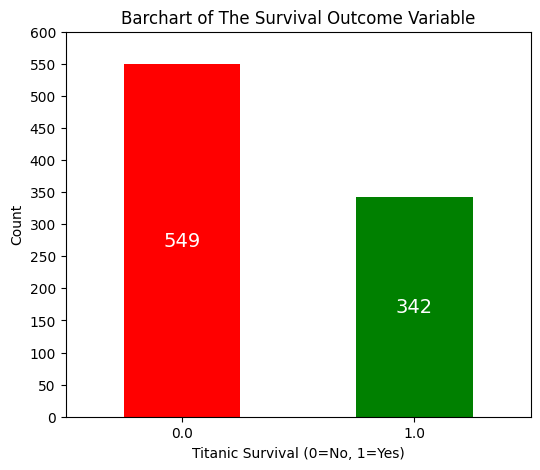

In [9]:
# Barchart for the 'Survived' binary variable (0 = No, 1 = Yes) for the training dataset.
dfg = titanic_df['Survived'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of The Survival Outcome Variable', ylabel='Count', xlabel='Titanic Survival (0=No, 1=Yes)', color= ['r','g'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,601,step=50)) 
plt.show()

Historically of the 1309 passengers, only 500 survived (38.2% chance of survival).  Given that the 'Survival' variable results for the test data are missing and meant to be predicted, the barchart above only considers the training data (891 passengers with a 38.4% chance of survival).  By way of subtraction, this leaves the test data with 260 deaths and 158 survivals (418 passengers with a 37.8% chance of survival).

In [10]:
# Evaluate the 'Pclass' numeric categorical variable distribution.
titanic_df['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

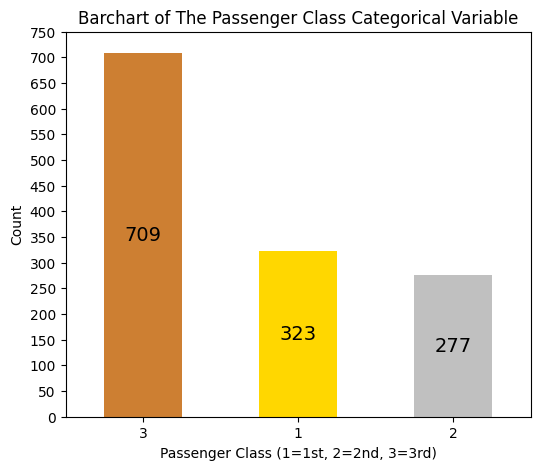

In [11]:
# Barchart for the 'Pclass' numeric categorical variable (1=1st, 2=2nd, 3=3rd) distribution.
dfg = titanic_df['Pclass'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of The Passenger Class Categorical Variable', ylabel='Count', xlabel='Passenger Class (1=1st, 2=2nd, 3=3rd)', color= ['#CD7F32','gold','silver'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14)
plt.yticks(np.arange(0,751,step=50)) 
plt.show()

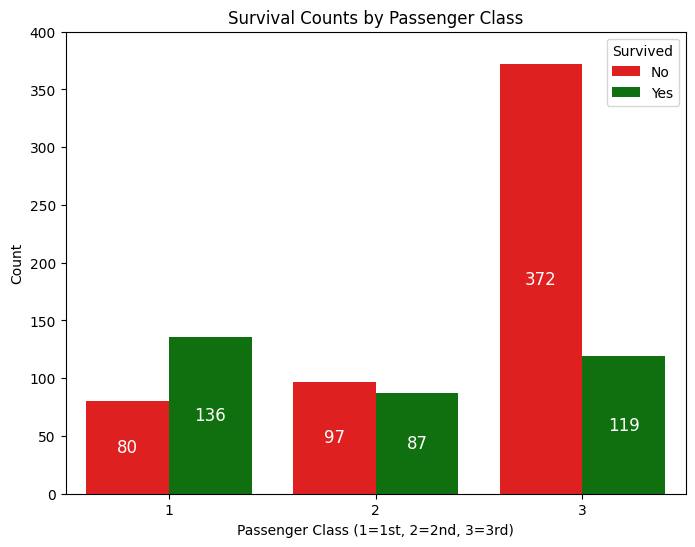

In [12]:
# Bar chart for 'Pclass' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height / 2,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="white", fontsize=12)

plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class (1=1st, 2=2nd, 3=3rd)')
plt.ylabel('Count')
plt.yticks(np.arange(0,401,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

Regarding the training data: 1st Class passengers definitely had the best survival rate (63%) with more survivors than deaths. 2nd Class passenger survival rate (47.3%) begins to show more deaths than survivors. 3rd Class passenger survival rate (24.2%) showed considerably more deaths than survivors.  

In [13]:
# Create a 'Title' variable from the 'Name' character variable.
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.')

# Create a 'Surname' variable from the 'Name' character variable for family grouping.
titanic_df['Surname'] = titanic_df['Name'].str.split(', ').str[0]

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\rcc_0\AppData\Local\Temp\ipykernel_19100\1205623714.py:2: SyntaxWarning: invalid escape sequence '\.'
  titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.')


In [14]:
# Evaluate the 'Title' string character variable distribution.
titanic_df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

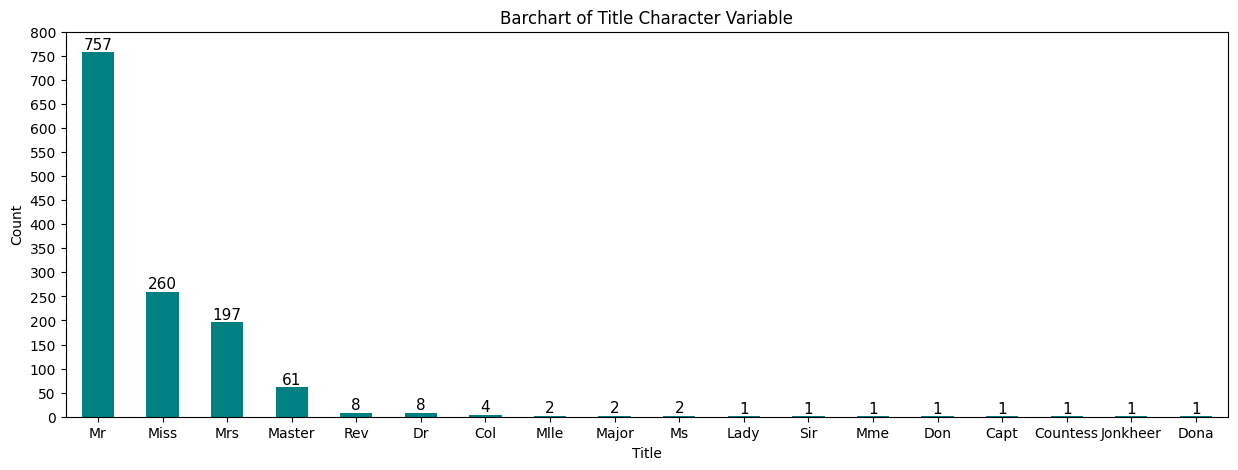

In [15]:
# Barchart for the 'Title' string character variable distribution.
dfg = titanic_df['Title'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Title Character Variable', ylabel='Count', xlabel='Title', color= ['teal'], rot=0, figsize=(15,5))
ax.bar_label(ax.containers[0], color='black', fontsize=11)
plt.yticks(np.arange(0,801,step=50)) 
plt.show()

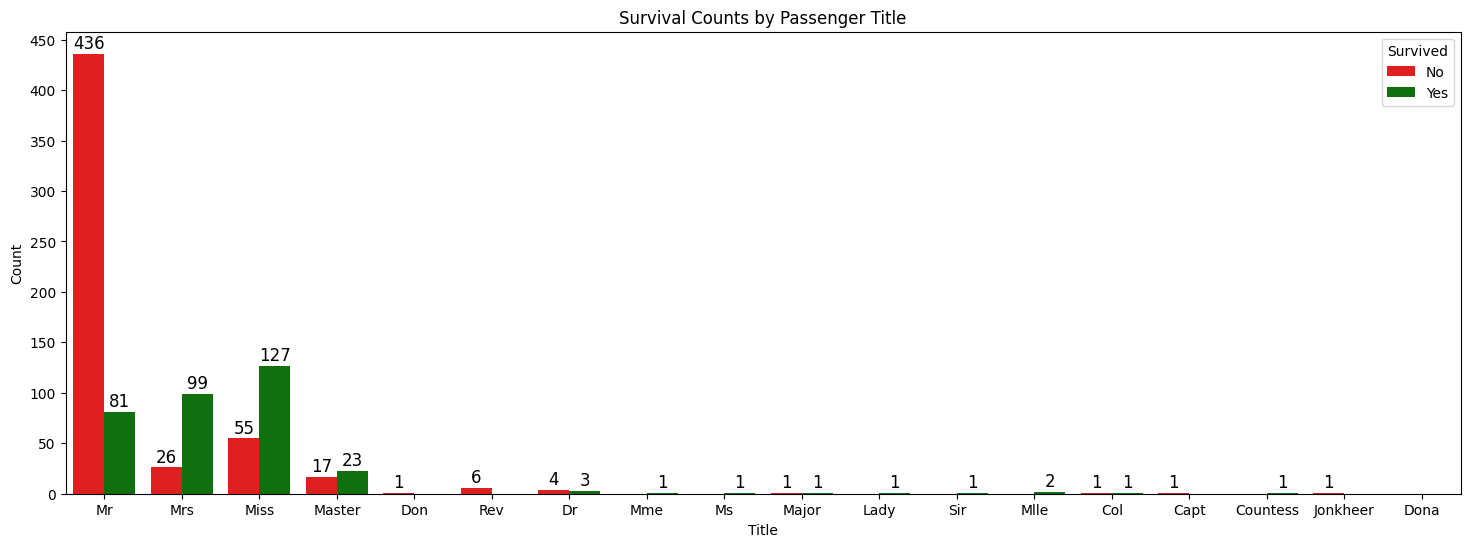

In [16]:
# Bar chart for 'Title' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(18, 6))
ax = sns.countplot(x='Title', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 10,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="black", fontsize=12)

plt.title('Survival Counts by Passenger Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.yticks(np.arange(0,451,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

The creation of the parsed ‘Title’ variable enabled improved Age imputation by helping define family relationships, and demonstrated predicted influence in model development.

In [17]:
# Evaluate the 'Surname' string character variable distribution.
titanic_df['Surname'].value_counts()

Surname
Andersson                 11
Sage                      11
Goodwin                    8
Asplund                    8
Davies                     7
Brown                      6
Panula                     6
Skoog                      6
Carter                     6
Rice                       6
Smith                      6
Fortune                    6
Johnson                    6
Ford                       6
Lefebre                    5
Williams                   5
Ryerson                    5
Palsson                    5
Kelly                      5
Thomas                     5
Baclini                    4
Hansen                     4
Hart                       4
Laroche                    4
Harris                     4
Elias                      4
West                       4
Johnston                   4
Ware                       4
Harper                     4
Boulos                     4
Gustafsson                 4
Johansson                  4
Goldsmith                  4
Dean  

The creation of the parsed ‘Surname’ variable was valuable for the creation of the FamilyID variable concatenating it with the Ticket variable.

In [18]:
# Create FamilyID (Surname + Ticket) concatenated variable.
titanic_df['FamilyID'] = titanic_df['Surname'] + '_' + titanic_df['Ticket']

titanic_df['FamilyID'].head()

0              Braund_A/5 21171
1              Cumings_PC 17599
2    Heikkinen_STON/O2. 3101282
3               Futrelle_113803
4                  Allen_373450
Name: FamilyID, dtype: object

This concatenated 'FamilyID' variable allowed for the identification of family groups, which in turn allowed for Age imputation of their members.

In [19]:
# Evaluate the 'Sex' character categorical variable distribution.
titanic_df['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

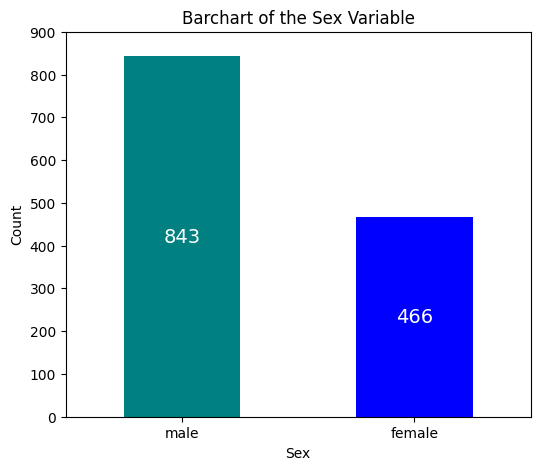

In [20]:
# Barchart for the 'Sex' numeric variable distribution.
dfg = titanic_df['Sex'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Sex Variable', ylabel='Count', xlabel='Sex', color= ['teal','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=14)
plt.yticks(np.arange(0,901,step=100)) 
plt.show()

When considering crew along with passengers, there were easily twice as many males than females on the voyage.

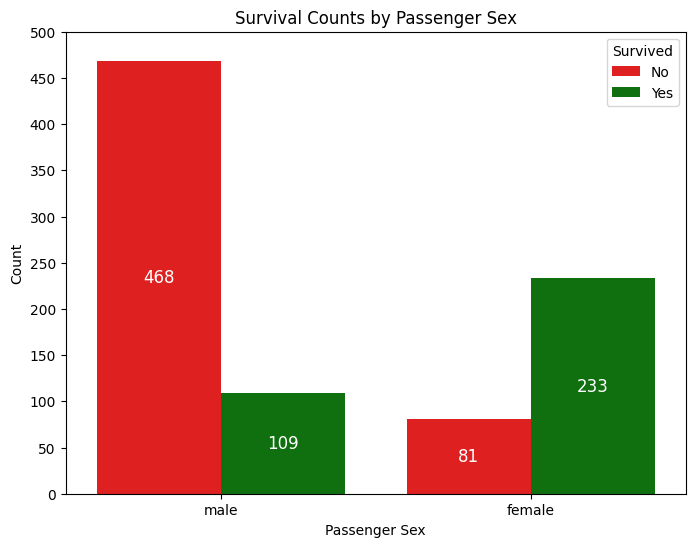

In [21]:
# Bar chart for 'Sex' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height / 2,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="white", fontsize=12)

plt.title('Survival Counts by Passenger Sex')
plt.xlabel('Passenger Sex')
plt.ylabel('Count')
plt.yticks(np.arange(0,501,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

Regarding the training data: Female survival rate (74.2%) was much higher than the male survival rate (18.9%).

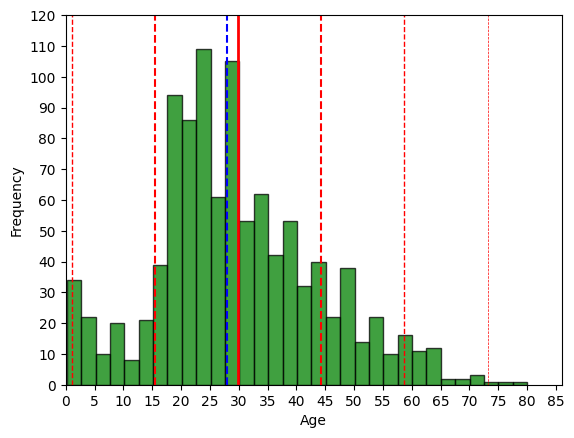

In [22]:
# Create temporary data with NaN values removed for 'Age' numeric variable charting.
agetemp_df = titanic_df.dropna(subset=['Age'])

# Histogram for the 'Age' numerical variable.
plt.hist(agetemp_df['Age'], bins = 32, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 86)
plt.xticks(np.arange(0,86,step=5))
plt.yticks(np.arange(0,121,step=10))

mean_value = agetemp_df['Age'].mean()
median_value = agetemp_df['Age'].median()
std_value = agetemp_df['Age'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

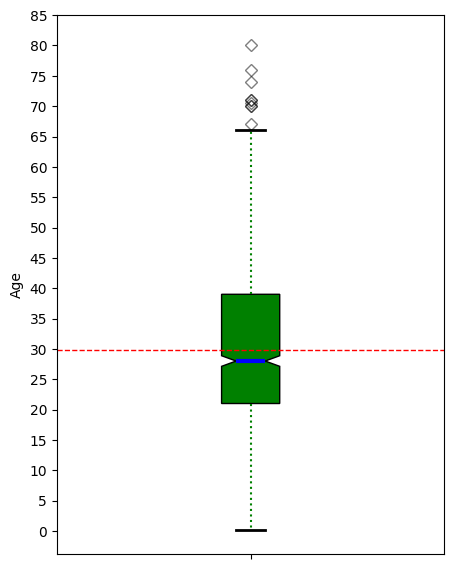

In [23]:
# Boxplot for the 'Age' numeric variable distribution.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(agetemp_df['Age'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Age')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,86,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

Distribution analysis helped determine a binning strategy for an Age categorization variable. The outliers basically represent the sparse number of elderly among the passengers.

In [24]:
# 'Age' Anderson-Darling Normality Test
result = anderson(agetemp_df['Age'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 7.130
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


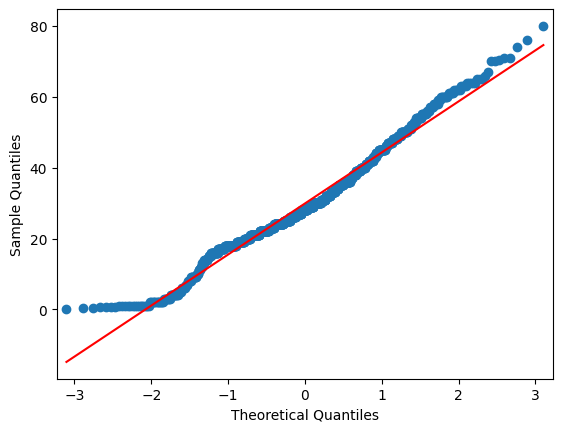

In [25]:
# 'Age' QQ plot
qqplot(agetemp_df['Age'], line='s')
plt.show()

In [26]:
# Evaluate skewness of the distribution for the 'Age' numeric variable.
age_skew = agetemp_df['Age'].skew()

print(f"Age distribution has a skewness of{age_skew: .3f}")

Age distribution has a skewness of 0.408


Normality analysis determined that the Age variable had a reasonable amount of normality, though the distribution possessed some right skew.

In [27]:
# Evaluate the 'SibSp' binary outcome variable distribution.
titanic_df['SibSp'].value_counts()

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

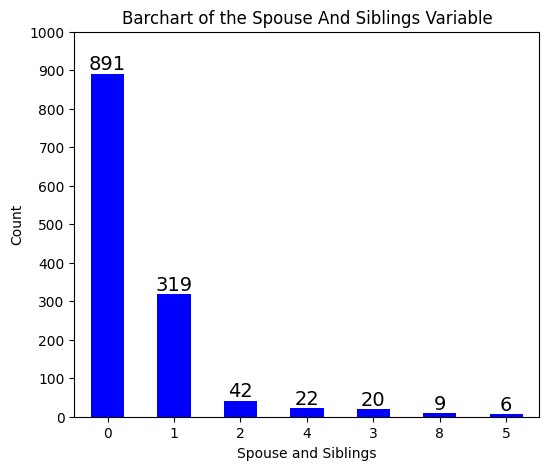

In [28]:
# Barchart for the 'SibSp' numeric variable distribution.
dfg = titanic_df['SibSp'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Spouse And Siblings Variable', ylabel='Count', xlabel='Spouse and Siblings', color= ['b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,1001,step=100)) 
plt.show()

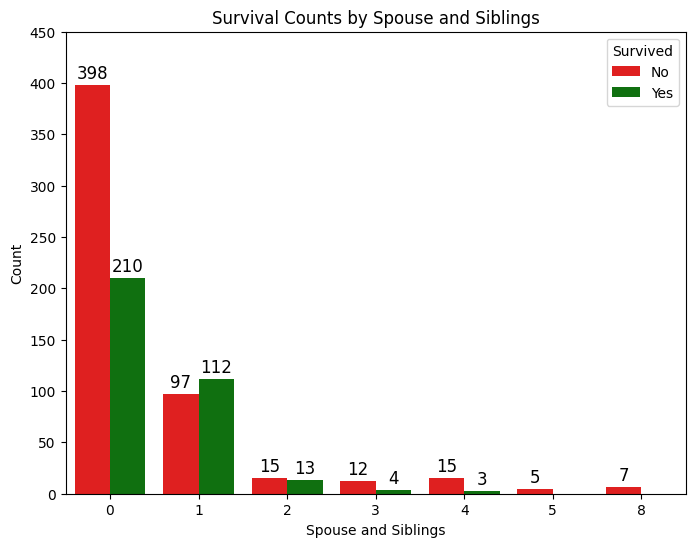

In [29]:
# Bar chart for 'SibSp' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SibSp', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Spouse and Siblings')
plt.xlabel('Spouse and Siblings')
plt.ylabel('Count')
plt.yticks(np.arange(0,451,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

The 'SibSp' variable proved useful when trying establish family member relationships for Age imputation.

In [30]:
# Evaluate the 'Parch' numeric variable distribution.
titanic_df['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

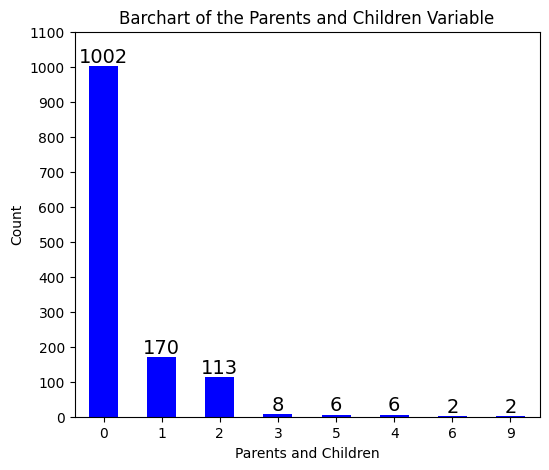

In [31]:
# Barchart for the 'Parch' numeric variable distribution.
dfg = titanic_df['Parch'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Parents and Children Variable', ylabel='Count', xlabel='Parents and Children', color= ['b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,1101,step=100)) 
plt.show()

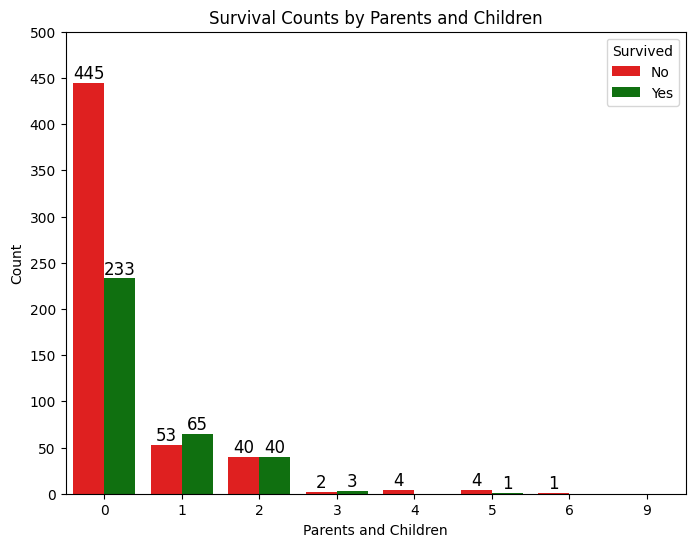

In [32]:
# Bar chart for 'Parch' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Parch', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Parents and Children')
plt.xlabel('Parents and Children')
plt.ylabel('Count')
plt.yticks(np.arange(0,501,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

The 'Parch' variable proved useful when trying establish family member relationships for Age imputation.

In [33]:
# Create 'FamilySize' variable by summing 'SibSp' and "Parch' variables.
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

In [34]:
# Evaluate the 'FamilySize' numeric variable distribution.
titanic_df['FamilySize'].value_counts()

FamilySize
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

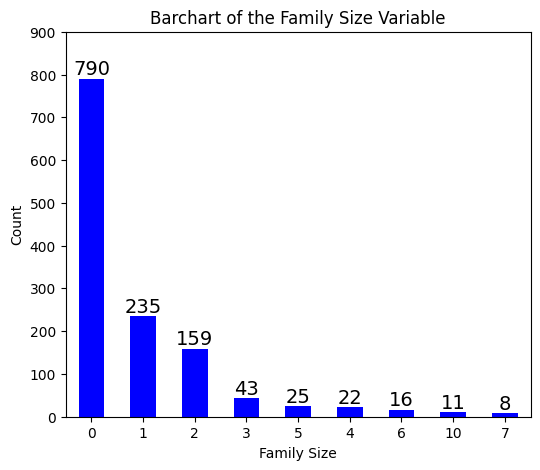

In [35]:
# Barchart for the 'FamilySize' numeric variable distribution.
dfg = titanic_df['FamilySize'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Family Size Variable', ylabel='Count', xlabel='Family Size', color= ['b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,901,step=100)) 
plt.show()

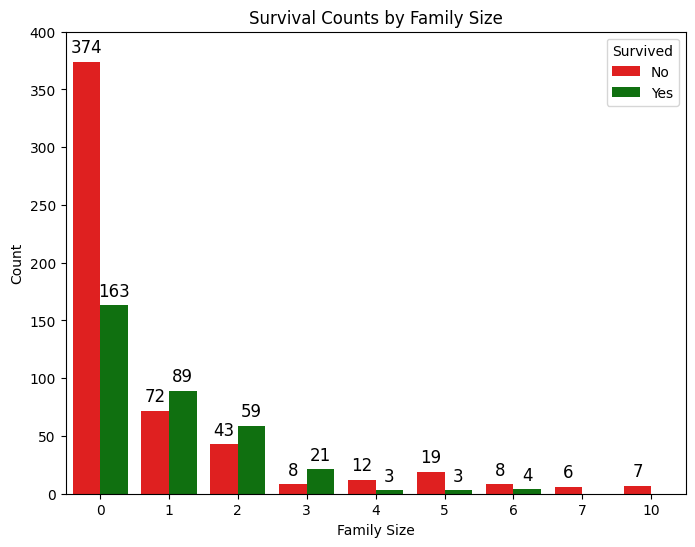

In [36]:
# Bar chart for 'FamilySize' distibution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='FamilySize', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.yticks(np.arange(0,401,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

The summed 'FamilySize' variable from the 'SibSp' and 'Parch" variables proved useful for Age imputation, and demonstrated predicted influence in model development.

In [37]:
# Step 1: Function to parse Ticket into Prefix and Number.
def parse_ticket(ticket):
    # Split on the last space to separate prefix and number
    parts = ticket.rsplit(' ', 1)  # rsplit splits from the right, max 1 split
   
    if len(parts) == 2:
        # If there's a prefix and number
        prefix, number = parts
        # Clean up prefix (remove trailing dots or spaces)
        # prefix = prefix.strip().rstrip('.')
        return prefix, number
    else:
        # If there's no space, it's just a number
        return None, ticket

# Apply the parsing function and create new columns.
titanic_df[['TicketPrefix', 'TicketNumber']] = pd.DataFrame(
    titanic_df['Ticket'].apply(parse_ticket).tolist(),
    index=titanic_df.index
)

# Step 2: Update TicketPrefix to include "LINE" for 3rd-class zero-fare tickets
# Identify 3rd-class passengers with Fare = 0 and assign "LINE" as TicketPrefix
zero_fare_3rd = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Fare'] == 0)]
titanic_df.loc[zero_fare_3rd.index, 'TicketPrefix'] = 'LINE'

# Step 3: Verify the updated TicketPrefix
print("\nUpdated TicketPrefix (first 20 rows):")
titanic_df[['Ticket', 'TicketPrefix', 'TicketNumber']].head(20)


Updated TicketPrefix (first 20 rows):


,Ticket,TicketPrefix,TicketNumber
0,A/5 21171,A/5,21171
1,PC 17599,PC,17599
2,STON/O2. 3101282,STON/O2.,3101282
3,113803,None,113803
4,373450,None,373450
5,330877,None,330877
6,17463,None,17463
7,349909,None,349909
8,347742,None,347742
9,237736,None,237736


In [38]:
# Evaluate the 'TicketPrefix' character variable distribution.
titanic_df['TicketPrefix'].value_counts()

TicketPrefix
PC             92
C.A.           46
SOTON/O.Q.     16
W./C.          14
STON/O 2.      14
A/5            12
CA.            12
SC/PARIS       11
CA             10
A/5.           10
F.C.C.          9
SOTON/OQ        8
C               8
S.O.C.          7
STON/O2.        7
S.O./P.P.       7
A/4             6
SC/Paris        5
PP              4
LINE            4
SC/AH           4
S.C./PARIS      3
SOTON/O2        3
A.5.            3
A./5.           3
F.C.            3
A/4.            3
SC              2
P/PP            2
WE/P            2
W.E.P.          2
C.A./SOTON      1
SC/A.3          1
STON/OQ.        1
AQ/4            1
A. 2.           1
LP              1
SC/A4           1
SW/PP           1
S.W./PP         1
SC/AH Basle     1
A/S             1
SCO/W           1
S.C./A.4.       1
W/C             1
Fa              1
S.O.P.          1
A4.             1
SO/C            1
S.P.            1
AQ/3.           1
Name: count, dtype: int64

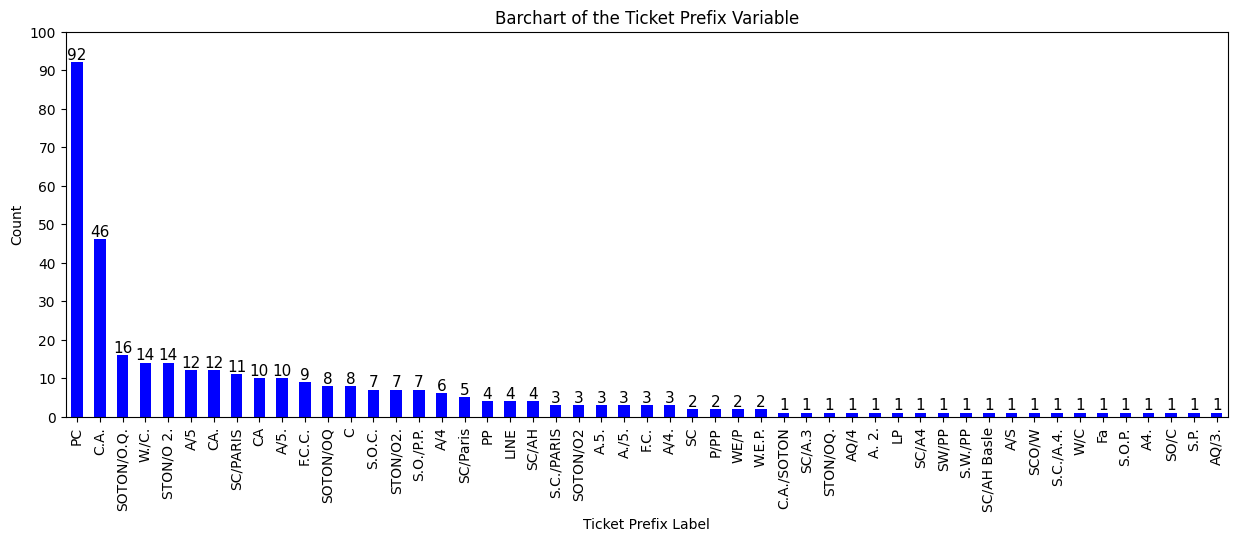

In [39]:
# Barchart for the 'TicketPrefix' character variable distribution.
dfg = titanic_df['TicketPrefix'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Ticket Prefix Variable', ylabel='Count', xlabel='Ticket Prefix Label', color= ['b'], rot=0, figsize=(15,5))
ax.bar_label(ax.containers[0], color='black', fontsize=11)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,101,step=10)) 
plt.show()

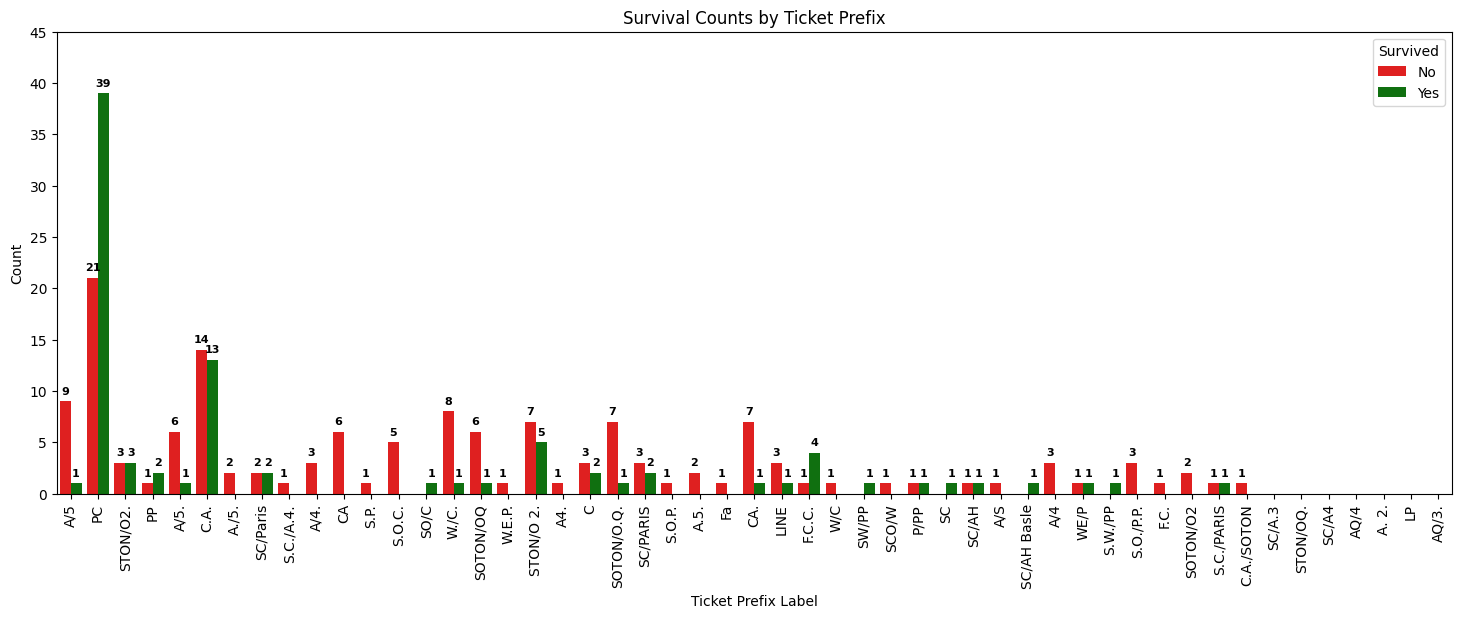

In [40]:
# Bar chart for 'TicketPrefix' with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(18, 6))
ax = sns.countplot(x='TicketPrefix', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 1.5,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=8, fontweight='bold')

plt.title('Survival Counts by Ticket Prefix')
plt.xlabel('Ticket Prefix Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,46,step=5))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

The 'TicketPrefix' variable was originally thought to be potentially useful for 'Deck' variable imputation, but later found otherwise.  It lacked the necessary predictive power for model development.

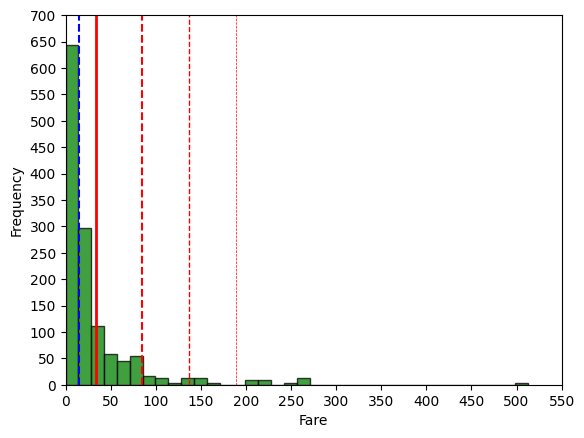

In [41]:
# Create temporary data with NaN values removed for 'Fare' numeric variable charting.
faretemp_df = titanic_df.dropna(subset=['Fare'])

# Histogram for the 'Fare' numerical variable.
plt.hist(faretemp_df['Fare'], bins = 36, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xlim(0, 86)
plt.xticks(np.arange(0,551,step=50))
plt.yticks(np.arange(0,701,step=50))

mean_value = faretemp_df['Fare'].mean()
median_value = faretemp_df['Fare'].median()
std_value = faretemp_df['Fare'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

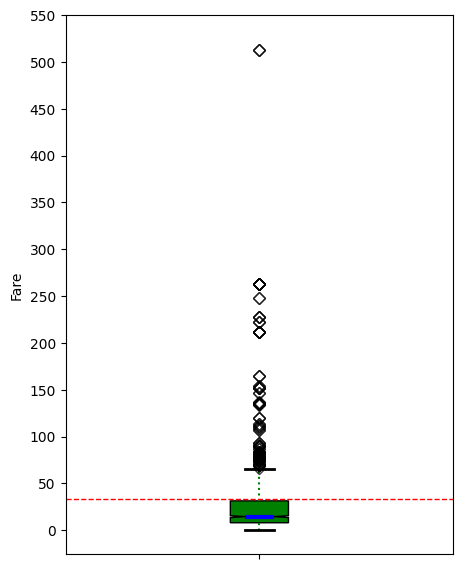

In [42]:
# Boxplot for the 'Fare' numeric variable distribution.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(faretemp_df['Fare'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Fare')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,551,step=50)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

The significant number of outliers related to the 'Fare' variable is due to the Titanic's varied accommodations and amenities.

In [43]:
# 'Fare' Anderson-Darling Normality Test
result = anderson(faretemp_df['Fare'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 186.890
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


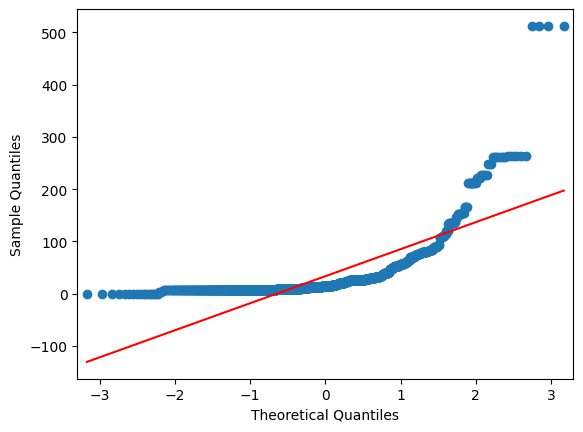

In [44]:
# 'Fare' QQ plot
qqplot(faretemp_df['Fare'], line='s')
plt.show()

In [45]:
# Evaluate skewness of the distribution for the 'Fare' numeric variable.
fare_skew = faretemp_df['Fare'].skew()

print(f"Fare distribution has a skewness of{fare_skew: .3f}")

Fare distribution has a skewness of 4.368


Normality analysis determined that the 'Fare' variable is not normally distributed, and the distribution possessed a significant right skew.

In [46]:
# Verify zero fares.
print("\nPassengers with Fare = 0:")
titanic_df[titanic_df['Fare'] == 0][['PassengerId', 'Pclass', 'Name', 'Fare', 'Embarked', 'TicketPrefix']]


Passengers with Fare = 0:


,PassengerId,Pclass,Name,Fare,Embarked,TicketPrefix
179,180,3,"Leonard, Mr. Lionel",0.0,S,LINE
263,264,1,"Harrison, Mr. William",0.0,S,None
271,272,3,"Tornquist, Mr. William Henry",0.0,S,LINE
277,278,2,"Parkes, Mr. Francis ""Frank""",0.0,S,None
302,303,3,"Johnson, Mr. William Cahoone Jr",0.0,S,LINE
413,414,2,"Cunningham, Mr. Alfred Fleming",0.0,S,None
466,467,2,"Campbell, Mr. William",0.0,S,None
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",0.0,S,None
597,598,3,"Johnson, Mr. Alfred",0.0,S,LINE
633,634,1,"Parr, Mr. William Henry Marsh",0.0,S,None


For my information, I wanted to understand how many and which passengers were getting a free trip.  Surprisingly, there was a notable distribution between classes.

In [47]:
# Function to create 'Deck' variable from 'Cabin' variable.
def extract_deck(cabin):
    if pd.isna(cabin):  # Handle NaN values
        return "Lower"
    # Split on space and take the first cabin (if multiple)
    first_cabin = cabin.split()[0]
    # Take the first letter as the deck
    return first_cabin[0]

# Create the Deck variable
titanic_df['Deck'] = titanic_df['Cabin'].apply(extract_deck)

# Evaluate the 'TicketPrefix' character variable distribution.
titanic_df['Deck'].value_counts()

Deck
Lower    1014
C          94
B          65
D          46
E          41
A          22
F          21
G           5
T           1
Name: count, dtype: int64

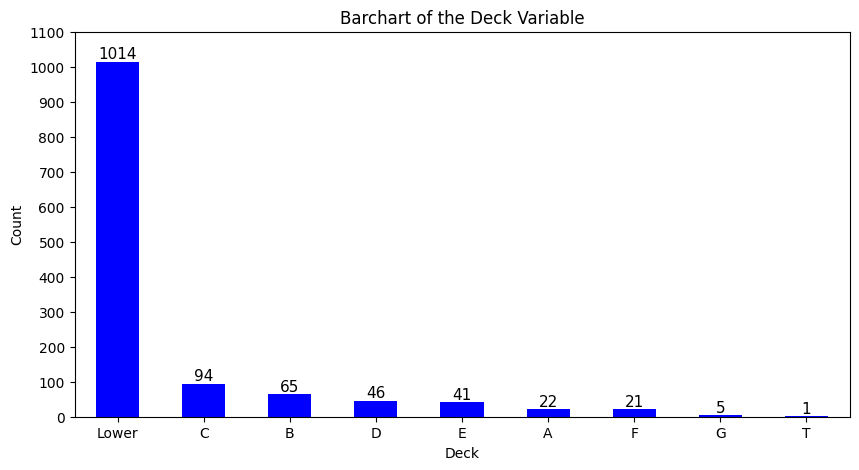

In [48]:
# Barchart for the 'Deck' character variable distribution.
dfg = titanic_df['Deck'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Deck Variable', ylabel='Count', xlabel='Deck', color= ['b'], rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=11)
plt.yticks(np.arange(0,1101,step=100)) 
plt.show()

The parsed 'Deck' variable was created from the 'Cabin' variable with the hopes of somehow imputing passengers to those decks to determine deck location survival prediction power in modeling. 'Lower' represents the currently 1014 unassigned passengers. 

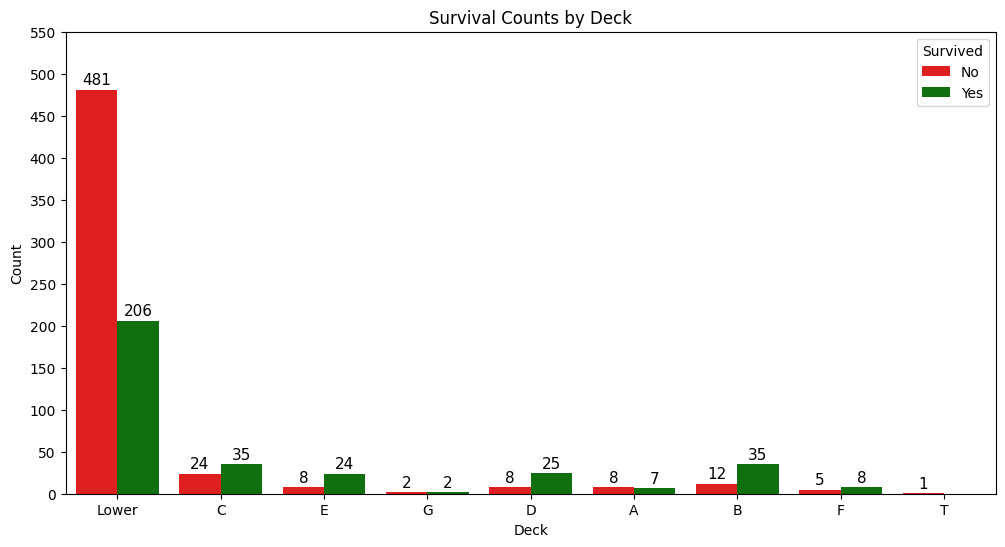

In [49]:
# Bar chart for 'Deck' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Deck', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=11)

plt.title('Survival Counts by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.yticks(np.arange(0,551,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

Most of passengers with available cabin designations were 1st Class survivors, and probably retained their ticket information noting it.

In [50]:
# Evaluate the 'Embarked' categorical variable.
titanic_df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

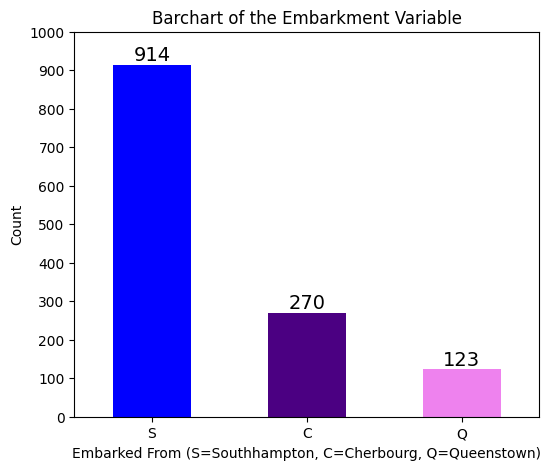

In [51]:
# Barchart for the 'Embarked' categorical variable.
dfg = titanic_df['Embarked'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Embarkment Variable', ylabel='Count', xlabel='Embarked From (S=Southhampton, C=Cherbourg, Q=Queenstown)', color= ['blue', 'indigo', 'violet'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,1001,step=100)) 
plt.show()

As depicted, the port embarkment sequence was Southhampton in England, Cherbourg in France, and Queenstown in Ireland.

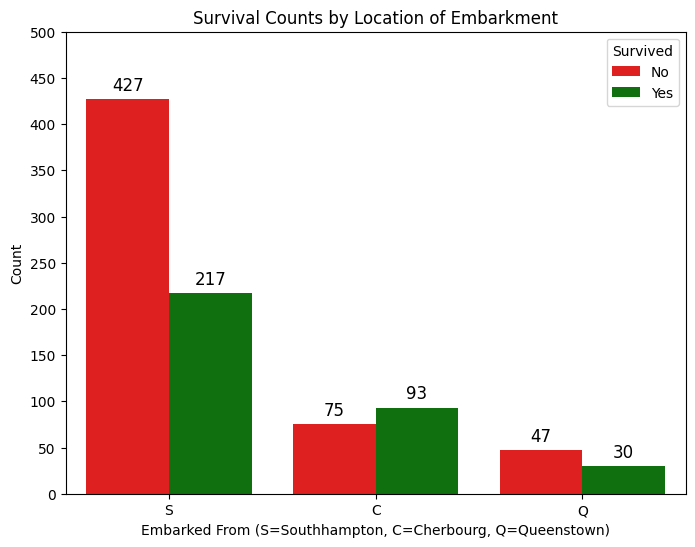

In [52]:
# Bar chart for 'Embarked' with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Embarked', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 25,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Location of Embarkment')
plt.xlabel('Embarked From (S=Southhampton, C=Cherbourg, Q=Queenstown)')
plt.ylabel('Count')
plt.yticks(np.arange(0,501,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

Southhampton passengers reasonably represented all classes.  Cherbourg passengers represented a high number of 1st Class.  Queenstown passengers represented a high number of 3rd Class.

III. Perform Imputation For The Fare (1), Embarked (2), Deck (1014), and Age (263) Variables.

A. Fare And Embarked Variable Imputation

In [53]:
# Step 1: Analyze missing values
print("Missing values before cleaning:")
print(titanic_df[['Fare', 'Embarked']].isnull().sum())

# Step 2: Clean Fare
# Identify Storey in test set (assuming test set starts at index 891)
test_df = titanic_df[titanic_df.index >= 891]  # Adjust index based on your dataset split
storey_row = test_df[(test_df['Name'].str.contains('Storey', case=True, na=False)) &
                     (test_df['Pclass'] == 3) &
                     (test_df['Embarked'] == 'S') &
                     (test_df['Fare'].isnull())]

if not storey_row.empty:
    median_fare_3rd_s = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'S')]['Fare'].median()
    titanic_df.loc[storey_row.index, 'Fare'] = median_fare_3rd_s
    print(f"\nImputed Fare for Storey: {median_fare_3rd_s} at index {storey_row.index[0]}")

# Step 3: Verify missing Embarked and original distribution
missing_embarked = titanic_df[titanic_df['Embarked'].isnull()]
print("Passengers with missing Embarked before imputation:")
print(missing_embarked[['PassengerId', 'Name', 'Pclass', 'Cabin', 'Ticket', 'Fare', 'Survived']])

print("\nOriginal Embarked distribution:")
print(titanic_df['Embarked'].value_counts())

# Step 4: Impute Embarked for Icard and Stone using PassengerId
titanic_df.loc[titanic_df['PassengerId'] == 62, 'Embarked'] = 'S'  # Icard, Southampton
titanic_df.loc[titanic_df['PassengerId'] == 830, 'Embarked'] = 'S'  # Stone, Southampton

# Step 5: Verify imputation
print("\nMissing Embarked after imputation:")
print(titanic_df['Embarked'].isnull().sum())
print("\nUpdated Embarked distribution:")
print(titanic_df['Embarked'].value_counts())

# Step 6: Confirm affected rows
affected_rows = titanic_df[titanic_df['PassengerId'].isin([62, 830])]
print("\nVerification of Icard (62) and Stone (830) after imputation:")
print(affected_rows[['PassengerId', 'Name', 'Embarked']])

Missing values before cleaning:
Fare        1
Embarked    2
dtype: int64

Imputed Fare for Storey: 8.05 at index 1043
Passengers with missing Embarked before imputation:
     PassengerId                                       Name  Pclass Cabin  \
61            62                        Icard, Miss. Amelie       1   B28   
829          830  Stone, Mrs. George Nelson (Martha Evelyn)       1   B28   

     Ticket  Fare  Survived  
61   113572  80.0       1.0  
829  113572  80.0       1.0  

Original Embarked distribution:
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

Missing Embarked after imputation:
0

Updated Embarked distribution:
Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

Verification of Icard (62) and Stone (830) after imputation:
     PassengerId                                       Name Embarked
61            62                        Icard, Miss. Amelie        S
829          830  Stone, Mrs. George Nelson (Martha Evelyn)        S


The missing 'Fare' variable value was identified, and a median fare was imputed related to the passenger's class (Pclass) and port of embarkment (Embarked).
The two missing 'Embarked' variable values were identified, and the passengers were found to be sharing the same cabin. Researched to identify their relationship (passenger and maid) and port of embarkment (Southhampton), then imputted accordingly.

B1. Exploratory Preliminary Analysis For Deck Imputation

Descriptive Statistics for Fare by Deck (Excluding Lower):
      count    mean    std    min    25%    50%     75%     max
Deck                                                           
A      21.0   43.21  18.35  26.00  30.50  35.50   50.50   81.86
B      59.0  108.78  76.45   5.00  57.49  82.27  133.26  262.38
C      94.0  107.93  72.91  25.70  52.00  86.29  151.55  263.00
D      46.0   53.01  28.13  12.88  27.72  52.55   76.73  113.28
E      41.0   54.56  37.74   8.05  26.29  53.10   79.65  134.50
F      21.0   18.08  12.22   7.23   7.65  13.00   26.00   39.00
G       5.0   14.21   3.42  10.46  10.46  16.70   16.70   16.70
T       1.0   35.50    NaN  35.50  35.50  35.50   35.50   35.50

Cleaned Descriptive Statistics for Fare by Deck:
      count    mean    std    min  median     max
Deck                                             
A      21.0   43.21  18.35  26.00   35.50   81.86
B      59.0  108.78  76.45   5.00   82.27  262.38
C      94.0  107.93  72.91  25.70   86.29  263.00
D

C:\Users\rcc_0\AppData\Local\Temp\ipykernel_19100\2922731160.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Deck', y='Fare', data=known_decks_df, palette='viridis')


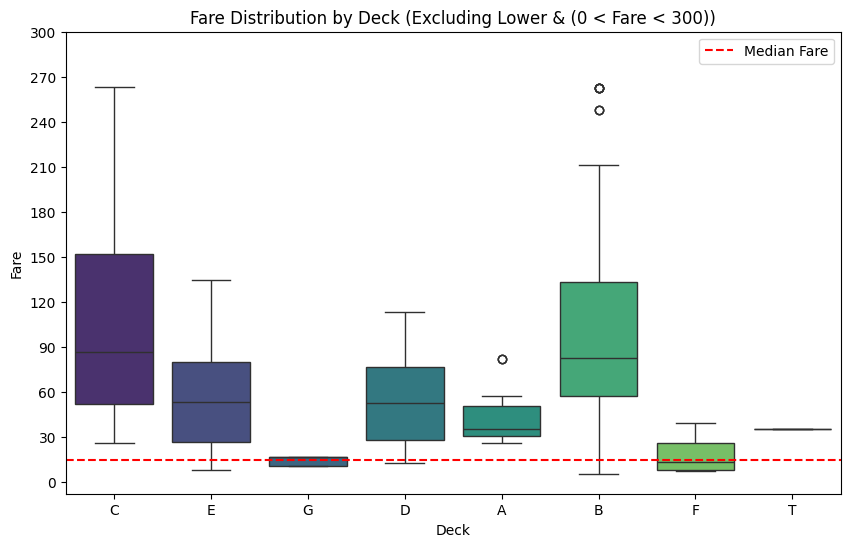

In [54]:
# Filter out "Lower" deck passengers
known_decks_df = titanic_df[(titanic_df['Deck'] != 'Lower') & (titanic_df['Fare'] > 0) & (titanic_df['Fare'] < 300)]

# Descriptive statistics for Fare by Deck (excluding Lower)
fare_by_deck_stats = titanic_df[(titanic_df['Deck'] != 'Lower') & (titanic_df['Fare'] > 0) & (titanic_df['Fare'] < 300)].groupby('Deck')['Fare'].describe().round(2)
print("Descriptive Statistics for Fare by Deck (Excluding Lower):")
print(fare_by_deck_stats)

# Cleaned version with selected stats
cleaned_stats = fare_by_deck_stats[['count', 'mean', 'std', 'min', '50%', 'max']]
cleaned_stats = cleaned_stats.rename(columns={'50%': 'median'})
print("\nCleaned Descriptive Statistics for Fare by Deck:")
print(cleaned_stats)

# Box plot to visualize Fare distribution by Deck (excluding Lower)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Deck', y='Fare', data=known_decks_df, palette='viridis')
plt.title('Fare Distribution by Deck (Excluding Lower & (0 < Fare < 300))')
plt.xlabel('Deck')
plt.ylabel('Fare')
plt.yticks(np.arange(0,301,step=30))
plt.axhline(y=titanic_df['Fare'].median(), color='red', linestyle='--', label='Median Fare')
plt.legend()
plt.show()

Explored the possibility using the 'Fare' variable for potential deck assignment.  Removed the previously identified zero fares to provide a clear picture of each distribution.  There was one fare value around 500 in Deck B that was removed to improve the boxplot display.  The fare distributions for Deck B, C, D, and E seemed wide and often overlapping for passengers with known cabin assignments.  Research uncovered that those decks varying accommodations.

In [55]:
# Ticket Number Sequence Analysis
print("\nTicket Number Sequence Analysis:")

# Use the existing TicketNumber column, convert to numeric and exclude NaN values
titanic_df['TicketNumber'] = pd.to_numeric(titanic_df['TicketNumber'], errors='coerce')
ticket_groups = titanic_df.groupby(pd.qcut(titanic_df['TicketNumber'].dropna(), 10, duplicates='drop'))['Pclass'].value_counts()

print("Ticket Number Ranges and Class Distribution:")
print(ticket_groups)


Ticket Number Sequence Analysis:
Ticket Number Ranges and Class Distribution:
TicketNumber           Pclass
(1.999, 2667.4]        3          95
                       2          31
                       1           5
(2667.4, 9549.0]       3         117
                       2           9
                       1           5
(9549.0, 17569.0]      1          93
                       2          28
                       3          10
(17569.0, 28210.2]     1         101
                       2          17
                       3          11
(28210.2, 111163.0]    2          68
                       1          32
                       3          31
(111163.0, 236853.0]   1          87
                       2          44
                       3           0
(236853.0, 330971.8]   2          80
                       3          49
                       1           0
(330971.8, 349215.2]   3         131
                       1           0
                       2           0
(34

C:\Users\rcc_0\AppData\Local\Temp\ipykernel_19100\2713385655.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ticket_groups = titanic_df.groupby(pd.qcut(titanic_df['TicketNumber'].dropna(), 10, duplicates='drop'))['Pclass'].value_counts()


Ticket Number analysis indicated to some degree that the White Star Line had likely developed the tickets with cabin assignments to separate 3rd class at some point.

In [56]:
# Step 1: Verify that titanic_df is defined and has the required columns
try:
    if not isinstance(titanic_df, pd.DataFrame):
        raise NameError("titanic_df is not a DataFrame. Please ensure the dataset is loaded correctly.")
    required_columns = ['TicketNumber', 'Cabin']
    missing_columns = [col for col in required_columns if col not in titanic_df.columns]
    if missing_columns:
        raise KeyError(f"Missing required columns: {missing_columns}. Please check the dataset.")
except NameError:
    print("Error: 'titanic_df' is not defined. Please load the dataset first.")
    raise

# Step 2: Identify passengers with a cabin assignment
# A cabin assignment exists if Cabin is not NaN and not an empty string
passengers_with_cabin = titanic_df[
    (titanic_df['Cabin'].notna()) & (titanic_df['Cabin'] != '')
].copy()

# Step 3: Display relevant information
if not passengers_with_cabin.empty:
    # Select columns to display: PassengerId, Name, Pclass, TicketNumber, Cabin
    display_columns = ['PassengerId', 'Name', 'Pclass', 'TicketNumber', 'Cabin']
    # Ensure all display columns exist in the dataset
    display_columns = [col for col in display_columns if col in titanic_df.columns]
   
    print("\nPassengers with Cabin Assignments and Their Ticket Numbers:")
    print(passengers_with_cabin[display_columns])
   
    # Additional info: Total number of passengers with cabins
    total_with_cabin = len(passengers_with_cabin)
    print(f"\nTotal number of passengers with a cabin assignment: {total_with_cabin}")
   
    # Breakdown by Pclass
    print("\nBreakdown of passengers with cabin assignments by Pclass:")
    print(passengers_with_cabin['Pclass'].value_counts().sort_index())
   
    # Focus on "Dr" passengers with cabins
    if 'Title' in titanic_df.columns:
        dr_with_cabin = passengers_with_cabin[passengers_with_cabin['Title'] == 'Dr']
        if not dr_with_cabin.empty:
            print("\nDr Passengers with Cabin Assignments:")
            print(dr_with_cabin[display_columns])
        else:
            print("\nNo Dr passengers found with a cabin assignment.")
    else:
        print("\nNote: 'Title' column not found, skipping Dr passengers check.")
else:
    print("No passengers found with a cabin assignment in the dataset.")


Passengers with Cabin Assignments and Their Ticket Numbers:
      PassengerId                                               Name  Pclass  \
1               2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
3               4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
6               7                            McCarthy, Mr. Timothy J       1   
10             11                    Sandstrom, Miss. Marguerite Rut       3   
11             12                           Bonnell, Miss. Elizabeth       1   
21             22                              Beesley, Mr. Lawrence       2   
23             24                       Sloper, Mr. William Thompson       1   
27             28                     Fortune, Mr. Charles Alexander       1   
31             32     Spencer, Mrs. William Augustus (Marie Eugenie)       1   
52             53           Harper, Mrs. Henry Sleeper (Myna Haxtun)       1   
54             55                     Ostby, Mr. Engelhart 

In [57]:
# Step 1: Verify that titanic_df is defined and has the required columns
try:
    if not isinstance(titanic_df, pd.DataFrame):
        raise NameError("titanic_df is not a DataFrame. Please ensure the dataset is loaded correctly.")
    required_columns = ['TicketNumber', 'Cabin']
    missing_columns = [col for col in required_columns if col not in titanic_df.columns]
    if missing_columns:
        raise KeyError(f"Missing required columns: {missing_columns}. Please check the dataset.")
except NameError:
    print("Error: 'titanic_df' is not defined. Please load the dataset first.")
    raise

# Step 2: Identify passengers with a cabin assignment
passengers_with_cabin = titanic_df[
    (titanic_df['Cabin'].notna()) & (titanic_df['Cabin'] != '')
].copy()

# Step 3: Extract the deck from the Cabin column
def extract_deck(cabin):
    if pd.isna(cabin) or cabin == '':
        return None
    # Take the first letter of the first cabin (in case of multiple cabins like "C23 C25")
    first_cabin = cabin.split()[0]
    return first_cabin[0].upper()

passengers_with_cabin['Deck'] = passengers_with_cabin['Cabin'].apply(extract_deck)

# Step 4: Group by Deck and sort by TicketNumber
if not passengers_with_cabin.empty:
    # Define columns to display
    display_columns = ['PassengerId', 'Name', 'Pclass', 'TicketNumber', 'Cabin']
    display_columns = [col for col in display_columns if col in titanic_df.columns]
   
    # Group by Deck and sort by TicketNumber within each group
    grouped_by_deck = passengers_with_cabin.groupby('Deck')
   
    print("\nPassengers with Cabin Assignments Grouped by Deck (Sorted by TicketNumber):")
    for deck, group in grouped_by_deck:
        # Sort the group by TicketNumber
        sorted_group = group.sort_values(by='TicketNumber')
        print(f"\nDeck {deck}:")
        print(sorted_group[display_columns])
       
        # Highlight "Dr" passengers in this deck
        if 'Title' in titanic_df.columns:
            dr_in_deck = sorted_group[sorted_group['Title'] == 'Dr']
            if not dr_in_deck.empty:
                print(f"\nDr Passengers on Deck {deck} (Sorted by TicketNumber):")
                print(dr_in_deck[display_columns])
            else:
                print(f"\nNo Dr passengers found on Deck {deck}.")
       
        # Total passengers in this deck
        print(f"\nTotal passengers on Deck {deck}: {len(group)}")
   
    # Summary: Total passengers with cabins and deck distribution
    total_with_cabin = len(passengers_with_cabin)


Passengers with Cabin Assignments Grouped by Deck (Sorted by TicketNumber):

Deck A:
      PassengerId                                               Name  Pclass  \
556           557  Duff Gordon, Lady. (Lucille Christiana Sutherl...       1   
583           584                                Ross, Mr. John Hugo       1   
647           648                Simonius-Blumer, Col. Oberst Alfons       1   
599           600       Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")       1   
1003         1004                           Evans, Miss. Edith Corse       1   
1222         1223                       Dulles, Mr. William Crothers       1   
867           868               Roebling, Mr. Washington Augustus II       1   
937           938                           Chevre, Mr. Paul Romaine       1   
1099         1100                      Rosenbaum, Miss. Edith Louise       1   
96             97                          Goldschmidt, Mr. George B       1   
174           175                 

In [58]:
# Step 1: Filter passengers with a cabin assignment
try:
    passengers_with_cabin = titanic_df[
        (titanic_df['Cabin'].notna()) & (titanic_df['Cabin'] != '')
    ].copy()
    print("Filtering successful: Passengers with cabins identified.")
except Exception as e:
    print(f"Error filtering passengers with cabins: {e}")
    raise

# Step 2: Verify and use existing TicketPrefix (assuming it exists)
if 'TicketPrefix' not in passengers_with_cabin.columns:
    print("Warning: TicketPrefix column not found. Please ensure it exists in titanic_df.")
else:
    print("TicketPrefix column found and will be used.")

# Step 3: Sort by TicketNumber in ascending order
try:
    sorted_passengers = passengers_with_cabin.sort_values(by='TicketNumber')
    print("Sorting by TicketNumber successful.")
except Exception as e:
    print(f"Error sorting by TicketNumber: {e}")
    raise

# Step 4: Display results
display_columns = ['TicketNumber', 'Pclass', 'Survived', 'Embarked', 'Fare', 'TicketPrefix', 'Cabin']
try:
    print("\nPassengers with Cabin Assignments Sorted by TicketNumber (Ascending):")
    print(sorted_passengers[display_columns])
   
    # Summary: Total passengers with cabins
    total_with_cabin = len(sorted_passengers)
    print(f"\nTotal number of passengers with a cabin assignment: {total_with_cabin}")

      # Summary: Total passengers with cabins
    total_with_cabin = len(sorted_passengers)
    print(f"\nTotal number of passengers with a cabin assignment: {total_with_cabin}")
   
    # Highlight "Dr" passengers
    dr_with_cabin = sorted_passengers[sorted_passengers['Title'] == 'Dr']
    if not dr_with_cabin.empty:
        print("\nDr Passengers with Cabin Assignments (Sorted by TicketNumber):")
        print(dr_with_cabin[display_columns])
    else:
        print("\nNo Dr passengers found with a cabin assignment.")
except Exception as e:
    print(f"Error displaying results: {e}")
    raise


Filtering successful: Passengers with cabins identified.
TicketPrefix column found and will be used.
Sorting by TicketNumber successful.

Passengers with Cabin Assignments Sorted by TicketNumber (Ascending):
      TicketNumber  Pclass  Survived Embarked      Fare TicketPrefix  \
772            3.0       2       0.0        S   10.5000    S.O./P.P.   
473          541.0       2       1.0        C   13.7917  SC/AH Basle   
1269         680.0       1       NaN        S   50.0000         None   
872          695.0       1       0.0        S    5.0000         None   
292         2163.0       2       0.0        C   12.8750     SC/Paris   
1296        2166.0       2       NaN        C   13.8625     SC/PARIS   
959         2543.0       1       NaN        C   28.5375         None   
1212        2654.0       3       NaN        C    7.2292         None   
1179        2655.0       3       NaN        C    7.2292         None   
128         2668.0       3       1.0        C   22.3583         None   


Knowing the cabin assignments were placed on passenger tickets, thorough review and analysis of 'TicketNumber' and 'TicketPrefix' for known cabin assignments took place to see if they could be used for deck assignment purposes for unknown cabin assignments. 

B2. Deck Variable Imputation

In [59]:
# Step 1: Preprocess TicketNumber
# Ensure TicketNumber is numeric and handle 'LINE' tickets.
titanic_df['TicketNumber'] = titanic_df['TicketNumber'].fillna(399999).apply(
    lambda x: 399999 if str(x).strip().upper() == 'LINE' else int(x)
)

# Step 1.5: Generate 'FamilySize' distributions for 1st Class passengers. 
print("\nDebug: FamilySize Distribution in 1st Class (Pclass 1):")
print(titanic_df[titanic_df['Pclass'] == 1]['FamilySize'].value_counts())
print("\nDebug: FamilySize Distribution in 1st Class with Deck 'Lower':")
print(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Deck'] == 'Lower')]['FamilySize'].value_counts())

# Step 2: Define expected Deck-to-Pclass associations from Passenger Class cabin configurations and historical accounts.
historical_counts = {
    1: {'A': 42, 'B': 78, 'C': 128, 'D': 40, 'E': 34, 'T': 1},  # Total 323
    2: {'D': 118, 'E': 145, 'F': 14},                          # Total 277
    3: {'D': 50, 'E': 51, 'F': 444, 'G': 164}                  # Total 709
}
class_limits = {1: 323, 2: 277, 3: 709}
deck_limits = {'A': 42, 'B': 78, 'C': 128, 'D': 208, 'E': 230, 'F': 458, 'G': 164, 'T': 1}
allowed_decks = {
    1: ['A', 'B', 'C', 'D', 'E', 'T'],
    2: ['D', 'E', 'F'],
    3: ['D', 'E', 'F', 'G']
}

# Existing counts from Cabin and Pclass designations.
existing_counts = {
    1: {'A': 22, 'B': 65, 'C': 94, 'D': 40, 'E': 34, 'T': 1},
    2: {'D': 6, 'E': 4, 'F': 13},
    3: {'D': 0, 'E': 3, 'F': 8, 'G': 5}
}

# Initialize current counts and deck totals based on existing assignments
current_counts = {pclass: {deck: existing_counts[pclass].get(deck, 0) for deck in allowed_decks[pclass]} for pclass in [1, 2, 3]}
deck_totals = {'A': 22, 'B': 65, 'C': 94, 'D': 46, 'E': 43, 'F': 21, 'G': 5, 'T': 1}
print("\nDebug: Initial Current Counts:")
print(current_counts)
print("\nDebug: Initial Deck Totals:")
print(deck_totals)

# Step 2.5: Pre-Assign 113 Queenstown 3rd Class Passengers to G Deck.
print("\n--- Pre-Assigning Queenstown 3rd Class Passengers to G Deck ---")
queenstown_target = 113
mask_queenstown = (titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'Q')
queenstown_passengers = titanic_df[mask_queenstown].sort_values(['TicketNumber', 'Ticket'])
queenstown_count = min(queenstown_target, len(queenstown_passengers))
assigned_count = 0
queenstown_indices = []

# First, count how many Queenstown passengers are already on G Deck.
current_queenstown_on_g = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'Q') & (titanic_df['Deck'] == 'G')])
remaining_queenstown = queenstown_target - current_queenstown_on_g

if remaining_queenstown > 0:
    # Filter Queenstown passengers not already on G Deck
    mask_queenstown_not_g = (titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'Q') & (titanic_df['Deck'] != 'G')
    queenstown_not_g = titanic_df[mask_queenstown_not_g].sort_values(['TicketNumber', 'Ticket'])
    grouped_by_ticket = queenstown_not_g.groupby('Ticket')
    for ticket, group in grouped_by_ticket:
        if assigned_count >= remaining_queenstown:
            break
        indices = group.index
        # Update deck assignment
        old_decks = titanic_df.loc[indices, 'Deck']
        for idx in indices:
            old_deck = titanic_df.loc[idx, 'Deck']
            if old_deck in current_counts[3]:
                current_counts[3][old_deck] -= 1
                deck_totals[old_deck] -= 1
        titanic_df.loc[indices, 'Deck'] = 'G'
        current_counts[3]['G'] += len(indices)
        deck_totals['G'] += len(indices)
        assigned_count += len(indices)
        queenstown_indices.extend(indices)
        print(f"\nAssigned {len(indices)} Queenstown passengers to G Deck for Pclass 3 (Ticket: {ticket}):")
        print(titanic_df.loc[indices, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']])

print("\nDebug: Current Counts After Queenstown Pre-Assignment:")
print(current_counts)
print("\nDebug: Deck Totals After Queenstown Pre-Assignment:")
print(deck_totals)

# Use actual Pclass distribution to identify discrepancies
class_counts = titanic_df['Pclass'].value_counts().to_dict()
print("\nDebug: Class Counts (from Pclass distribution):", class_counts)

# Step 3: Adjust assignments to meet targets
# First, handle excess passengers by moving them to 'Lower'
for pclass in [1, 2, 3]:
    current_total = sum(current_counts[pclass].values())
    target_total = class_limits[pclass]
    if current_total > target_total:
        excess = current_total - target_total
        print(f"\nDebug: Pclass {pclass} has {excess} excess passengers. Moving to 'Lower'.")
        for deck in allowed_decks[pclass]:
            if excess <= 0:
                break
            current = current_counts[pclass][deck]
            target = historical_counts[pclass].get(deck, 0)
            if current > target:
                to_move = min(current - target, excess)
                # Find passengers on this deck to move to 'Lower'
                mask = (titanic_df['Pclass'] == pclass) & (titanic_df['Deck'] == deck)
                passengers_to_move = titanic_df[mask].sort_values(['TicketNumber', 'Ticket']).index[:to_move]
                titanic_df.loc[passengers_to_move, 'Deck'] = 'Lower'
                current_counts[pclass][deck] -= to_move
                deck_totals[deck] -= to_move
                excess -= to_move
                print(f"\nMoved {to_move} passengers from {deck} (Pclass {pclass}) to 'Lower':")
                print(titanic_df.loc[passengers_to_move, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']])

# Step 3.5: Fix Deck A FamilySize violations
deck_a_violations = (titanic_df['Pclass'] == 1) & (titanic_df['Deck'] == 'A') & (titanic_df['FamilySize'] > 1)
if deck_a_violations.sum() > 0:
    print(f"\nDebug: Moving {deck_a_violations.sum()} Deck A passengers with FamilySize > 1 back to Lower")
    titanic_df.loc[deck_a_violations, 'Deck'] = 'Lower'

# Step 4: Reassignment with strict limits and ascending TicketNumber
historical_counts = {
    1: {'A': 42, 'B': 78, 'C': 128, 'D': 40, 'E': 34, 'T': 1},
    2: {'D': 118, 'E': 145, 'F': 14},
    3: {'D': 50, 'E': 51, 'F': 444, 'G': 164}
}
deck_limits = {'A': 42, 'B': 78, 'C': 128, 'D': 208, 'E': 230, 'F': 458, 'G': 164, 'T': 1}

remaining_lower = titanic_df['Deck'] == 'Lower'
initial_lower_count = remaining_lower.sum()
print(f"\nDebug: Initial Total Lower Count: {initial_lower_count}")

for pclass in [1, 2, 3]:
    class_mask = remaining_lower & (titanic_df['Pclass'] == pclass)
    remaining = class_mask.sum()
    print(f"\nDebug: Pclass {pclass} - Remaining Lower: {remaining}")
    if remaining > 0:
        # Group by ticket to ensure ticket groups stay together
        unassigned = titanic_df[class_mask].sort_values(['TicketNumber', 'Ticket']).copy()
        ticket_groups = unassigned.groupby('Ticket').agg({
            'PassengerId': 'count',
            'TicketNumber': 'first',
            'FamilySize': 'first'
        }).rename(columns={'PassengerId': 'GroupSize'}).reset_index()
        ticket_groups = ticket_groups.sort_values('TicketNumber')
        decks = {
            1: ['A', 'B', 'C', 'D', 'E', 'T'],
            2: ['D', 'E', 'F'],
            3: ['D', 'E', 'F', 'G']
        }[pclass]
        for deck in decks:
            if remaining <= 0:
                break
            # Get current counts directly from DataFrame
            current_dist = pd.crosstab(titanic_df['Pclass'], titanic_df['Deck'])
            current = current_dist.get(deck, pd.Series(0, index=[pclass])).get(pclass, 0)
            historical = historical_counts[pclass].get(deck, 0)
            deck_total = titanic_df['Deck'].value_counts().get(deck, 0)
            deck_limit = deck_limits.get(deck, 0)
            available_slots = min(historical - current, deck_limit - deck_total, remaining)
            print(f"\nDebug: Checking Deck {deck} - Current: {current}, Historical: {historical}, Deck Total: {deck_total}, Deck Limit: {deck_limit}, Available Slots: {available_slots}")
            if available_slots <= 0:
                print(f"Debug: Skipping Deck {deck} - No available slots.")
                continue
            assigned_count = 0
            for _, row in ticket_groups.iterrows():
                ticket = row['Ticket']
                group_size = row['GroupSize']
                family_size = row['FamilySize']
                ticket_number = row['TicketNumber']
                if assigned_count + group_size > available_slots:
                    continue  # Skip if group doesn't fit
                if pclass == 1 and deck == 'A' and family_size > 1:
                    print(f"Debug: Skipping Ticket {ticket} (TicketNumber: {ticket_number}) for Deck A - FamilySize {family_size} > 1")
                    continue
                indices = unassigned[unassigned['Ticket'] == ticket].index
                titanic_df.loc[indices, 'Deck'] = deck
                assigned_count += group_size
                remaining -= group_size
                print(f"\nReassigned {group_size} Lower to {deck} for Pclass {pclass} (Ticket: {ticket}, TicketNumber: {ticket_number}):")
                print(titanic_df.loc[indices, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']])
                unassigned = unassigned.drop(indices)
            ticket_groups = ticket_groups[~ticket_groups['Ticket'].isin(titanic_df[titanic_df['Deck'] != 'Lower']['Ticket'])]
            class_mask = (titanic_df['Deck'] == 'Lower') & (titanic_df['Pclass'] == pclass)
            remaining = class_mask.sum()
            print(f"\nDebug: Pclass {pclass} - Remaining Lower After Deck {deck}: {remaining}")

# Step 5: Final Sweep with strict limits
remaining_lower = titanic_df['Deck'] == 'Lower'
if remaining_lower.sum() > 0:
    for pclass in [1, 2, 3]:
        class_mask = remaining_lower & (titanic_df['Pclass'] == pclass)
        remaining = class_mask.sum()
        if remaining > 0:
            unassigned = titanic_df[class_mask].sort_values(['TicketNumber', 'Ticket']).copy()
            ticket_groups = unassigned.groupby('Ticket').agg({
                'PassengerId': 'count',
                'TicketNumber': 'first',
                'FamilySize': 'first'
            }).rename(columns={'PassengerId': 'GroupSize'}).reset_index()
            ticket_groups = ticket_groups.sort_values('TicketNumber')
            decks = {
                1: ['B', 'C', 'D', 'E', 'T'],
                2: ['D', 'E', 'F'],
                3: ['D', 'E', 'F', 'G']
            }[pclass]
            for deck in decks:
                if remaining <= 0:
                    break
                current_dist = pd.crosstab(titanic_df['Pclass'], titanic_df['Deck'])
                current = current_dist.get(deck, pd.Series(0, index=[pclass])).get(pclass, 0)
                historical = historical_counts[pclass].get(deck, 0)
                deck_total = titanic_df['Deck'].value_counts().get(deck, 0)
                deck_limit = deck_limits.get(deck, 0)
                available_slots = min(historical - current, deck_limit - deck_total, remaining)
                print(f"\nDebug: Final Sweep - Checking Deck {deck} - Current: {current}, Historical: {historical}, Deck Total: {deck_total}, Deck Limit: {deck_limit}, Available Slots: {available_slots}")
                if available_slots <= 0:
                    print(f"Debug: Final Sweep - Skipping Deck {deck} - No available slots.")
                    continue
                assigned_count = 0
                for _, row in ticket_groups.iterrows():
                    ticket = row['Ticket']
                    group_size = row['GroupSize']
                    family_size = row['FamilySize']
                    ticket_number = row['TicketNumber']
                    if assigned_count + group_size > available_slots:
                        continue
                    indices = unassigned[unassigned['Ticket'] == ticket].index
                    titanic_df.loc[indices, 'Deck'] = deck
                    assigned_count += group_size
                    remaining -= group_size
                    print(f"\nFinal Sweep: Reassigned {group_size} Lower to {deck} for Pclass {pclass} (Ticket: {ticket}, TicketNumber: {ticket_number}):")
                    print(titanic_df.loc[indices, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']])
                    unassigned = unassigned.drop(indices)
                ticket_groups = ticket_groups[~ticket_groups['Ticket'].isin(titanic_df[titanic_df['Deck'] != 'Lower']['Ticket'])]
                class_mask = (titanic_df['Deck'] == 'Lower') & (titanic_df['Pclass'] == pclass)
                remaining = class_mask.sum()
                print(f"\nDebug: Pclass {pclass} - Remaining Lower After Final Sweep Deck {deck}: {remaining}")

# Final Validation
print("\n--- Final Validation ---")
print("\nDebug: Deck Counts After Final Reassignment:")
print(titanic_df['Deck'].value_counts())
print("\nDebug: Tickets with Deck == 'Lower' After Final Reassignment:")
print(titanic_df[titanic_df['Deck'] == 'Lower'][['PassengerId', 'TicketNumber', 'Pclass', 'Deck', 'FamilySize']])
print("\nDebug: Final Pclass Distribution:")
print(titanic_df['Pclass'].value_counts().to_dict())
print("\nCurrent Deck Distribution by Pclass:")
print(pd.crosstab(titanic_df['Pclass'], titanic_df['Deck']))
print("\nNumber of 3rd Class Queenstown Passengers on G Deck:")
queenstown_g = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'Q') & (titanic_df['Deck'] == 'G')]
print(len(queenstown_g))
print("\nFamilySize Distribution on Deck A (Pclass 1):")
print(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Deck'] == 'A')]['FamilySize'].value_counts())
print("\nSample of Passengers with Imputed Deck:")
print(titanic_df[titanic_df['Cabin'].isna()][['PassengerId', 'Pclass', 'Embarked', 'Deck', 'Ticket', 'TicketNumber', 'FamilySize']].head(10))


Debug: FamilySize Distribution in 1st Class (Pclass 1):
FamilySize
0    160
1    104
2     39
3      9
5      6
4      5
Name: count, dtype: int64

Debug: FamilySize Distribution in 1st Class with Deck 'Lower':
FamilySize
0    53
1    11
2     3
Name: count, dtype: int64

Debug: Initial Current Counts:
{1: {'A': 22, 'B': 65, 'C': 94, 'D': 40, 'E': 34, 'T': 1}, 2: {'D': 6, 'E': 4, 'F': 13}, 3: {'D': 0, 'E': 3, 'F': 8, 'G': 5}}

Debug: Initial Deck Totals:
{'A': 22, 'B': 65, 'C': 94, 'D': 46, 'E': 43, 'F': 21, 'G': 5, 'T': 1}

--- Pre-Assigning Queenstown 3rd Class Passengers to G Deck ---

Assigned 1 Queenstown passengers to G Deck for Pclass 3 (Ticket: 12460):
     PassengerId  TicketNumber Deck  Pclass  FamilySize
790          791         12460    G       3           0

Assigned 1 Queenstown passengers to G Deck for Pclass 3 (Ticket: 14311):
    PassengerId  TicketNumber Deck  Pclass  FamilySize
47           48         14311    G       3           0

Assigned 1 Queenstown passengers 

A historical constraint indicated that only singles and couples (FamilySize= 0 or 1) could allocated to Deck A, the promenade deck.  Initial current counts and deck totals represent the allocation of those with cabin values.  From historical research, 113 Queenstown 3rd Class passengers were assigned to a forward steerage area on Deck G.  All, but two deck assignments in 2nd Class were completed, and after a review of the 3rd Class Queenstown passengers, one was found to have a cabin in F deck.

B3. Investigate & Reallocate Two Unimputed Lower Values In 2nd Class & One Imputed Value In 3rd Class For Deck Variable

In [60]:
# Standalone block to display 2nd Class ticket numbers in ascending order with assigned decks
print("\n2nd Class Ticket Numbers (Ascending) with Assigned Decks:")
# Filter for 2nd Class and select relevant columns
second_class = titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Cabin'].isna())]
# Group by Ticket to get unique ticket numbers and their decks
second_class_unique = second_class.groupby('Ticket').first().reset_index()
# Sort by TicketNumber in ascending order
second_class_sorted = second_class_unique.sort_values('TicketNumber')
# Print the results
print("TicketNumber  Deck")
print("-" * 20)
for _, row in second_class_sorted.iterrows():
    print(f"{row['TicketNumber']:<12} {row['Deck']}")


2nd Class Ticket Numbers (Ascending) with Assigned Decks:
TicketNumber  Deck
--------------------
2            D
3            D
751          D
752          D
1166         D
1585         D
1748         D
2003         D
2079         D
2123         D
2131         D
2133         D
2146         D
2147         D
2148         D
2149         D
2159         D
2167         D
2168         D
2861         D
2908         D
2926         D
3085         D
3381         D
11668        D
12233        D
13528        D
13529        D
13531        D
13534        D
13540        D
14208        D
14258        D
14260        D
14263        D
14879        D
14885        D
14888        D
15185        D
17248        D
18723        D
24065        D
24579        D
24580        D
26360        D
26707        D
27849        D
28004        D
28034        D
28133        D
28134        D
28206        D
28213        D
28220        D
28221        D
28228        D
28403        D
28404        D
28424        D
28425        D
2

In [61]:
# Standalone block to investigate ticket 29750 in 2nd Class
print("\nInvestigating Ticket 29750 in 2nd Class:")
# Filter for ticket 29750 in 2nd Class
ticket_29750 = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Ticket'] == '29750')
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize', 'Cabin']]

# Check if the ticket exists
if not ticket_29750.empty:
    passenger_count = len(ticket_29750)
    print(f"\nTicket 29750 - Number of Passengers: {passenger_count}")
    print("Details:")
    print(ticket_29750)
    # Check if the deck was imputed (Cabin was originally null)
    if ticket_29750['Cabin'].isna().all():
        print("\nNote: Deck was imputed (original Cabin value was missing).")
    else:
        print("\nNote: Deck was not imputed (original Cabin value exists).")
else:
    print("\nTicket 29750 not found in 2nd Class.")


Investigating Ticket 29750 in 2nd Class:

Ticket 29750 - Number of Passengers: 3
Details:
      PassengerId Ticket  TicketNumber Deck  Pclass  FamilySize Cabin
670           671  29750         29750    E       2           2   NaN
684           685  29750         29750    E       2           2   NaN
1066         1067  29750         29750    E       2           2   NaN

Note: Deck was imputed (original Cabin value was missing).


In [62]:
# Standalone block to list 2nd Class Deck F ticket numbers in ascending order
print("\n2nd Class Deck F Ticket Numbers (Ascending Order):")
# Filter for 2nd Class passengers on Deck F
deck_f_2nd_class = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Deck'] == 'F')
][['Ticket', 'TicketNumber']]

# Group by Ticket to get unique ticket numbers
deck_f_unique = deck_f_2nd_class.groupby('Ticket').first().reset_index()
# Sort by TicketNumber in ascending order
deck_f_sorted = deck_f_unique.sort_values('TicketNumber')
# Check the count of unique ticket numbers
ticket_count = len(deck_f_sorted)
print(f"\nTotal Unique Ticket Numbers on Deck F: {ticket_count}")
# Print the sorted ticket numbers
print("TicketNumber")
print("-" * 12)
for _, row in deck_f_sorted.iterrows():
    print(f"{row['TicketNumber']}")


2nd Class Deck F Ticket Numbers (Ascending Order):

Total Unique Ticket Numbers on Deck F: 8
TicketNumber
------------
14266
29395
34260
230080
230136
244368
248733
248734


In [63]:
# Standalone block to investigate ticket 250653 in 2nd Class
print("\nInvestigating Ticket 250653 in 2nd Class:")
# Filter for ticket 250653 in 2nd Class
ticket_250653 = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Ticket'] == '250653')
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize', 'Cabin']]

# Check if the ticket exists
if not ticket_250653.empty:
    passenger_count = len(ticket_250653)
    print(f"\nTicket 250653 - Number of Passengers: {passenger_count}")
    print("Details:")
    print(ticket_250653)
    # Check if the deck was imputed (Cabin was originally null)
    if ticket_250653['Cabin'].isna().all():
        print("\nNote: Deck was imputed (original Cabin value was missing).")
    else:
        print("\nNote: Deck was not imputed (original Cabin value exists).")
else:
    print("\nTicket 250653 not found in 2nd Class.")


Investigating Ticket 250653 in 2nd Class:

Ticket 250653 - Number of Passengers: 1
Details:
     PassengerId  Ticket  TicketNumber Deck  Pclass  FamilySize Cabin
178          179  250653        250653    E       2           0   NaN

Note: Deck was imputed (original Cabin value was missing).


In [64]:
# Standalone block to reassign tickets 250653 and 250655 in 2nd Class in specified order
print("\nReassigning Tickets 250653 and 250655 in 2nd Class (In Specified Order):")

# Step 1: Check and move ticket 250653 to F (First Action)
print("\nChecking and Moving Ticket 250653:")
ticket_250653 = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Ticket'] == '250653')
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']]
if not ticket_250653.empty:
    passenger_count_250653 = len(ticket_250653)
    print(f"\nTicket 250653 - Number of Passengers: {passenger_count_250653}")
    print("Details:")
    print(ticket_250653)
    current_deck_250653 = ticket_250653['Deck'].iloc[0]
    if current_deck_250653 == 'E':
        titanic_df.loc[ticket_250653.index, 'Deck'] = 'F'
        print(f"\nMoved ticket 250653 from Deck E to Deck F:")
        print(titanic_df.loc[ticket_250653.index, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
    elif current_deck_250653 == 'Lower':
        titanic_df.loc[ticket_250653.index, 'Deck'] = 'F'
        print(f"\nAssigned ticket 250653 from Lower to Deck F:")
        print(titanic_df.loc[ticket_250653.index, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
    else:
        print(f"\nTicket 250653 is on Deck {current_deck_250653}, no action taken for reassignment to F.")
else:
    print("\nTicket 250653 not found in 2nd Class.")

# Step 2: Check and assign both ticket 250655 passengers from Lower to E (Second Action)
print("\nChecking and Assigning Ticket 250655:")
ticket_250655 = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Ticket'] == '250655')
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']]
if not ticket_250655.empty:
    passenger_count_250655 = len(ticket_250655)
    print(f"\nTicket 250655 - Number of Passengers: {passenger_count_250655}")
    print("Details:")
    print(ticket_250655)
    if (ticket_250655['Deck'] == 'Lower').all():
        titanic_df.loc[ticket_250655.index, 'Deck'] = 'E'
        print(f"\nAssigned all ticket 250655 passengers from Lower to Deck E:")
        print(titanic_df.loc[ticket_250655.index, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
    else:
        print(f"\nNot all ticket 250655 passengers are in Lower, current decks:")
        print(ticket_250655[['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
else:
    print("\nTicket 250655 not found in 2nd Class.")

# Step 3: Verify the new deck distribution for 2nd Class
print("\nNew Deck Distribution for 2nd Class:")
deck_distribution = pd.crosstab(titanic_df[titanic_df['Pclass'] == 2]['Pclass'], titanic_df[titanic_df['Pclass'] == 2]['Deck'])
print(deck_distribution)
print(f"\nTotal 2nd Class Passengers: {deck_distribution.sum().sum()}")

# Step 4: Check for any remaining Lower passengers in 2nd Class
print("\nRemaining Lower Passengers in 2nd Class:")
lower_remaining = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Deck'] == 'Lower')
][['PassengerId', 'TicketNumber', 'Deck', 'Pclass']]
print(lower_remaining)


Reassigning Tickets 250653 and 250655 in 2nd Class (In Specified Order):

Checking and Moving Ticket 250653:

Ticket 250653 - Number of Passengers: 1
Details:
     PassengerId  Ticket  TicketNumber Deck  Pclass  FamilySize
178          179  250653        250653    E       2           0

Moved ticket 250653 from Deck E to Deck F:
     PassengerId  TicketNumber Deck  Pclass
178          179        250653    F       2

Checking and Assigning Ticket 250655:

Ticket 250655 - Number of Passengers: 2
Details:
     PassengerId  Ticket  TicketNumber   Deck  Pclass  FamilySize
427          428  250655        250655  Lower       2           0
705          706  250655        250655  Lower       2           0

Assigned all ticket 250655 passengers from Lower to Deck E:
     PassengerId  TicketNumber Deck  Pclass
427          428        250655    E       2
705          706        250655    E       2

New Deck Distribution for 2nd Class:
Deck      D    E   F
Pclass              
2       118  145  14

In [65]:
# Standalone block to identify misassigned passenger and list swap candidates from F to G
print("\nIdentifying Misassigned 3rd Class Queenstown Passenger and Swap Candidates:")

# Step 1: Identify 3rd Class Queenstown passenger on G with F cabin
queenstown_g_with_f = titanic_df[
    (titanic_df['Pclass'] == 3) &
    (titanic_df['Embarked'] == 'Q') &
    (titanic_df['Deck'] == 'G') &
    (titanic_df['Cabin'].notna()) &
    (titanic_df['Cabin'].str.startswith('F', na=False))
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]

if not queenstown_g_with_f.empty:
    print("\nMisassigned Queenstown 3rd Class Passenger on G with F Cabin:")
    print(queenstown_g_with_f)
    misassigned_passenger = queenstown_g_with_f.iloc[0]
    misassigned_index = queenstown_g_with_f.index[0]
else:
    print("\nNo 3rd Class Queenstown passengers found on G with F cabin assignment.")
    exit()

# Step 2: List 3rd Class imputed passengers on F as swap candidates, sorted by TicketNumber
imputed_f_candidates = titanic_df[
    (titanic_df['Pclass'] == 3) &
    (titanic_df['Deck'] == 'F') &
    (titanic_df['Cabin'].isna())
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass']].sort_values('TicketNumber')

if not imputed_f_candidates.empty:
    print("\nPotential Swap Candidates on Deck F (Imputed Decks, Sorted by TicketNumber):")
    print(imputed_f_candidates)
else:
    print("\nNo imputed 3rd Class passengers found on F for swap.")
    exit()


Identifying Misassigned 3rd Class Queenstown Passenger and Swap Candidates:

Misassigned Queenstown 3rd Class Passenger on G with F Cabin:
     PassengerId  Ticket  TicketNumber Deck Cabin  Pclass Embarked
776          777  383121        383121    G   F38       3        Q

Potential Swap Candidates on Deck F (Imputed Decks, Sorted by TicketNumber):
      PassengerId              Ticket  TicketNumber Deck Cabin  Pclass
746           747           C.A. 2673          2673    F   NaN       3
279           280           C.A. 2673          2673    F   NaN       3
1283         1284           C.A. 2673          2673    F   NaN       3
773           774                2674          2674    F   NaN       3
1228         1229                2675          2675    F   NaN       3
1165         1166                2676          2676    F   NaN       3
36             37                2677          2677    F   NaN       3
140           141                2678          2678    F   NaN       3
852      

In [66]:
# Standalone block to swap 3rd Class passengers with TicketNumbers 383121 and 3101277
print("\nSwapping 3rd Class Passengers with TicketNumbers 383121 and 3101277:")

# Step 1: Identify passenger with TicketNumber 383121
passenger_383121 = titanic_df[
    (titanic_df['Pclass'] == 3) &
    (titanic_df['TicketNumber'] == '383121')  # Try as string, adjust if needed
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]

if not passenger_383121.empty:
    print("\nPassenger with TicketNumber 383121:")
    print(passenger_383121)
    index_383121 = passenger_383121.index[0]
    current_deck_383121 = passenger_383121['Deck'].iloc[0]
else:
    passenger_383121 = titanic_df[
        (titanic_df['Pclass'] == 3) &
        (titanic_df['Ticket'] == '383121')  # Try Ticket column as fallback
    ][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]
    if not passenger_383121.empty:
        print("\nFound passenger with Ticket 383121 using 'Ticket' column:")
        print(passenger_383121)
        index_383121 = passenger_383121.index[0]
        current_deck_383121 = passenger_383121['Deck'].iloc[0]
    else:
        print("\nError: No passenger found with TicketNumber or Ticket 383121 in 3rd Class.")
        index_383121 = None
        current_deck_383121 = None

# Step 2: Identify passenger with TicketNumber 3101277
passenger_3101277 = titanic_df[
    (titanic_df['Pclass'] == 3) &
    (titanic_df['TicketNumber'] == '3101277')  # Try as string, adjust if needed
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]

if not passenger_3101277.empty:
    print("\nPassenger with TicketNumber 3101277:")
    print(passenger_3101277)
    index_3101277 = passenger_3101277.index[0]
    current_deck_3101277 = passenger_3101277['Deck'].iloc[0]
else:
    passenger_3101277 = titanic_df[
        (titanic_df['Pclass'] == 3) &
        (titanic_df['Ticket'] == '3101277')  # Try Ticket column as fallback
    ][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]
    if not passenger_3101277.empty:
        print("\nFound passenger with Ticket 3101277 using 'Ticket' column:")
        print(passenger_3101277)
        index_3101277 = passenger_3101277.index[0]
        current_deck_3101277 = passenger_3101277['Deck'].iloc[0]
    else:
        print("\nError: No passenger found with TicketNumber or Ticket 3101277 in 3rd Class.")
        index_3101277 = None
        current_deck_3101277 = None

# Step 3: Perform the swap only if both passengers are found
if index_383121 is not None and index_3101277 is not None:
    titanic_df.loc[index_383121, 'Deck'] = 'F'
    titanic_df.loc[index_3101277, 'Deck'] = 'G'
    print(f"\nSwapped Decks:")
    print(f"Passenger with TicketNumber 383121 moved from {current_deck_383121} to F:")
    print(titanic_df.loc[index_383121, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
    print(f"Passenger with TicketNumber 3101277 moved from {current_deck_3101277} to G:")
    print(titanic_df.loc[index_3101277, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
else:
    print("\nError: Cannot perform swap. One or both passengers not found.")

# Step 4: Verify the new deck distribution for 3rd Class
print("\nNew Deck Distribution for 3rd Class:")
deck_distribution = pd.crosstab(titanic_df[titanic_df['Pclass'] == 3]['Pclass'], titanic_df[titanic_df['Pclass'] == 3]['Deck'])
print(deck_distribution)
print(f"\nTotal 3rd Class Passengers: {deck_distribution.sum().sum()}")

# Step 5: Check for any remaining misassigned Queenstown passengers on G with F cabins
print("\nRemaining 3rd Class Queenstown Passengers on G with F Cabin:")
remaining_misassigned = titanic_df[
    (titanic_df['Pclass'] == 3) &
    (titanic_df['Embarked'] == 'Q') &
    (titanic_df['Deck'] == 'G') &
    (titanic_df['Cabin'].notna()) &
    (titanic_df['Cabin'].str.startswith('F', na=False))
][['PassengerId', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]
print(remaining_misassigned)


Swapping 3rd Class Passengers with TicketNumbers 383121 and 3101277:

Found passenger with Ticket 383121 using 'Ticket' column:
     PassengerId  Ticket  TicketNumber Deck Cabin  Pclass Embarked
776          777  383121        383121    G   F38       3        Q

Found passenger with Ticket 3101277 using 'Ticket' column:
     PassengerId   Ticket  TicketNumber Deck Cabin  Pclass Embarked
392          393  3101277       3101277    F   NaN       3        S

Swapped Decks:
Passenger with TicketNumber 383121 moved from G to F:
PassengerId        777
TicketNumber    383121
Deck                 F
Pclass               3
Name: 776, dtype: object
Passenger with TicketNumber 3101277 moved from F to G:
PassengerId         393
TicketNumber    3101277
Deck                  G
Pclass                3
Name: 392, dtype: object

New Deck Distribution for 3rd Class:


Deck     D   E    F    G
Pclass                  
3       50  51  444  164

Total 3rd Class Passengers: 709

Remaining 3rd Class Queenstown Passengers on G with F Cabin:
Empty DataFrame
Columns: [PassengerId, TicketNumber, Deck, Cabin, Pclass, Embarked]
Index: []


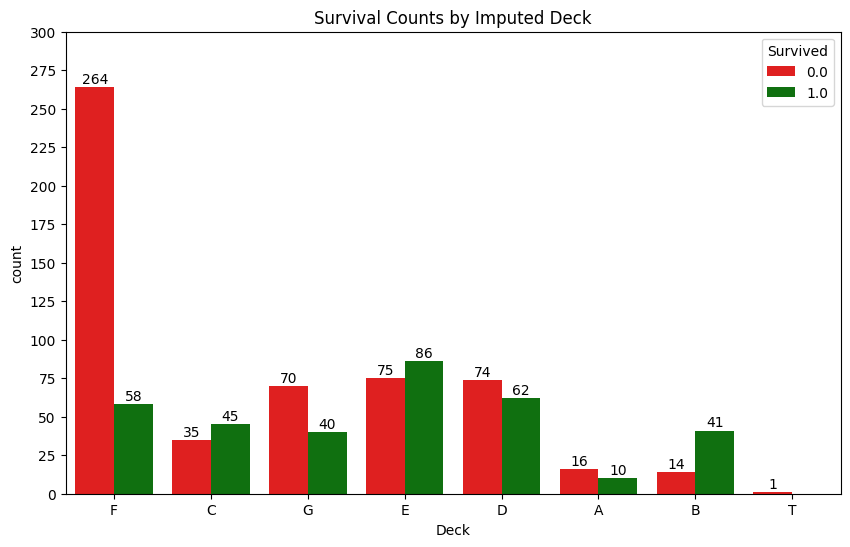

In [67]:
# Step 4: Validate with survival counts
train_df = titanic_df[titanic_df['Survived'].notna()]
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=titanic_df['Deck'], hue='Survived', data=train_df, palette={0: 'red', 1: 'green'})
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 5, int(height),
                ha="center", va="center", color="black", fontsize=10)
plt.title('Survival Counts by Imputed Deck')
plt.yticks(np.arange(0,301,step=25))
plt.show()

There was too little supporting information and too much uncertainty in potential 'Deck' variable assignment strategy, even though I do think deck location would be predictive
to survival if enough passengers could accurately allocated to them.  After much rigor and research, it was determined that enough reliable deck imputation is not possible, and the use of the variable was abandoned.

C1. Exploratory Preliminary Analysis For Age Imputation

In [68]:
# Compute descriptive statistics for Age by Title for non-missing Age values.
titanic_df.groupby('Title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.00,70.0,70.00,70.0
Col,4.0,54.000000,5.477226,47.00,51.50,54.5,57.00,60.0
Countess,1.0,33.000000,NaN,33.00,33.00,33.0,33.00,33.0
Don,1.0,40.000000,NaN,40.00,40.00,40.0,40.00,40.0
Dona,1.0,39.000000,NaN,39.00,39.00,39.0,39.00,39.0
Dr,7.0,43.571429,11.731115,23.00,38.00,49.0,51.50,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.00,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.00,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.75,48.5,50.25,52.0


An important first step was to understand 'Age' distribution by 'Title'.  Master related directly to young boys, while Mr could in rare cases.  Miss could relate to young girls or adult women.  Mr mainly related to adult men and fathers. Mrs mainly related to adult women and mothers.

In [69]:
# Filter dataset to non-missing ages
titanic_non_missing = titanic_df[titanic_df['Age'].notnull()]

# Group by FamilyID to identify families with Mrs., Master, Miss, and Mr.
family_groups = titanic_non_missing.groupby('FamilyID')

# Initialize lists to store age differences
mother_child_diffs = []

# Iterate through families to calculate age differences
for family_id, group in family_groups:
    # Identify Mrs., Master, Miss, and Mr. in the family with non-missing ages
    mrs = group[group['Title'] == 'Mrs']
    master = group[group['Title'] == 'Master']
    miss = group[group['Title'] == 'Miss']
    mr = group[group['Title'] == 'Mr']
   
    # Case 1: Mother (Mrs.) and Children (Master/Mr/Miss)
    if not mrs.empty and (not master.empty or not mr.empty or not miss.empty):
        mrs_age = mrs['Age'].mean() # Average age if multiple Mrs.
        # Calculate difference with Master (boys)
        if not master.empty:
            for child_age in master['Age']:
                diff = mrs_age - child_age
                if diff > 0:  # Ensure positive difference
                    mother_child_diffs.append(diff)
        # Calculate difference with Mr (boys)
        if not mr.empty:
            # Filter Mr. to likely sons (age < 19)
            potential_sons = mr[mr['Age'] < 19]
            for child_age in potential_sons['Age']:
                diff = mrs_age - child_age
                if diff > 0:  # Ensure positive difference
                    mother_child_diffs.append(diff)
        # Calculate difference with Miss (age < 19)
        if not miss.empty:
            # Filter Miss to likely daughters (age < 19)
            potential_daughters = miss[miss['Age'] < 19]
            for child_age in potential_daughters['Age']:
                diff = mrs_age - child_age
                if diff > 0:  # Ensure positive difference
                    mother_child_diffs.append(diff)

# Mother-Child Age Differences
if mother_child_diffs:
    print("\nMother (Mrs.) to Child (Master/Mr/Miss) Age Differences (Non-Missing Ages):")
    print(f"Count: {len(mother_child_diffs)}")
    print(f"Mean: {np.mean(mother_child_diffs):.2f}")
    print(f"Std: {np.std(mother_child_diffs):.2f}")
    print(f"Min: {np.min(mother_child_diffs):.2f}")
    print(f"25%: {np.percentile(mother_child_diffs, 25):.2f}")
    print(f"Median: {np.median(mother_child_diffs):.2f}")
    print(f"75%: {np.percentile(mother_child_diffs, 75):.2f}")
    print(f"Max: {np.max(mother_child_diffs):.2f}")
else:
    print("\nNo families with non-missing ages found for Mrs. and Master/Mr/Miss age difference calculation.")


Mother (Mrs.) to Child (Master/Mr/Miss) Age Differences (Non-Missing Ages):
Count: 104
Mean: 28.16
Std: 6.76
Min: 15.58
25%: 23.00
Median: 27.00
75%: 33.00
Max: 50.00


It was important to understand the median 'Age' difference between mothers and children to estimate a missing age if either is known in a family group.

In [70]:
# Filter dataset to rows with missing Age values
missing_age_df = titanic_df[titanic_df['Age'].isnull()]

# Calculate the distribution of Title for missing Age values
title_distribution = missing_age_df['Title'].value_counts()

# Display the distribution
print("Distribution of Title for Missing Age Values:")
print(title_distribution)

Distribution of Title for Missing Age Values:
Title
Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: count, dtype: int64


It was important to understand the titles associated with the missing age values.

In [71]:
# Group by FamilyID and collect Titles, Ages, and Missing Ages, only for families with missing ages.
family_summary = titanic_df.groupby('FamilyID').agg({
    'Title': lambda x: list(x),                     # List of titles in the family
    'Age': lambda x: list(x),                       # List of ages (including NaN)
    'PassengerId': 'count'                          # Count of passengers in the family
}).reset_index()

# Filter for families with at least one missing age.
family_summary = family_summary[family_summary['Age'].apply(lambda x: any(pd.isna(x)))]

# Add columns for missing and known ages
family_summary['MissingAgeCount'] = family_summary['Age'].apply(lambda x: sum(pd.isna(x)))
family_summary['KnownAges'] = family_summary['Age'].apply(lambda x: [age for age in x if pd.notna(age)])
family_summary['KnownAgeCount'] = family_summary['KnownAges'].apply(len)

# Display the summary for families with missing ages only.
print("\nFamilyID Summary with Titles, Ages, and Missing Ages (Only Families with Missing Ages):")
for _, row in family_summary.iterrows():
    print(f"\nFamilyID: {row['FamilyID']}")
    print(f"Total Passengers: {row['PassengerId']}")
    print(f"Titles: {row['Title']}")
    print(f"Ages (including missing): {row['Age']}")
    print(f"Known Ages: {row['KnownAges']}")
    print(f"Missing Ages Count: {row['MissingAgeCount']}")
    print(f"Known Ages Count: {row['KnownAgeCount']}")

# Additional: Total missing ages by title
missing_by_title = titanic_df[titanic_df['Age'].isna()].groupby('Title').size().reset_index(name='MissingCount')
print("\nTotal Missing Ages by Title:")
print(missing_by_title)


FamilyID Summary with Titles, Ages, and Missing Ages (Only Families with Missing Ages):

FamilyID: Baumann_PC 17318
Total Passengers: 1
Titles: ['Mr']
Ages (including missing): [nan]
Known Ages: []
Missing Ages Count: 1
Known Ages Count: 0

FamilyID: Betros_2622
Total Passengers: 1
Titles: ['Master']
Ages (including missing): [nan]
Known Ages: []
Missing Ages Count: 1
Known Ages Count: 0

FamilyID: Boulos_2664
Total Passengers: 1
Titles: ['Mr']
Ages (including missing): [nan]
Known Ages: []
Missing Ages Count: 1
Known Ages Count: 0

FamilyID: Boulos_2678
Total Passengers: 3
Titles: ['Mrs', 'Miss', 'Master']
Ages (including missing): [nan, 9.0, 6.0]
Known Ages: [9.0, 6.0]
Missing Ages Count: 1
Known Ages Count: 2

FamilyID: Bourke_364848
Total Passengers: 1
Titles: ['Miss']
Ages (including missing): [nan]
Known Ages: []
Missing Ages Count: 1
Known Ages Count: 0

FamilyID: Bradley_111427
Total Passengers: 1
Titles: ['Mr']
Ages (including missing): [nan]
Known Ages: []
Missing Ages Count

This analysis was useful to understand how the missing age values are distributed amongst specific family groups.

In [72]:
# Filter dataset to rows with non-missing Age values
titanic_non_missing = titanic_df[titanic_df['Age'].notnull()]

# Group by FamilyID to identify couples and parent pairs
family_groups = titanic_non_missing.groupby('FamilyID')

# Initialize lists to store age differences
wife_husband_diffs = []
mother_father_diffs = []

# Iterate through families to calculate age differences
for family_id, group in family_groups:
    # Identify Mr. and Mrs. in the family with non-missing ages
    mr = group[group['Title'] == 'Mr']
    mrs = group[group['Title'] == 'Mrs']
   
    # Case 1: Wife-Husband (Mr. and Mrs. pair, FamilySize = 1, Parch = 0, no children)
    if not mr.empty and not mrs.empty and len(group) == 2 and group['FamilySize'].iloc[0] == 1 and group['Parch'].all() == 0:
        mr_age = mr['Age'].mean()
        mrs_age = mrs['Age'].mean()
        diff = mrs_age - mr_age
        if diff > -10 and diff < 10:
            wife_husband_diffs.append(diff)
   
    # Case 2: Mother-Father (Mrs. and Mr. with children, FamilySize >= 2, Parch >= 1)
    children = group[group['Title'].isin(['Master', 'Miss']) | ((group['Title'] == 'Mr') & (group['Age'] < 19))]
    if not mrs.empty and not mr.empty and not children.empty and group['FamilySize'].iloc[0] >= 2 and group['Parch'].max() >= 1:
        mr_age = mr['Age'].mean()
        mrs_age = mrs['Age'].mean()
        diff = mrs_age - mr_age
        if diff > -10 and diff < 10:
            mother_father_diffs.append(diff)

# Calculate statistics for age differences
if wife_husband_diffs:
    print("\nWife (Mrs.) to Husband (Mr.) Age Differences (Non-Missing Ages, FamilySize = 1, Parch = 0):")
    print(f"Count: {len(wife_husband_diffs)}")
    print(f"Mean: {np.mean(wife_husband_diffs):.2f}")
    print(f"Std: {np.std(wife_husband_diffs):.2f}")
    print(f"Min: {np.min(wife_husband_diffs):.2f}")
    print(f"25%: {np.percentile(wife_husband_diffs, 25):.2f}")
    print(f"Median: {np.median(wife_husband_diffs):.2f}")
    print(f"75%: {np.percentile(wife_husband_diffs, 75):.2f}")
    print(f"Max: {np.max(wife_husband_diffs):.2f}")
else:
    print("\nNo valid Wife-Husband pairs found with non-missing ages and FamilySize = 1, Parch = 0 for age difference calculation.")

if mother_father_diffs:
    print("\nMother (Mrs.) to Father (Mr.) Age Differences (Non-Missing Ages, FamilySize >= 2, Parch >= 1):")
    print(f"Count: {len(mother_father_diffs)}")
    print(f"Mean: {np.mean(mother_father_diffs):.2f}")
    print(f"Std: {np.std(mother_father_diffs):.2f}")
    print(f"Min: {np.min(mother_father_diffs):.2f}")
    print(f"25%: {np.percentile(mother_father_diffs, 25):.2f}")
    print(f"Median: {np.median(mother_father_diffs):.2f}")
    print(f"75%: {np.percentile(mother_father_diffs, 75):.2f}")
    print(f"Max: {np.max(mother_father_diffs):.2f}")
else:
    print("\nNo valid Mother-Father pairs with children found with non-missing ages and FamilySize >= 2, Parch >= 1 for age difference calculation.")

# Optional: Display sample families with differences
if wife_husband_diffs or mother_father_diffs:
    print("\nSample Families with Age Differences:")
    for family_id, group in family_groups:
        mr = group[group['Title'] == 'Mr']
        mrs = group[group['Title'] == 'Mrs']
        children = group[group['Title'].isin(['Master', 'Miss']) | ((group['Title'] == 'Mr') & (group['Age'] < 19))]
        if (not mr.empty and not mrs.empty and len(group) == 2 and group['FamilySize'].iloc[0] == 1 and group['Parch'].all() == 0) or \
           (not mrs.empty and not mr.empty and not children.empty and group['FamilySize'].iloc[0] >= 2 and group['Parch'].max() >= 1):
            mr_age = mr['Age'].mean() if not mr.empty else None
            mrs_age = mrs['Age'].mean() if not mrs.empty else None
            if (mrs_age and mr_age and mrs_age - mr_age > -10 and mrs_age - mr_age < 10) or not children.empty:
                print(f"\nFamilyID: {family_id}")
                print(group[['Title', 'Age', 'Pclass', 'FamilySize', 'SibSp', 'Parch']].to_string(index=False))


Wife (Mrs.) to Husband (Mr.) Age Differences (Non-Missing Ages, FamilySize = 1, Parch = 0):
Count: 41
Mean: -2.40
Std: 3.12
Min: -8.00
25%: -4.00
Median: -2.00
75%: -1.00
Max: 6.00

Mother (Mrs.) to Father (Mr.) Age Differences (Non-Missing Ages, FamilySize >= 2, Parch >= 1):
Count: 21
Mean: -1.71
Std: 4.03
Min: -8.00
25%: -5.00
Median: -2.00
75%: 0.00
Max: 7.00

Sample Families with Age Differences:

FamilyID: Abbott_C.A. 2673
 Title  Age  Pclass  FamilySize  SibSp  Parch
   Mrs 35.0       3           2      1      1
    Mr 16.0       3           2      1      1
Master 13.0       3           2      0      2

FamilyID: Abelson_P/PP 3381
Title  Age  Pclass  FamilySize  SibSp  Parch
   Mr 30.0       2           1      1      0
  Mrs 28.0       2           1      1      0

FamilyID: Allison_113781
 Title   Age  Pclass  FamilySize  SibSp  Parch
  Miss  2.00       1           3      1      2
Master  0.92       1           3      1      2
   Mrs 25.00       1           3      1      2
    M

This analyis revealed that the median difference between a husband/father and a wife/mother is 2 years, and how the 'SibSp' and 'Parch' variables could be be used to identify them, their children, and brothers/sisters. 

C2. Age_Cat Variable Creation


Distribution of Age_Cat for Passengers with Known Ages:
Age_Cat
Adult           393
Young Adult     309
Mature Adult    205
Infant           51
Child            48
Senior           40
Name: count, dtype: int64


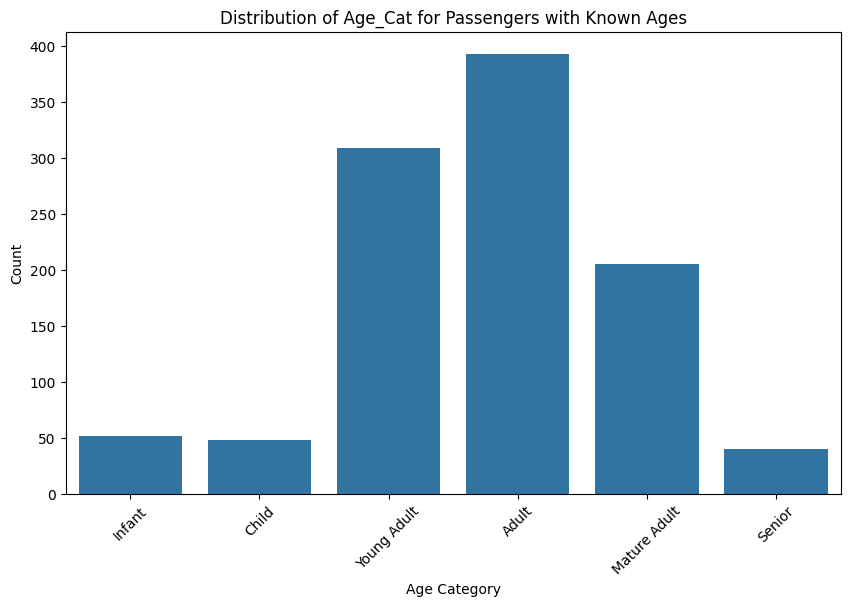

In [73]:
# Step 1: Create Age_Cat with suggested categories based on survival rates.
def assign_age_category(age):
    if pd.isna(age):
        return np.nan
    elif age <= 4:  # Infant
        return 'Infant'
    elif age <= 13:  # Child
        return 'Child'
    elif age <= 24:  # Young Adult
        return 'Young Adult'
    elif age <= 39:  # Adult
        return 'Adult'
    elif age <= 59:  # Mature Adult
        return 'Mature Adult'
    else:  # Senior
        return 'Senior'

titanic_df['Age_Cat'] = titanic_df['Age'].apply(assign_age_category)

# Display the distribution of Age_Cat for passengers with known ages
print("\nDistribution of Age_Cat for Passengers with Known Ages:")
print(titanic_df[titanic_df['Age'].notna()]['Age_Cat'].value_counts())

# Plot distribution of Age_Cat for known ages
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Cat', data=titanic_df[titanic_df['Age'].notna()],
              order=['Infant', 'Child', 'Young Adult', 'Adult', 'Mature Adult', 'Senior'])
plt.title('Distribution of Age_Cat for Passengers with Known Ages')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


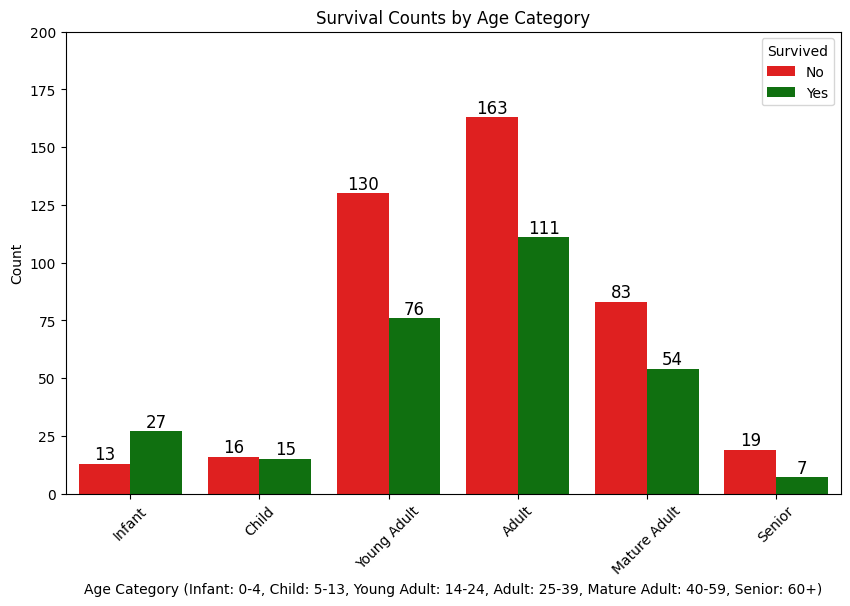

In [74]:
# Bar chart for 'Age_Cat' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age_Cat', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'},
              order=['Infant', 'Child', 'Young Adult', 'Adult', 'Mature Adult', 'Senior'])

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 4,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="black", fontsize=12)

plt.title('Survival Counts by Age Category')
plt.xlabel('Age Category (Infant: 0-4, Child: 5-13, Young Adult: 14-24, Adult: 25-39, Mature Adult: 40-59, Senior: 60+)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,201,step=25))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

The 'Age_Cat' variable was created to hopefully better represent the 'Age' variable by focusing in on age groups and their potential predictiveness.  Most of the binning cut-off points represented transition points in the histogram, but the cut-off between child and young adult was due to one of passengers having a 14 year old wife.

C3. Exploratory Analysis For Age_Cat Imputation

In [75]:
# Standalone block for descriptive statistics of Mr and Miss > 18 years
print("\nDescriptive Statistics for Mr and Miss Passengers Over 18 Years:")

# Step 1: Extract or verify Title column
if 'Title' not in titanic_df.columns:
    # Extract titles from Name (common Titanic pattern)
    titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    # Map and clean titles
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Dr', 'Rev': 'Rev', 'Col': 'Military', 'Major': 'Military',
        'Capt': 'Military', 'Don': 'Noble', 'Lady': 'Noble', 'Sir': 'Noble',
        'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'
    }
    titanic_df['Title'] = titanic_df['Title'].map(title_mapping).fillna('Other')
    print("\nTitles extracted and mapped from Name column:")
    print(titanic_df['Title'].value_counts())

# Step 2: Filter passengers over 18
df_adults = titanic_df[titanic_df['Age'].notna() & (titanic_df['Age'] > 18)].copy()

# Step 3: Categorize Mr and Miss
df_mr = df_adults[df_adults['Title'] == 'Mr']
df_miss = df_adults[df_adults['Title'] == 'Miss']

# Step 4: Compute descriptive statistics
print("\nDescriptive Statistics for Mr (Adult Males > 18):")
stats_mr = df_mr[['Age', 'Pclass', 'Fare', 'Survived']].describe()
print(stats_mr)

print("\nDescriptive Statistics for Miss (Adult Unmarried Females > 18):")
stats_miss = df_miss[['Age', 'Pclass', 'Fare', 'Survived']].describe()
print(stats_miss)

# Step 5: Additional categorization check (optional)
print("\nVerification of Categorization:")
print(f"Total Mr over 18: {len(df_mr)}")
print(f"Total Miss over 18: {len(df_miss)}")
print(f"Percentage of Miss who are over 18: {(len(df_miss) / len(df_adults[df_adults['Sex'] == 'female'])):.2%}")


Descriptive Statistics for Mr and Miss Passengers Over 18 Years:

Descriptive Statistics for Mr (Adult Males > 18):
              Age      Pclass        Fare    Survived
count  533.000000  533.000000  533.000000  363.000000
mean    33.648218    2.277674   27.500921    0.176309
std     12.016733    0.828197   47.022356    0.381608
min     18.500000    1.000000    0.000000    0.000000
25%     24.000000    2.000000    7.895800    0.000000
50%     30.000000    3.000000   11.500000    0.000000
75%     40.000000    3.000000   26.550000    0.000000
max     80.000000    3.000000  512.329200    1.000000

Descriptive Statistics for Miss (Adult Unmarried Females > 18):
              Age      Pclass        Fare   Survived
count  129.000000  129.000000  129.000000  85.000000
mean    29.073643    1.992248   59.863922   0.764706
std      8.933369    0.888258   82.992403   0.426700
min     18.500000    1.000000    6.950000   0.000000
25%     22.000000    1.000000    7.925000   1.000000
50%     27.000

Because Miss and Mr titles could potentially be children or adults, it was necessary to look at age statistics separating the young (18 or less) from the adult (19 or more).

In [76]:
# Standalone block to analyze Miss passengers with age categories
print("\nAnalysis of Miss Passengers with Age Categories:")

# Step 1: Extract or verify Title column
if 'Title' not in titanic_df.columns:
    # Extract titles from Name
    titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    # Map and clean titles
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Dr', 'Rev': 'Rev', 'Col': 'Military', 'Major': 'Military',
        'Capt': 'Military', 'Don': 'Noble', 'Lady': 'Noble', 'Sir': 'Noble',
        'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'
    }
    titanic_df['Title'] = titanic_df['Title'].map(title_mapping).fillna('Other')
    print("\nTitles extracted and mapped from Name column:")
    print(titanic_df['Title'].value_counts())

# Step 2: Filter for Miss passengers
df_miss = titanic_df[titanic_df['Title'] == 'Miss'].copy()

# Step 3: Handle missing ages (optional imputation)
# For now, we'll exclude missing ages; uncomment the next line to impute with median
# df_miss['Age'] = df_miss['Age'].fillna(df_miss['Age'].median())
df_miss = df_miss[df_miss['Age'].notna()]

# Step 4: Define age categories
bins = [0, 4, 13, 18, float('inf')]
labels = ['Infant (0-4)', 'Child (5-13)', 'Teen (14-18)', 'Adult (>18)']
df_miss['AgeCategory'] = pd.cut(df_miss['Age'], bins=bins, labels=labels, include_lowest=True)

# Step 5: Distribution of Miss passengers by age category
print("\nDistribution of Miss Passengers by Age Category:")
age_distribution = df_miss['AgeCategory'].value_counts().reindex(labels)
age_distribution_pct = (age_distribution / age_distribution.sum()) * 100
print(age_distribution)
print("\nPercentage Distribution:")
print(age_distribution_pct)

# Step 6: Descriptive statistics for each age category
print("\nDescriptive Statistics by Age Category for Miss Passengers:")
for category in labels:
    print(f"\n{category}:")
    stats = df_miss[df_miss['AgeCategory'] == category][['Age', 'Pclass', 'Fare', 'Survived']].describe()
    print(stats)

# Step 7: Validation of >50% being 18 or younger
total_miss = len(df_miss)
miss_18_or_younger = len(df_miss[df_miss['Age'] <= 18])
percentage_18_or_younger = (miss_18_or_younger / total_miss) * 100
print(f"\nValidation Check:")
print(f"Total Miss passengers (with age): {total_miss}")
print(f"Miss passengers 18 or younger: {miss_18_or_younger}")
print(f"Percentage of Miss passengers 18 or younger: {percentage_18_or_younger:.2f}%")


Analysis of Miss Passengers with Age Categories:

Distribution of Miss Passengers by Age Category:
AgeCategory
Infant (0-4)     24
Child (5-13)     22
Teen (14-18)     35
Adult (>18)     129
Name: count, dtype: int64

Percentage Distribution:
AgeCategory
Infant (0-4)    11.428571
Child (5-13)    10.476190
Teen (14-18)    16.666667
Adult (>18)     61.428571
Name: count, dtype: float64

Descriptive Statistics by Age Category for Miss Passengers:

Infant (0-4):
             Age     Pclass        Fare   Survived
count  24.000000  24.000000   24.000000  17.000000
mean    2.107917   2.666667   27.268229   0.705882
std     1.239930   0.564660   28.008830   0.469668
min     0.170000   1.000000   10.462500   0.000000
25%     1.000000   2.000000   15.250025   0.000000
50%     2.000000   3.000000   20.393750   1.000000
75%     3.000000   3.000000   27.787500   1.000000
max     4.000000   3.000000  151.550000   1.000000

Child (5-13):
             Age     Pclass       Fare   Survived
count  22.00

After looking at statistics for 19 or older Miss titles, it seemed reasonable to look at Miss titles that were 18 or less and how they fit in the younger age categories.


Descriptive Statistics for Single Travelers (FamilySize = 0, Miss/Mr >18):
                          count       mean        std   min    25%    50%  \
Title    Pclass Survived                                                    
Col      1      0.0         1.0  60.000000        NaN  60.0  60.00  60.00   
                1.0         1.0  56.000000        NaN  56.0  56.00  56.00   
Countess 1      1.0         1.0  33.000000        NaN  33.0  33.00  33.00   
Don      1      0.0         1.0  40.000000        NaN  40.0  40.00  40.00   
Dr       1      0.0         0.0        NaN        NaN   NaN    NaN    NaN   
                1.0         2.0  40.500000  12.020815  32.0  36.25  40.50   
         2      0.0         2.0  38.500000  21.920310  23.0  30.75  38.50   
Jonkheer 1      0.0         1.0  38.000000        NaN  38.0  38.00  38.00   
Major    1      0.0         1.0  45.000000        NaN  45.0  45.00  45.00   
                1.0         1.0  52.000000        NaN  52.0  52.00  52.00   


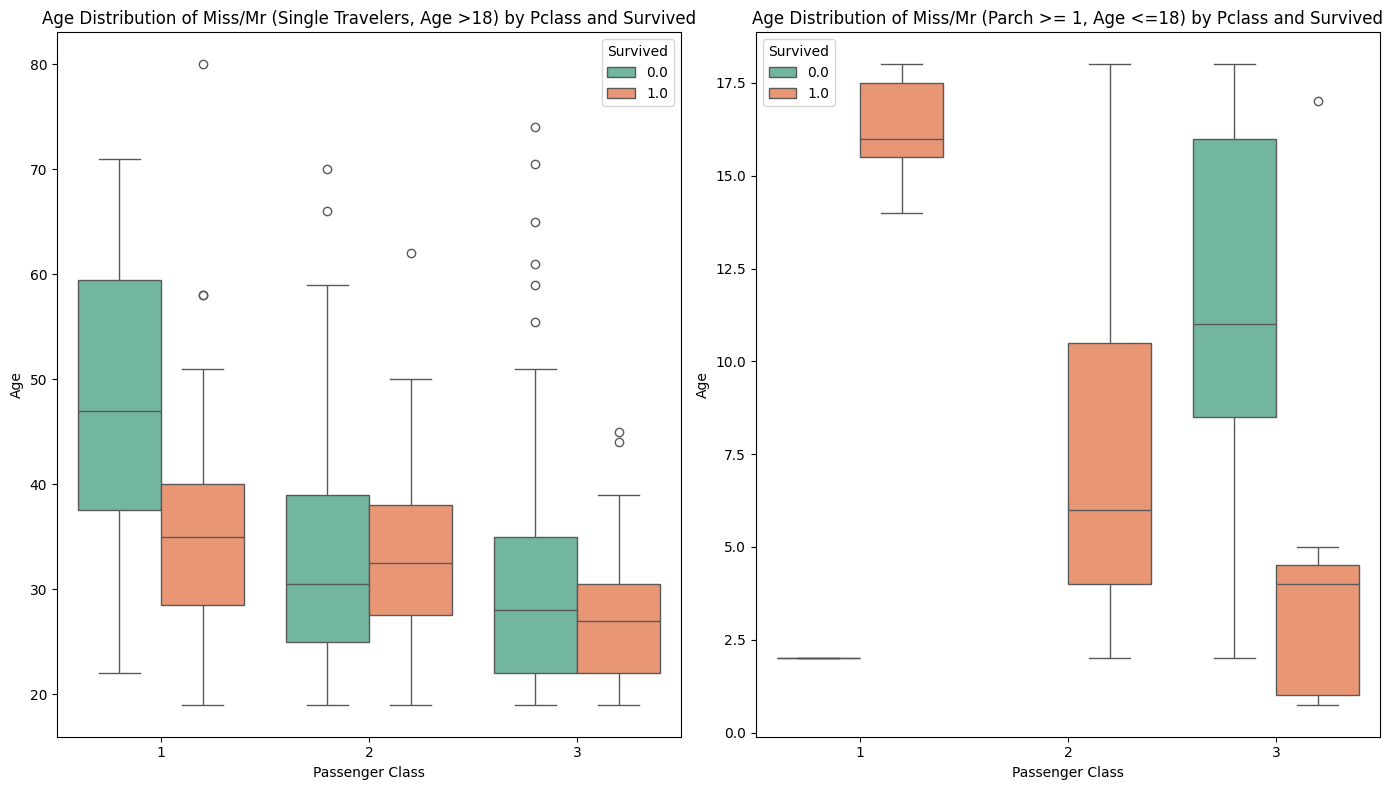


Number of Mr passengers <=18: 48

Sample of Mr passengers <=18:
     PassengerId Title   Age  Pclass  Survived  Parch  SibSp  FamilySize
86            87    Mr  16.0       3       0.0      3      1           4
138          139    Mr  16.0       3       0.0      0      0           0
144          145    Mr  18.0       2       0.0      0      0           0
163          164    Mr  17.0       3       0.0      0      0           0
175          176    Mr  18.0       3       0.0      1      1           2


In [77]:
# Step 1: Descriptive Statistics for FamilySize = 0 (Single Travelers, >18 for Miss and Mr)
single_travelers = titanic_df[titanic_df['FamilySize'] == 0].copy()
single_travelers_filtered = single_travelers[
    ((single_travelers['Title'].isin(['Miss', 'Mr'])) & (single_travelers['Age'] > 18)) |
    (~single_travelers['Title'].isin(['Miss', 'Mr']))
].copy()

print("\nDescriptive Statistics for Single Travelers (FamilySize = 0, Miss/Mr >18):")
single_stats = single_travelers_filtered.groupby(['Title', 'Pclass', 'Survived'])['Age'].describe()
print(single_stats)

# Step 2: Descriptive Statistics for Child Relationships (Parch >= 1, <=18 for Miss and Mr)
child_relationships = titanic_df[titanic_df['Parch'] >= 1].copy()
child_relationships_filtered = child_relationships[
    ((child_relationships['Title'].isin(['Miss', 'Mr'])) & (child_relationships['Age'] <= 18)) |
    (~child_relationships['Title'].isin(['Miss', 'Mr']))
].copy()

print("\nDescriptive Statistics for Child Relationships (Parch >= 1, Miss/Mr <=18):")
child_stats = child_relationships_filtered.groupby(['Title', 'Pclass', 'Survived'])['Age'].describe()
print(child_stats)

# Step 3: Visualize Distributions with Boxplots
plt.figure(figsize=(14, 8))

# Boxplot for Single Travelers
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', hue='Survived',
            data=single_travelers_filtered[single_travelers_filtered['Title'].isin(['Miss', 'Mr'])],
            palette='Set2')
plt.title('Age Distribution of Miss/Mr (Single Travelers, Age >18) by Pclass and Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

# Boxplot for Child Relationships
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Age', hue='Survived',
            data=child_relationships_filtered[child_relationships_filtered['Title'].isin(['Miss', 'Mr'])],
            palette='Set2')
plt.title('Age Distribution of Miss/Mr (Parch >= 1, Age <=18) by Pclass and Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Step 4: Count of Mr <=18 to Confirm
mr_under_18 = titanic_df[(titanic_df['Title'] == 'Mr') & (titanic_df['Age'] <= 18) & (titanic_df['Age'].notna())]
print(f"\nNumber of Mr passengers <=18: {len(mr_under_18)}")
print("\nSample of Mr passengers <=18:")
print(mr_under_18[['PassengerId', 'Title', 'Age', 'Pclass', 'Survived', 'Parch', 'SibSp', 'FamilySize']].head())

Additional analysis and reporting was performed to be understand Mr and Miss titles, given Mr and Miss could be used for a son or daughter under the age of 19, or could be used for an adult above the age of 18. It was important to understand the distinction for Age imputation.

C4. Age & Age_Cat Variable Imputation

Columns in df_copy: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Surname', 'FamilyID', 'FamilySize', 'TicketPrefix', 'TicketNumber', 'Deck', 'Age_Cat']
Median Ages by Title, Pclass, Embarked, and Age_Group:
        Title  Pclass Embarked Age_Group    Age  Count
0        Capt       1        C      <=18  70.00      0
1        Capt       1        C       >18  70.00      0
2        Capt       1        Q      <=18  70.00      0
3        Capt       1        Q       >18  70.00      0
4        Capt       1        S      <=18  70.00      0
5        Capt       1        S       >18  70.00      1
6        Capt       2        C      <=18  70.00      0
7        Capt       2        C       >18  70.00      0
8        Capt       2        Q      <=18  70.00      0
9        Capt       2        Q       >18  70.00      0
10       Capt       2        S      <=18  70.00      0
11       Capt       2        S       >18  70.00    

C:\Users\rcc_0\AppData\Local\Temp\ipykernel_19100\704622165.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df_copy.groupby(['Title', 'Pclass', 'Embarked', 'Age_Group']).size().reset_index(name='Count')
C:\Users\rcc_0\AppData\Local\Temp\ipykernel_19100\704622165.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_ages = df_copy.groupby(['Title', 'Pclass', 'Embarked', 'Age_Group'])['Age'].median().reset_index()


Imputed Age = 41.5 for Mr at index 168 (FamilySize=0, Pclass=1, Embarked=S, AgeGroup=<=18)
Mapping age 41.5 to category...
Imputed Age = 6.5 for Master at index 1230 (FamilySize=0, Pclass=3, Embarked=C, AgeGroup=<=18)
Mapping age 6.5 to category...
Imputed Age = 16.0 for Mr at index 598 (FamilySize=0, Pclass=3, Embarked=C, AgeGroup=<=18)
Mapping age 16.0 to category...
Imputed Age = 31.0 for parent at index 140
Mapping age 31.0 to category...
Skipping Age_Cat assignment at index 593 due to missing age
Imputed Age = 41.5 for Mr at index 507 (FamilySize=0, Pclass=1, Embarked=S, AgeGroup=<=18)
Mapping age 41.5 to category...
Imputed Age = 49.0 for Dr at index 766 (FamilySize=0, Pclass=1, Embarked=C, AgeGroup=<=18)
Mapping age 49.0 to category...
Imputed Age = 41.5 for Mr at index 270 (FamilySize=0, Pclass=1, Embarked=S, AgeGroup=<=18)
Mapping age 41.5 to category...
Imputed Age = 18.0 for Mr at index 466 (FamilySize=0, Pclass=2, Embarked=S, AgeGroup=<=18)
Mapping age 18.0 to category...
S

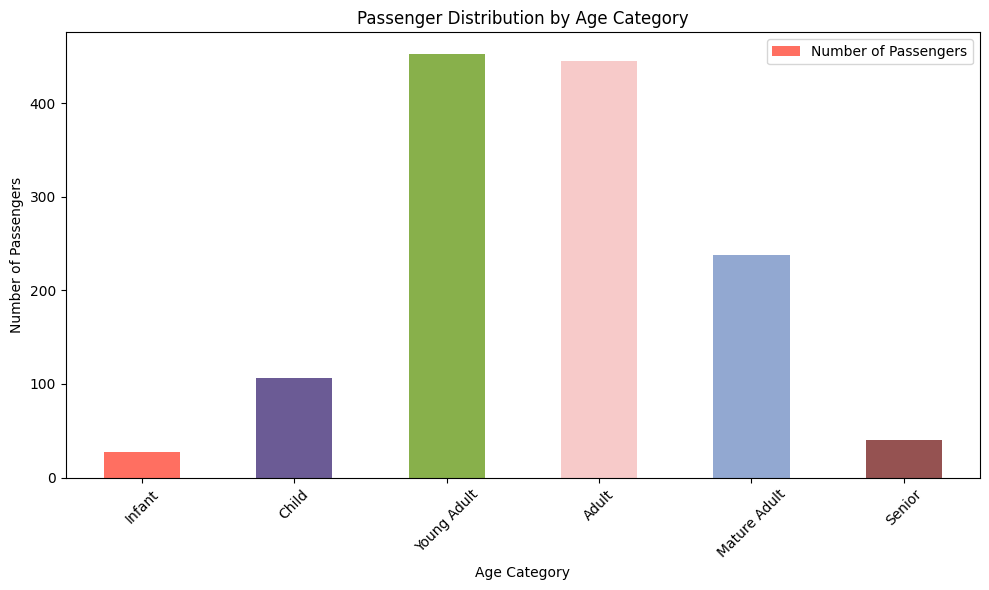


Imputed Passengers with Previously Missing Ages:
      PassengerId   Title   Age       Age_Cat  Pclass  Survived  FamilySize  \
5               6      Mr  26.0         Adult       3       0.0           0   
17             18      Mr  20.0   Young Adult       2       1.0           0   
19             20     Mrs  20.0   Young Adult       3       1.0           0   
26             27      Mr  20.0   Young Adult       3       0.0           0   
28             29    Miss  13.0         Child       3       1.0           0   
29             30      Mr  20.0   Young Adult       3       0.0           0   
31             32     Mrs  45.0  Mature Adult       1       1.0           1   
32             33    Miss  13.0         Child       3       1.0           0   
36             37      Mr  20.0   Young Adult       3       1.0           0   
42             43      Mr  20.0   Young Adult       3       0.0           0   
45             46      Mr  20.0   Young Adult       3       0.0           0   
46

In [78]:
# Step 1: Define age categories and mapping function
def map_age_to_category(age):
    if pd.isna(age):
        return None
    try:
        age = float(age)
        print(f"Mapping age {age} to category...")  # Debug print
    except (TypeError, ValueError) as e:
        print(f"Error converting age to float: {age} (type: {type(age)}). Setting to NaN.")
        return None
    if 0 <= age <= 4:
        return 'Infant'
    elif 5 <= age <= 13:  # Ensure all 5-13 are in Child
        return 'Child'
    elif 14 <= age <= 25:
        return 'Young Adult'
    elif 26 <= age <= 39:
        return 'Adult'
    elif 40 <= age <= 59:
        return 'Mature Adult'
    else:
        return 'Senior'

# Step 2: Impute Age_Cat with family-based rules
def impute_age_category(df):
    try:
        df_copy = df.copy()
    except NameError:
        raise NameError("Error: 'titanic_df' is not defined. Please ensure the dataset is loaded.")

    # Debug: Print columns to confirm presence
    print("Columns in df_copy:", df_copy.columns.tolist())

    # Verify required columns
    required_columns = ['Age', 'Pclass', 'Survived', 'Title', 'FamilySize', 'SibSp', 'Parch', 'FamilyID', 'PassengerId', 'Sex', 'Embarked']
    missing_columns = [col for col in required_columns if col not in df_copy.columns]
    if missing_columns:
        raise KeyError(f"Error: Missing required columns in dataset: {missing_columns}")

    # Ensure columns have correct types
    try:
        df_copy['Age'] = pd.to_numeric(df_copy['Age'], errors='coerce')
        df_copy['Pclass'] = pd.to_numeric(df_copy['Pclass'], errors='coerce', downcast='integer')
        df_copy['Survived'] = pd.to_numeric(df_copy['Survived'], errors='coerce')
        df_copy['FamilySize'] = pd.to_numeric(df_copy['FamilySize'], errors='coerce')
        df_copy['SibSp'] = pd.to_numeric(df_copy['SibSp'], errors='coerce')
        df_copy['Parch'] = pd.to_numeric(df_copy['Parch'], errors='coerce')
        df_copy['FamilyID'] = df_copy['FamilyID'].astype(str)
        df_copy['Embarked'] = df_copy['Embarked'].astype(str)  # Ensure Embarked is string
    except Exception as e:
        raise ValueError(f"Error converting column types: {str(e)}")

    # Check for non-numeric values in critical columns
    for col in ['Age', 'Pclass', 'Survived', 'FamilySize', 'SibSp', 'Parch']:
        non_numeric = df_copy[col][df_copy[col].apply(lambda x: not pd.isna(x) and not isinstance(x, (int, float)))].index
        if not non_numeric.empty:
            print(f"Warning: Non-numeric values found in {col} at indices {non_numeric.tolist()}: {df_copy.loc[non_numeric, col].tolist()}")

    # Initialize Age_Cat column only if it doesn't exist
    if 'Age_Cat' not in df_copy.columns:
        df_copy['Age_Cat'] = None  # Initialize with None

    # Calculate median ages by Title, Pclass, Embarked, and age subgroups (<=18, >18)
    df_copy['Age_Group'] = pd.cut(df_copy['Age'], bins=[-np.inf, 18, np.inf], labels=['<=18', '>18'])
    try:
        # Calculate counts to handle sparse data
        group_counts = df_copy.groupby(['Title', 'Pclass', 'Embarked', 'Age_Group']).size().reset_index(name='Count')
        median_ages = df_copy.groupby(['Title', 'Pclass', 'Embarked', 'Age_Group'])['Age'].median().reset_index()
        # Merge counts with medians
        median_ages = median_ages.merge(group_counts, on=['Title', 'Pclass', 'Embarked', 'Age_Group'])
        # Fallback for sparse data (less than 3 passengers in a group)
        title_medians = df_copy.groupby(['Title'])['Age'].median().to_dict()  # Broadest fallback
        fallback_medians = df_copy.groupby(['Title', 'Pclass'])['Age'].median().reset_index(name='Fallback_Median')
        for idx, row in median_ages.iterrows():
            if row['Count'] < 3:  # If fewer than 3 passengers, use fallback
                title = row['Title']
                pclass = row['Pclass']
                fallback_median = fallback_medians[(fallback_medians['Title'] == title) & (fallback_medians['Pclass'] == pclass)]['Fallback_Median']
                if not fallback_median.empty:
                    median_ages.loc[idx, 'Age'] = fallback_median.iloc[0]
                else:
                    median_ages.loc[idx, 'Age'] = title_medians.get(title, 30.0)
        print("Median Ages by Title, Pclass, Embarked, and Age_Group:")
        print(median_ages[['Title', 'Pclass', 'Embarked', 'Age_Group', 'Age', 'Count']])
    except Exception as e:
        print(f"Error during median age calculation: {str(e)}")
        raise
    df_copy = df_copy.drop(columns=['Age_Group'])

    median_ages_dict = {}
    for _, row in median_ages.iterrows():
        title = row['Title']
        pclass = row['Pclass']
        embarked = row['Embarked']
        age_group = row['Age_Group']
        age = row['Age']
        if pd.isna(title) or pd.isna(pclass) or pd.isna(embarked) or pd.isna(age_group) or pd.isna(age):
            print(f"Skipping median age entry due to NaN: Title={title}, Pclass={pclass}, Embarked={embarked}, AgeGroup={age_group}, Age={age}")
            continue
        if age_group == '>18':
            if title == 'Miss' and age < 20:
                age = 25.0
            elif title == 'Mr' and age < 25:
                age = 35.0
        elif age_group == '<=18':
            if title == 'Master' and age > 13:  # Cap Master at 13 for <=18 group
                age = 13.0
            elif title == 'Miss' and age > 13:  # Cap Miss at 13 for <=18 group
                age = 13.0
        median_ages_dict[(title, pclass, embarked, age_group)] = age
    default_median_age = df_copy['Age'].median() if not df_copy['Age'].isna().all() else 30.0

    # Group by FamilyID
    try:
        family_groups = df_copy.groupby('FamilyID')
        print("Successfully grouped by FamilyID")
    except Exception as e:
        raise KeyError(f"Error grouping by FamilyID: {str(e)}")

    for family_id, group in family_groups:
        if pd.isna(family_id) or family_id == 'nan':
            continue

        # FamilySize = 0 (Single Travelers)
        if group['FamilySize'].iloc[0] == 0:
            for idx in group.index:
                if pd.isna(df_copy.loc[idx, 'Age_Cat']):
                    if pd.isna(df_copy.loc[idx, 'Age']):
                        pclass = df_copy.loc[idx, 'Pclass']
                        title = df_copy.loc[idx, 'Title']
                        embarked = df_copy.loc[idx, 'Embarked']
                        if pd.isna(pclass) or pd.isna(title) or pd.isna(embarked):
                            print(f"Skipping index {idx} due to missing Pclass, Title, or Embarked")
                            continue
                        age_group = '<=18' if pd.isna(df_copy.loc[idx, 'Age']) or df_copy.loc[idx, 'Age'] <= 18 else '>18'
                        try:
                            lookup_key = (title, pclass, embarked, age_group)
                            median_age = median_ages_dict.get(lookup_key)
                            if median_age is None:
                                # Fallback to Title-only median
                                median_age = title_medians.get(title, default_median_age)
                                print(f"Key {lookup_key} not found in median_ages_dict. Falling back to Title median: {median_age}")
                        except Exception as e:
                            print(f"Error during median_ages_dict lookup for index {idx}: {str(e)}")
                            raise
                        if title == 'Master' and median_age > 13:  # Cap at 13 for Child
                            median_age = 13
                        elif title == 'Miss' and median_age > 13 and age_group == '<=18':  # Cap at 13 for <=18 group
                            median_age = 13
                        df_copy.loc[idx, 'Age'] = median_age
                        print(f"Imputed Age = {median_age} for {title} at index {idx} (FamilySize=0, Pclass={pclass}, Embarked={embarked}, AgeGroup={age_group})")
                    df_copy.loc[idx, 'Age_Cat'] = map_age_to_category(df_copy.loc[idx, 'Age'])

        # FamilySize > 0 (Family Groups)
        else:
            parents = group[group['Title'].isin(['Mr', 'Mrs', 'Dr']) & (group['Parch'] > 0)]
            children = group[(group['Title'].isin(['Master', 'Miss']) | ((group['Title'] == 'Mr') & (group['Age'] <= 18)) | (group['Parch'] > 0))]

            # Handle parent-child relationships (Parch = 1)
            if group['Parch'].sum() == 1 and group['SibSp'].sum() == 0:
                for parent_idx in parents.index:
                    for child_idx in children.index:
                        if pd.isna(df_copy.loc[parent_idx, 'Age']) or pd.isna(df_copy.loc[child_idx, 'Age']):
                            parent_title = df_copy.loc[parent_idx, 'Title']
                            child_title = df_copy.loc[child_idx, 'Title']
                            pclass = df_copy.loc[parent_idx, 'Pclass']
                            embarked = df_copy.loc[parent_idx, 'Embarked']
                            if parent_title == 'Mrs' and child_title in ['Master', 'Miss', 'Mr']:
                                age_diff = 25
                            elif parent_title == 'Mr' and child_title in ['Master', 'Miss']:
                                age_diff = 27
                            else:
                                continue

                            parent_age = df_copy.loc[parent_idx, 'Age']
                            child_age = df_copy.loc[child_idx, 'Age']
                            if not pd.isna(parent_age):
                                new_child_age = max(5, parent_age - age_diff)
                                if child_title == 'Master' and new_child_age > 13:
                                    new_child_age = 13
                                elif child_title == 'Miss' and new_child_age > 13:
                                    new_child_age = 13
                                df_copy.loc[child_idx, 'Age'] = new_child_age
                                print(f"Imputed Age = {new_child_age} for {child_title} at index {child_idx} from parent")
                            elif not pd.isna(child_age):
                                new_parent_age = child_age + age_diff
                                if new_parent_age < 20:
                                    new_parent_age = 20
                                df_copy.loc[parent_idx, 'Age'] = new_parent_age
                                print(f"Imputed Age = {new_parent_age} for {parent_title} at index {parent_idx} from child")
                            else:
                                age_group = '>18'
                                try:
                                    lookup_key = (parent_title, pclass, embarked, age_group)
                                    median_age = median_ages_dict.get(lookup_key)
                                    if median_age is None:
                                        median_age = title_medians.get(parent_title, default_median_age)
                                        print(f"Key {lookup_key} not found in median_ages_dict. Falling back to Title median: {median_age}")
                                except Exception as e:
                                    print(f"Error during median_ages_dict lookup for parent-child: {str(e)}")
                                    raise
                                new_child_age = max(5, median_age - age_diff)
                                if child_title == 'Master' and new_child_age > 13:
                                    new_child_age = 13
                                elif child_title == 'Miss' and new_child_age > 13:
                                    new_child_age = 13
                                df_copy.loc[parent_idx, 'Age'] = median_age
                                df_copy.loc[child_idx, 'Age'] = new_child_age
                                print(f"Imputed Age = {median_age} for {parent_title} and {new_child_age} for {child_title}")

            # Handle sibling relationships (SibSp = 1) or spousal pairs
            if group['SibSp'].sum() == 1 and group['Parch'].sum() == 0:
                siblings = group[group['SibSp'] > 0]
                if len(siblings) >= 2:
                    idx1, idx2 = siblings.index[:2]
                    title1 = df_copy.loc[idx1, 'Title']
                    title2 = df_copy.loc[idx2, 'Title']
                    pclass = df_copy.loc[idx1, 'Pclass']
                    embarked = df_copy.loc[idx1, 'Embarked']
                    if {title1, title2} in [{'Mr', 'Mrs'}, {'Mr', 'Miss'}, {'Mr', 'Mr'}, {'Miss', 'Miss'}]:
                        age1 = df_copy.loc[idx1, 'Age']
                        age2 = df_copy.loc[idx2, 'Age']
                        if pd.isna(age1) and not pd.isna(age2):
                            new_age = max(5, age2 + 2)
                            if title1 in ['Master', 'Miss'] and new_age > 13:
                                new_age = 13
                            df_copy.loc[idx1, 'Age'] = new_age
                            print(f"Imputed Age = {df_copy.loc[idx1, 'Age']} for {title1} at index {idx1}")
                        elif pd.isna(age2) and not pd.isna(age1):
                            new_age = max(5, age1 - 2)
                            if title2 in ['Master', 'Miss'] and new_age > 13:
                                new_age = 13
                            df_copy.loc[idx2, 'Age'] = new_age
                            print(f"Imputed Age = {df_copy.loc[idx2, 'Age']} for {title2} at index {idx2}")
                        else:
                            age_group = '>18'
                            try:
                                lookup_key = (title1, pclass, embarked, age_group)
                                median_age = median_ages_dict.get(lookup_key)
                                if median_age is None:
                                    median_age = title_medians.get(title1, default_median_age)
                                    print(f"Key {lookup_key} not found in median_ages_dict. Falling back to Title median: {median_age}")
                            except Exception as e:
                                print(f"Error during median_ages_dict lookup for siblings: {str(e)}")
                                raise
                            df_copy.loc[idx1, 'Age'] = median_age
                            new_age = max(5, median_age + 2) if title2 in ['Master', 'Miss'] else max(20, median_age - 2)
                            if title2 in ['Master', 'Miss'] and new_age > 13:
                                new_age = 13
                            df_copy.loc[idx2, 'Age'] = new_age
                            print(f"Imputed Age = {median_age} and {df_copy.loc[idx2, 'Age']} for {title1} and {title2}")

            # Handle FamilySize >= 2 with multiple children
            if group['FamilySize'].iloc[0] >= 2:
                known_ages = group[~group['Age'].isna()].sort_values('Age')
                unknown_ages = group[group['Age'].isna()]
                if not known_ages.empty and not unknown_ages.empty:
                    base_age = known_ages['Age'].iloc[0]
                    base_title = known_ages['Title'].iloc[0]
                    if base_title in ['Master', 'Miss'] and base_age <= 18:
                        parent_idx = parents.index[0] if not parents.empty else unknown_ages.index[0]
                        if pd.isna(df_copy.loc[parent_idx, 'Age']):
                            pclass = df_copy.loc[parent_idx, 'Pclass']
                            embarked = df_copy.loc[parent_idx, 'Embarked']
                            age_diff = 25
                            df_copy.loc[parent_idx, 'Age'] = base_age + age_diff
                            if df_copy.loc[parent_idx, 'Title'] in ['Mrs', 'Mr'] and df_copy.loc[parent_idx, 'Age'] < 20:
                                df_copy.loc[parent_idx, 'Age'] = 20
                            print(f"Imputed Age = {df_copy.loc[parent_idx, 'Age']} for parent at index {parent_idx}")
                    elif base_title in ['Mr', 'Mrs', 'Dr']:
                        child_idx = unknown_ages.index[0]
                        if pd.isna(df_copy.loc[child_idx, 'Age']):
                            pclass = df_copy.loc[child_idx, 'Pclass']
                            embarked = df_copy.loc[child_idx, 'Embarked']
                            age_diff = 25
                            new_child_age = max(5, base_age - age_diff)
                            if new_child_age > 13 and df_copy.loc[child_idx, 'Title'] in ['Master', 'Miss']:
                                new_child_age = 13
                            df_copy.loc[child_idx, 'Age'] = new_child_age
                            print(f"Imputed Age = {new_child_age} for child at index {child_idx}")

                    sibling_indices = unknown_ages.index[1:]
                    for i, idx in enumerate(sibling_indices):
                        if pd.isna(base_age):
                            print(f"Skipping sibling imputation at index {idx} due to missing base_age")
                            continue
                        offset = (-2, 2, -4, 4, -6, 6, -8)[i % 7] if i > 0 else 0
                        new_age = max(5, base_age + offset)
                        if df_copy.loc[idx, 'Title'] in ['Master', 'Miss'] and new_age > 13:
                            new_age = 13
                        elif df_copy.loc[idx, 'Title'] in ['Mr', 'Mrs'] and new_age < 20:
                            new_age = 20
                        df_copy.loc[idx, 'Age'] = new_age
                        print(f"Imputed Age = {new_age} for sibling at index {idx}")

            # Set Age_Cat for all imputed or existing ages
            for idx in group.index:
                if pd.isna(df_copy.loc[idx, 'Age_Cat']):
                    age = df_copy.loc[idx, 'Age']
                    if pd.isna(age):
                        print(f"Skipping Age_Cat assignment at index {idx} due to missing age")
                        continue
                    df_copy.loc[idx, 'Age_Cat'] = map_age_to_category(age)

    # Post-imputation validation for titles
    for idx in df_copy.index:
        title = df_copy.loc[idx, 'Title']
        age = df_copy.loc[idx, 'Age']
        if not pd.isna(age):
            if title == 'Master' and age > 13:  # Cap Master at 13
                df_copy.loc[idx, 'Age'] = 13.0
                df_copy.loc[idx, 'Age_Cat'] = map_age_to_category(13.0)
                print(f"Adjusted Age = 13.0 for Master at index {idx}")
            elif title == 'Miss' and 5 <= age <= 13:  # Preserve Miss ages 5-13 as Child
                df_copy.loc[idx, 'Age_Cat'] = 'Child'
                print(f"Preserved Age = {age} for Miss at index {idx} as Child")
            elif title in ['Miss', 'Mr', 'Mrs'] and age < 20:  # Only adjust if below 20
                df_copy.loc[idx, 'Age'] = 20.0
                df_copy.loc[idx, 'Age_Cat'] = map_age_to_category(20.0)
                print(f"Adjusted Age = 20.0 for {title} at index {idx}")

    # Final fallback for any remaining missing Age_Cat
    for idx in df_copy.index:
        if pd.isna(df_copy.loc[idx, 'Age_Cat']):
            age = df_copy.loc[idx, 'Age']
            if pd.isna(age):
                pclass = df_copy.loc[idx, 'Pclass']
                title = df_copy.loc[idx, 'Title']
                embarked = df_copy.loc[idx, 'Embarked']
                if pd.isna(pclass) or pd.isna(title) or pd.isna(embarked):
                    print(f"Skipping final fallback at index {idx} due to missing data")
                    continue
                age_group = '<=18' if pd.isna(df_copy.loc[idx, 'Age']) or df_copy.loc[idx, 'Age'] <= 18 else '>18'
                try:
                    lookup_key = (title, pclass, embarked, age_group)
                    median_age = median_ages_dict.get(lookup_key)
                    if median_age is None:
                        median_age = title_medians.get(title, default_median_age)
                        print(f"Key {lookup_key} not found in median_ages_dict. Falling back to Title median: {median_age}")
                except Exception as e:
                    print(f"Error during final fallback median_ages_dict lookup: {str(e)}")
                    raise
                if title == 'Master' and median_age > 13:
                    median_age = 13
                elif title == 'Miss' and median_age > 13 and age_group == '<=18':
                    median_age = 13
                df_copy.loc[idx, 'Age'] = median_age
                print(f"Fallback imputed Age = {median_age} for {title} at index {idx}")
            df_copy.loc[idx, 'Age_Cat'] = map_age_to_category(df_copy.loc[idx, 'Age'])

    # Ensure ages are within bounds (0 to 100)
    df_copy['Age'] = df_copy['Age'].clip(0, 100)

    return df_copy

# Step 3: Apply imputation
try:
    titanic_imputed = impute_age_category(titanic_df)
except Exception as e:
    print(f"Error during imputation: {str(e)}")
    raise

# Step 4: Calculate counts and create bar chart
age_cat_counts = titanic_imputed['Age_Cat'].value_counts().reindex(
    ['Infant', 'Child', 'Young Adult', 'Adult', 'Mature Adult', 'Senior'], fill_value=0
)

# Print counts for verification
print("\nPassenger Counts by Age_Cat:")
print(age_cat_counts)

# Verify Infant + Child total (0-13)
infant_child_total = age_cat_counts['Infant'] + age_cat_counts['Child']
print(f"\nTotal Infant + Child (0-13): {infant_child_total} (Expected: >87)")

# Create bar chart
plt.figure(figsize=(10, 6))
age_cat_counts.plot(kind='bar', color=['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251'])

# Customize the chart
plt.title('Passenger Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(['Number of Passengers'])  # Single legend for clarity

# Display the chart
plt.tight_layout()
plt.show()

# Step 5: Display imputed passengers with previously missing ages
print("\nImputed Passengers with Previously Missing Ages:")
missing_age_ids = titanic_df[titanic_df['Age'].isna()]['PassengerId']
sample_imputed = titanic_imputed[titanic_imputed['PassengerId'].isin(missing_age_ids)][['PassengerId', 'Title', 'Age', 'Age_Cat', 'Pclass', 'Survived', 'FamilySize', 'SibSp', 'Parch', 'FamilyID', 'Sex', 'Embarked']]
if not sample_imputed.empty:
    print(sample_imputed)
else:
    print("Note: No previously missing ages found after imputation.")

# Step 6: Display all passengers to confirm imputation
print("\nSample of All Passengers After Imputation (First 10 rows):")
print(titanic_imputed[['PassengerId', 'Title', 'Age', 'Age_Cat', 'Pclass', 'Survived', 'FamilySize', 'SibSp', 'Parch', 'FamilyID', 'Sex', 'Embarked']].head(10))

# Step 7: Validate imputation
print("\nValidation of Age_Cat Imputation:")
missing_age_cat = titanic_imputed['Age_Cat'].isna().sum()
print(f"Number of remaining missing Age_Cat values: {missing_age_cat}")

In [79]:
# Filter for 13-year-old passengers
thirteen_year_olds = titanic_imputed[titanic_imputed['Age'] == 13]

# Count the number of 13-year-old passengers
num_thirteen_year_olds = len(thirteen_year_olds)

print(f"Number of 13-year-old passengers: {num_thirteen_year_olds}")

Number of 13-year-old passengers: 44


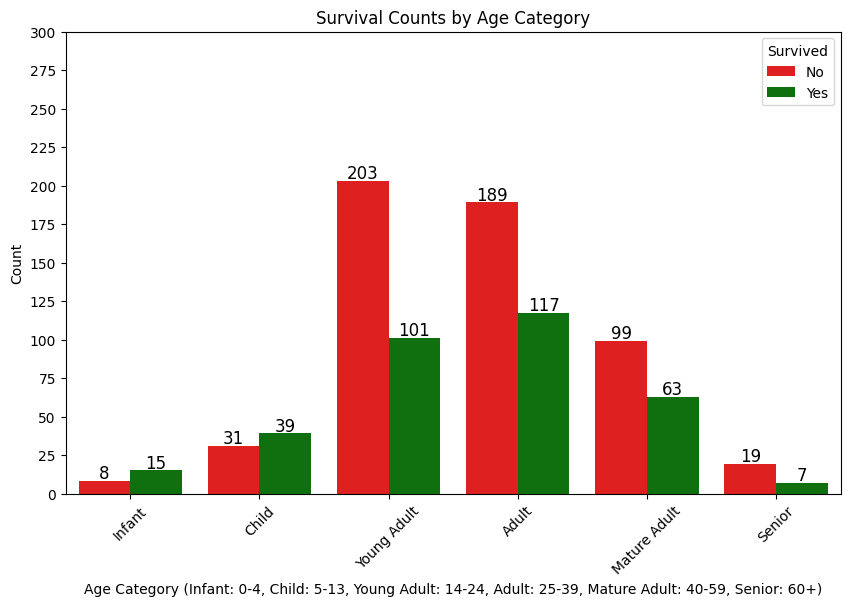

In [80]:
# Bar chart for 'Age_Cat' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age_Cat', hue='Survived', data=titanic_imputed, palette={0: 'red', 1: 'green'},
              order=['Infant', 'Child', 'Young Adult', 'Adult', 'Mature Adult', 'Senior'])

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 5,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="black", fontsize=12)

plt.title('Survival Counts by Age Category')
plt.xlabel('Age Category (Infant: 0-4, Child: 5-13, Young Adult: 14-24, Adult: 25-39, Mature Adult: 40-59, Senior: 60+)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,301,step=25))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

Concerning this age imputation process in retrospect, do think some fine tuning could take place.  I am comfortable with what I am seeing in the infant, child, mature adult, and senior categories, but noticed that the number of young adults compared to adults have surged considerably.  What was 206 and 274 previously has now become 304 and 306.  May need to make sure that <=18 and >18 criterion for median age estimation is being applied appropriately.

IV. Exploratory Classification Modeling

A1. Remove unnecessary variables from the training dataset.

In [81]:
# Columns to drop
columns_to_drop = ['PassengerId', 'Name', 'Surname', 'Ticket', 'TicketPrefix', 'TicketNumber', 'Cabin', 'Deck', 'FamilyID', 'SibSp', 'Parch']

# Drop the columns
titanic_cleaned = titanic_imputed.drop(columns=columns_to_drop, errors='ignore')

# Verify remaining columns
print("Remaining columns after dropping undesirable variables:")
print(titanic_cleaned.columns.tolist())

# Display the first few rows of the cleaned dataset
print("\nFirst 5 rows of the cleaned dataset:")
print(titanic_cleaned.head())

Remaining columns after dropping undesirable variables:
['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'Age_Cat']

First 5 rows of the cleaned dataset:
   Survived  Pclass     Sex   Age     Fare Embarked Title  FamilySize  \
0       0.0       3    male  22.0   7.2500        S    Mr           1   
1       1.0       1  female  38.0  71.2833        C   Mrs           1   
2       1.0       3  female  26.0   7.9250        S  Miss           0   
3       1.0       1  female  35.0  53.1000        S   Mrs           1   
4       0.0       3    male  35.0   8.0500        S    Mr           0   

       Age_Cat  
0  Young Adult  
1        Adult  
2        Adult  
3        Adult  
4        Adult  


A2. Group and encode necessary variable values.

In [82]:
# Define a function to group rare titles
def group_rare_titles(title):
    rare_titles = ['Dr', 'Rev', 'Major', 'Don', 'Col', 'Jonkheer', 'Lady', 'Dona', 'Countess', 'Sir', 'Mme', 'Ms', 'Mlle', 'Capt']
    if title in rare_titles:
        return 'Other'
    return title

# Apply the function to the Title column in the original titanic_cleaned DataFrame
titanic_cleaned['Title'] = titanic_cleaned['Title'].apply(group_rare_titles)

# Recheck the distribution of titles
print("Distribution of grouped titles:")
print(titanic_cleaned['Title'].value_counts())

Distribution of grouped titles:
Title
Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: count, dtype: int64


In [83]:
# Encode Sex (male=0, female=1)
titanic_cleaned['Sex'] = titanic_cleaned['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked, Title, and Age_Cat without dropping the first category
titanic_encoded = pd.get_dummies(titanic_cleaned, columns=['Embarked', 'Title', 'Age_Cat'], drop_first=False)

# Verify the encoded columns
print("\nColumns after encoding:")
print(titanic_encoded.columns.tolist())

# Check if Embarked_C is present
if 'Embarked_C' not in titanic_encoded.columns:
    print("Warning: Embarked_C is missing. This might be due to no variation or encoding issue.")

# Display the first few rows of the encoded dataset
print("\nFirst 5 rows of the encoded dataset:")
print(titanic_encoded.head())


Columns after encoding:
['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Age_Cat_Adult', 'Age_Cat_Child', 'Age_Cat_Infant', 'Age_Cat_Mature Adult', 'Age_Cat_Senior', 'Age_Cat_Young Adult']

First 5 rows of the encoded dataset:
   Survived  Pclass  Sex   Age     Fare  FamilySize  Embarked_C  Embarked_Q  \
0       0.0       3    0  22.0   7.2500           1       False       False   
1       1.0       1    1  38.0  71.2833           1        True       False   
2       1.0       3    1  26.0   7.9250           0       False       False   
3       1.0       1    1  35.0  53.1000           1       False       False   
4       0.0       3    0  35.0   8.0500           0       False       False   

   Embarked_S  Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Other  \
0        True         False       False      True      False        False   
1       False       

A3. Create train-test datasets and define features and target for training.

In [84]:
# Training dataset: Records where Survived is not missing
train_data = titanic_encoded[titanic_encoded['Survived'].notna()].copy()

# Testing dataset: Records where Survived is missing
test_data = titanic_encoded[titanic_encoded['Survived'].isna()].copy()

# Define features and target for training
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived'].astype(int)

# Features for testing
X_test = test_data.drop(columns=['Survived'])

# Ensure column consistency
missing_in_test = set(X_train.columns) - set(X_test.columns)
missing_in_train = set(X_test.columns) - set(X_train.columns)

for col in missing_in_test:
    X_test[col] = 0
for col in missing_in_train:
    X_train[col] = 0

X_test = X_test[X_train.columns]

# Verify shapes
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (891, 19)
Shape of y_train: (891,)
Shape of X_test: (418, 19)


In [85]:
# Define features (X_train) and target (y_train) for training
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived'].astype(int)  # Ensure Survived is integer (0 or 1)

# For the testing dataset, we only need features (X_test)
X_test = test_data.drop(columns=['Survived'])

# Verify shapes
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Check the distribution of Survived in the training set
print("\nDistribution of Survived in training set:")
print(y_train.value_counts(normalize=True))


Shape of X_train: (891, 19)
Shape of y_train: (891,)
Shape of X_test: (418, 19)

Distribution of Survived in training set:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


B1.  Create initial model with 19 features using the Random Forest Classifier. Generate confusion matrix, classification report, feature importance, and optimized parameters.

In [86]:
# Class weights
class_weights = {0: 1.0, 1: 1.6}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=135, max_depth=8, min_samples_split=8, class_weight=class_weights)

# Perform 5-fold cross-validation and get predictions
y_train_pred = cross_val_predict(rf_model, X_train, y_train, cv=5)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

# Optionally, retrain the model on the full training set for feature importance
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)  # Show top 10 features


Confusion Matrix:
[[482  67]
 [ 77 265]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       549
           1       0.80      0.77      0.79       342

    accuracy                           0.84       891
   macro avg       0.83      0.83      0.83       891
weighted avg       0.84      0.84      0.84       891


Feature Importance:
                 Feature  Importance
1                    Sex    0.190775
10              Title_Mr    0.173960
3                   Fare    0.146319
0                 Pclass    0.101993
2                    Age    0.096001
4             FamilySize    0.073585
11             Title_Mrs    0.058260
9             Title_Miss    0.053759
7             Embarked_S    0.014237
13         Age_Cat_Adult    0.013138
5             Embarked_C    0.011987
8           Title_Master    0.011258
6             Embarked_Q    0.010121
18   Age_Cat_Young Adult    0.009757
14         Age_Cat_Child    0.0

In [87]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Results (Training Set):")
print(f"Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")


Cross-Validation Results (Training Set):
Accuracy: 0.838 (+/- 0.051)
ROC-AUC: 0.866 (+/- 0.069)


In [133]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)


Random Forest Feature Importance:
                 Feature  Importance
1                    Sex    0.190775
10              Title_Mr    0.173960
3                   Fare    0.146319
0                 Pclass    0.101993
2                    Age    0.096001
4             FamilySize    0.073585
11             Title_Mrs    0.058260
9             Title_Miss    0.053759
7             Embarked_S    0.014237
13         Age_Cat_Adult    0.013138
5             Embarked_C    0.011987
8           Title_Master    0.011258
6             Embarked_Q    0.010121
18   Age_Cat_Young Adult    0.009757
14         Age_Cat_Child    0.009017
16  Age_Cat_Mature Adult    0.008675
15        Age_Cat_Infant    0.007314
12           Title_Other    0.005816
17        Age_Cat_Senior    0.004027


In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [135],
    'max_depth': [8],
    'min_samples_split': [8]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight=class_weights),
                           param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("\nBest parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)


Best parameters: {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 135}
Best F1-score: 0.7841926254791581


B2. Create model with 14 features (Title features removed) using the Random Forest Classifier. Generate confusion matrix, classification report, feature importance, and optimized parameters.

In [90]:
# Identify Title-related columns
title_columns = [col for col in X_train.columns if col.startswith('Title_')]

# Drop Title columns from X_train and X_test
X_train_no_title = X_train.drop(columns=title_columns)
X_test_no_title = X_test.drop(columns=title_columns)

# Verify remaining columns
print("\nColumns after dropping Title variables:")
print(X_train_no_title.columns.tolist())


Columns after dropping Title variables:
['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_Cat_Adult', 'Age_Cat_Child', 'Age_Cat_Infant', 'Age_Cat_Mature Adult', 'Age_Cat_Senior', 'Age_Cat_Young Adult']


In [91]:
# Initialize the model
rf_model_no_title = RandomForestClassifier(random_state=42, n_estimators=155,  max_depth=18, min_samples_split=8, class_weight=class_weights)

# Perform 5-fold cross-validation and get predictions
y_train_pred_no_title = cross_val_predict(rf_model_no_title, X_train_no_title, y_train, cv=5)

# Compute confusion matrix
conf_matrix_no_title = confusion_matrix(y_train, y_train_pred_no_title)

# Print confusion matrix
print("\nConfusion Matrix (without Title):")
print(conf_matrix_no_title)

# Print classification report
print("\nClassification Report (without Title):")
print(classification_report(y_train, y_train_pred_no_title))

# Retrain on full training set for feature importance
rf_model_no_title.fit(X_train_no_title, y_train)

# Feature importance
feature_importance_no_title = pd.DataFrame({
    'Feature': X_train_no_title.columns,
    'Importance': rf_model_no_title.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (without Title):")
print(feature_importance_no_title)


Confusion Matrix (without Title):
[[472  77]
 [ 77 265]]

Classification Report (without Title):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       549
           1       0.77      0.77      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891


Feature Importance (without Title):
                 Feature  Importance
1                    Sex    0.309556
3                   Fare    0.231851
2                    Age    0.149360
0                 Pclass    0.108094
4             FamilySize    0.082726
9          Age_Cat_Child    0.018323
7             Embarked_S    0.016943
5             Embarked_C    0.016264
8          Age_Cat_Adult    0.015629
13   Age_Cat_Young Adult    0.012949
10        Age_Cat_Infant    0.011856
11  Age_Cat_Mature Adult    0.011475
6             Embarked_Q    0.008501
12        Age_Cat_Se

In [92]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(rf_model, X_train_no_title, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(rf_model, X_train_no_title, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Results (Training Set):")
print(f"Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")


Cross-Validation Results (Training Set):
Accuracy: 0.819 (+/- 0.050)
ROC-AUC: 0.864 (+/- 0.060)


In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [155],
    'max_depth': [18],
    'min_samples_split': [8]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight=class_weights),
                           param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_no_title, y_train)
print("\nBest parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)


Best parameters: {'max_depth': 18, 'min_samples_split': 8, 'n_estimators': 155}
Best F1-score: 0.7732637070135309


B3. Create model with 8 features (Title and Age_Cat features removed) using the Random Forest Classifier. Generate confusion matrix, classification report, feature importance, and optimized parameters.

In [94]:
# Identify Age_Cat-related columns
age_cat_columns = [col for col in X_train_no_title.columns if col.startswith('Age_Cat_')]

# Drop Age_Cat columns from X_train and X_test
X_train_no_age_cat = X_train_no_title.drop(columns=age_cat_columns)
X_test_no_age_cat = X_test_no_title.drop(columns=age_cat_columns)

# Verify remaining columns
print("\nColumns after dropping Age_Cat variables:")
print(X_train_no_age_cat.columns.tolist())


Columns after dropping Age_Cat variables:
['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [95]:
# Initialize the model
rf_model_no_age_cat = RandomForestClassifier(random_state=42, n_estimators=145, max_depth=10, min_samples_split=5, class_weight=class_weights)

# Perform 5-fold cross-validation and get predictions
y_train_pred_no_age_cat = cross_val_predict(rf_model_no_age_cat, X_train_no_age_cat, y_train, cv=5)

# Compute confusion matrix
conf_matrix_no_age_cat = confusion_matrix(y_train, y_train_pred_no_age_cat)

# Print confusion matrix
print("\nConfusion Matrix (without Age_Cat):")
print(conf_matrix_no_age_cat)

# Print classification report
print("\nClassification Report (without Age_Cat):")
print(classification_report(y_train, y_train_pred_no_age_cat))

# Retrain on full training set for feature importance
rf_model_no_age_cat.fit(X_train_no_age_cat, y_train)

# Feature importance
feature_importance_no_age_cat = pd.DataFrame({
    'Feature': X_train_no_age_cat.columns,
    'Importance': rf_model_no_age_cat.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (without Age_Cat):")
print(feature_importance_no_age_cat)


Confusion Matrix (without Age_Cat):
[[478  71]
 [ 84 258]]

Classification Report (without Age_Cat):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       549
           1       0.78      0.75      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.83      0.83      0.83       891


Feature Importance (without Age_Cat):
      Feature  Importance
1         Sex    0.321490
3        Fare    0.234976
2         Age    0.211369
0      Pclass    0.101103
4  FamilySize    0.093550
5  Embarked_C    0.014845
7  Embarked_S    0.013753
6  Embarked_Q    0.008914


In [96]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(rf_model, X_train_no_age_cat, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(rf_model, X_train_no_age_cat, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Results (Training Set):")
print(f"Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")


Cross-Validation Results (Training Set):
Accuracy: 0.818 (+/- 0.057)
ROC-AUC: 0.872 (+/- 0.064)


In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [145],
    'max_depth': [10],
    'min_samples_split': [5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight=class_weights),
                           param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_no_age_cat, y_train)
print("\nBest parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 145}
Best F1-score: 0.7672966392436784


B4. Create model with 5 features (Title, Age_Cat, and Embarked features removed) using the Random Forest Classifier. Generate confusion matrix, classification report, feature importance, and optimized parameters.

In [98]:
# Identify Embarked-related columns
embarked_columns = [col for col in X_train_no_age_cat.columns if col.startswith('Embarked_')]

# Drop Embarked columns from X_train and X_test
X_train_no_embarked = X_train_no_age_cat.drop(columns=embarked_columns)
X_test_no_embarked = X_test_no_age_cat.drop(columns=embarked_columns)

# Verify remaining columns
print("\nColumns after dropping Embarked variables:")
print(X_train_no_embarked.columns.tolist())


Columns after dropping Embarked variables:
['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']


In [99]:
# Initialize the model
rf_model_no_embarked = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=11, min_samples_split=5, class_weight=class_weights)

# Perform 5-fold cross-validation and get predictions
y_train_pred_no_embarked = cross_val_predict(rf_model_no_embarked, X_train_no_embarked, y_train, cv=5)

# Compute confusion matrix
conf_matrix_no_embarked = confusion_matrix(y_train, y_train_pred_no_embarked)

# Print confusion matrix
print("\nConfusion Matrix (without Embarked):")
print(conf_matrix_no_embarked)

# Print classification report
print("\nClassification Report (without Embarked):")
print(classification_report(y_train, y_train_pred_no_embarked))

# Retrain on full training set for feature importance
rf_model_no_embarked.fit(X_train_no_embarked, y_train)

# Feature importance
feature_importance_no_embarked = pd.DataFrame({
    'Feature': X_train_no_embarked.columns,
    'Importance': rf_model_no_embarked.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (without Embarked):")
print(feature_importance_no_embarked)


Confusion Matrix (without Embarked):
[[479  70]
 [ 81 261]]

Classification Report (without Embarked):
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       549
           1       0.79      0.76      0.78       342

    accuracy                           0.83       891
   macro avg       0.82      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891


Feature Importance (without Embarked):
      Feature  Importance
1         Sex    0.320602
3        Fare    0.258746
2         Age    0.229290
0      Pclass    0.103783
4  FamilySize    0.087579


In [100]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(rf_model, X_train_no_embarked, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(rf_model, X_train_no_embarked, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Results (Training Set):")
print(f"Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")


Cross-Validation Results (Training Set):
Accuracy: 0.826 (+/- 0.049)
ROC-AUC: 0.870 (+/- 0.078)


In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200],
    'max_depth': [11],
    'min_samples_split': [5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight=class_weights),
                           param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_no_embarked, y_train)
print("\nBest parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)


Best parameters: {'max_depth': 11, 'min_samples_split': 5, 'n_estimators': 200}
Best F1-score: 0.7747123629518498


B5. Create model with 5 features (by RF Importance) using the Random Forest Classifier. Generate confusion matrix, classification report, feature importance, and optimized parameters.

In [102]:
# Initialize Random Forest for feature importance
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

# Get feature importances using Random Forest
feature_importances = rf_base.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Specify the number of top features to select (adjustable)
top_n = 5  # Change this to 10, 12, etc., or try 17 or all
top_features = importance_df['Feature'].head(top_n).values
top_feature_indices_rf = [list(feature_names).index(f) for f in top_features]

# Display the top features
print(f"\nTop {top_n} Features by Importance (Random Forest):")
print(importance_df.head(top_n))

# Create reduced datasets
X_train_rf = X_train.iloc[:, top_feature_indices_rf] if hasattr(X_train, 'columns') else X_train[:, top_feature_indices_rf]
X_train_rf_df = pd.DataFrame(X_train_rf, columns=top_features)

# Initialize Random Forest with default parameters (no GridSearchCV for now)
rf = RandomForestClassifier(random_state=42, n_estimators=135, max_depth=8, min_samples_split=4, class_weight=class_weights)

# We'll fit the model separately for submission later
y_pred = cross_val_predict(rf, X_train_rf, y_train, cv=5)

# Perform 5-fold cross-validation on the training set
cv_scores_rf = cross_val_score(rf_model, X_train_rf, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(rf_model, X_train_rf, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Results (Training Set):")
print(f"Accuracy: {cv_scores_rf.mean():.3f} (+/- {cv_scores_rf.std() * 2:.3f})")
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")

# Compute confusion matrix
conf_matrix_rf_opt = confusion_matrix(y_train, y_pred)

# Print confusion matrix
print("\nConfusion Matrix (Top #):")
print(conf_matrix_rf_opt)

# Print classification report
print("\nClassification Report (Top #):")
print(classification_report(y_train, y_pred))



Top 5 Features by Importance (Random Forest):
     Feature  Importance
3       Fare    0.252213
2        Age    0.172475
1        Sex    0.123941
10  Title_Mr    0.096549
0     Pclass    0.086130

Cross-Validation Results (Training Set):
Accuracy: 0.841 (+/- 0.048)
ROC-AUC: 0.868 (+/- 0.070)

Confusion Matrix (Top #):
[[484  65]
 [ 76 266]]

Classification Report (Top #):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       549
           1       0.80      0.78      0.79       342

    accuracy                           0.84       891
   macro avg       0.83      0.83      0.83       891
weighted avg       0.84      0.84      0.84       891



In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [135],
    'max_depth': [8],
    'min_samples_split': [4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight=class_weights),
                           param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_rf, y_train)
print("\nBest parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)


Best parameters: {'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 135}
Best F1-score: 0.7893031514215916


C1. Exploring Logistic Regression With Backward Elimination Feature Reduction

In [104]:
#Prepare the necessary data.
# Assuming X_train contains all features (e.g., ['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Title_Mr', 'Title_Mrs', ...])
print("Initial features in X_train:", X_train.columns.tolist())

# Display data types
print("\nData types in X_train:")
print(X_train.dtypes)

# Identify boolean columns
boolean_columns = X_train.select_dtypes(include=['bool']).columns
print("\nBoolean columns in X_train:", boolean_columns.tolist())

# Convert boolean columns to numeric (True -> 1, False -> 0)
X_train_clean = X_train.copy()
boolean_columns = X_train_clean.select_dtypes(include=['bool']).columns
for col in boolean_columns:
    X_train_clean[col] = X_train_clean[col].astype(int)

# Scale continuous features (Age, Fare, FamilySize)
scaler = StandardScaler()
continuous_features = ['Age', 'Fare', 'FamilySize']  # Adjust based on available features
continuous_features = [col for col in continuous_features if col in X_train_clean.columns]
X_train_clean[continuous_features] = scaler.fit_transform(X_train_clean[continuous_features])

# Add a constant term for statsmodels
X_train_with_const = sm.add_constant(X_train_clean)

# Verify preprocessing
print("\nData types after preprocessing:")
print(X_train_clean.dtypes)

Initial features in X_train: ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Age_Cat_Adult', 'Age_Cat_Child', 'Age_Cat_Infant', 'Age_Cat_Mature Adult', 'Age_Cat_Senior', 'Age_Cat_Young Adult']

Data types in X_train:
Pclass                     int8
Sex                       int64
Age                     float64
Fare                    float64
FamilySize                int64
Embarked_C                 bool
Embarked_Q                 bool
Embarked_S                 bool
Title_Master               bool
Title_Miss                 bool
Title_Mr                   bool
Title_Mrs                  bool
Title_Other                bool
Age_Cat_Adult              bool
Age_Cat_Child              bool
Age_Cat_Infant             bool
Age_Cat_Mature Adult       bool
Age_Cat_Senior             bool
Age_Cat_Young Adult        bool
dtype: object

Boolean columns in X_train: ['Embarked_C', 'Emba

Implemented Class Weights that were representative of the proportion of non-survivors to survivors to insure a balanced focus on each model's results.

In [105]:
# Create sample weights to simulate class weights
class_weights = {0: 1.0, 1: 1.6}
sample_weights = y_train.map(class_weights)

# Backward elimination with sample weights
selected_features = X_train_with_const.columns.tolist()
while len(selected_features) > 1:
    X_train_selected = X_train_with_const[selected_features]
    model = sm.Logit(y_train, X_train_selected)
    result = model.fit(method='bfgs', maxiter=1000, weights=sample_weights)  # Use bfgs solver for stability
    p_values = result.pvalues
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        remove_feature = p_values.idxmax()
        selected_features.remove(remove_feature)
        print(f"\nRemoving feature with highest p-value: {remove_feature} (p-value: {max_p_value:.4f})")
    else:
        break

print("\nFinal selected features after backward elimination with class weights:", selected_features)

Optimization terminated successfully.
         Current function value: 0.405067
         Iterations: 127
         Function evaluations: 128
         Gradient evaluations: 128

Final selected features after backward elimination with class weights: ['const', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Age_Cat_Adult', 'Age_Cat_Child', 'Age_Cat_Infant', 'Age_Cat_Mature Adult', 'Age_Cat_Senior', 'Age_Cat_Young Adult']


c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: weights. After release 0.14, this will raise.
  warnings.warn(
c:\Users\rcc_0\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Backward elimination did not recommend removing any features.  The HessianInversionWarning usually indicates that there is multicollinearity that needs to be addressed.

C2. Create initial Logistic Regression model with all 19 features. Generate confusion matrix and classification report.

In [106]:
# Prepare training data with selected features
X_train_final = X_train_clean[selected_features[1:]]  # Exclude 'const'

# Train Logistic Regression with class weights
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight=class_weights)
log_reg.fit(X_train_final, y_train)

# Cross-validation predictions
y_train_pred = cross_val_predict(log_reg, X_train_final, y_train, cv=5)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Logistic Regression with Class Weights and Scaling):")
print(conf_matrix)

print("\nClassification Report (Logistic Regression with Class Weights and Scaling):")
print(classification_report(y_train, y_train_pred))

# Cross-validation scores
cv_scores = cross_val_score(log_reg, X_train_final, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(log_reg, X_train_final, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores.mean(), cv_scores.std() * 2))
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")



Confusion Matrix (Logistic Regression with Class Weights and Scaling):
[[459  90]
 [ 76 266]]

Classification Report (Logistic Regression with Class Weights and Scaling):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       549
           1       0.75      0.78      0.76       342

    accuracy                           0.81       891
   macro avg       0.80      0.81      0.80       891
weighted avg       0.82      0.81      0.81       891


Cross-Validation Accuracy Scores: [0.79888268 0.80898876 0.8258427  0.80898876 0.8258427 ]
Mean CV Accuracy: 0.814 (+/- 0.021)
ROC-AUC: 0.868 (+/- 0.052)


C3. Create a correlation heatmap matrix with all 19 features, and identify potential features to be removed.

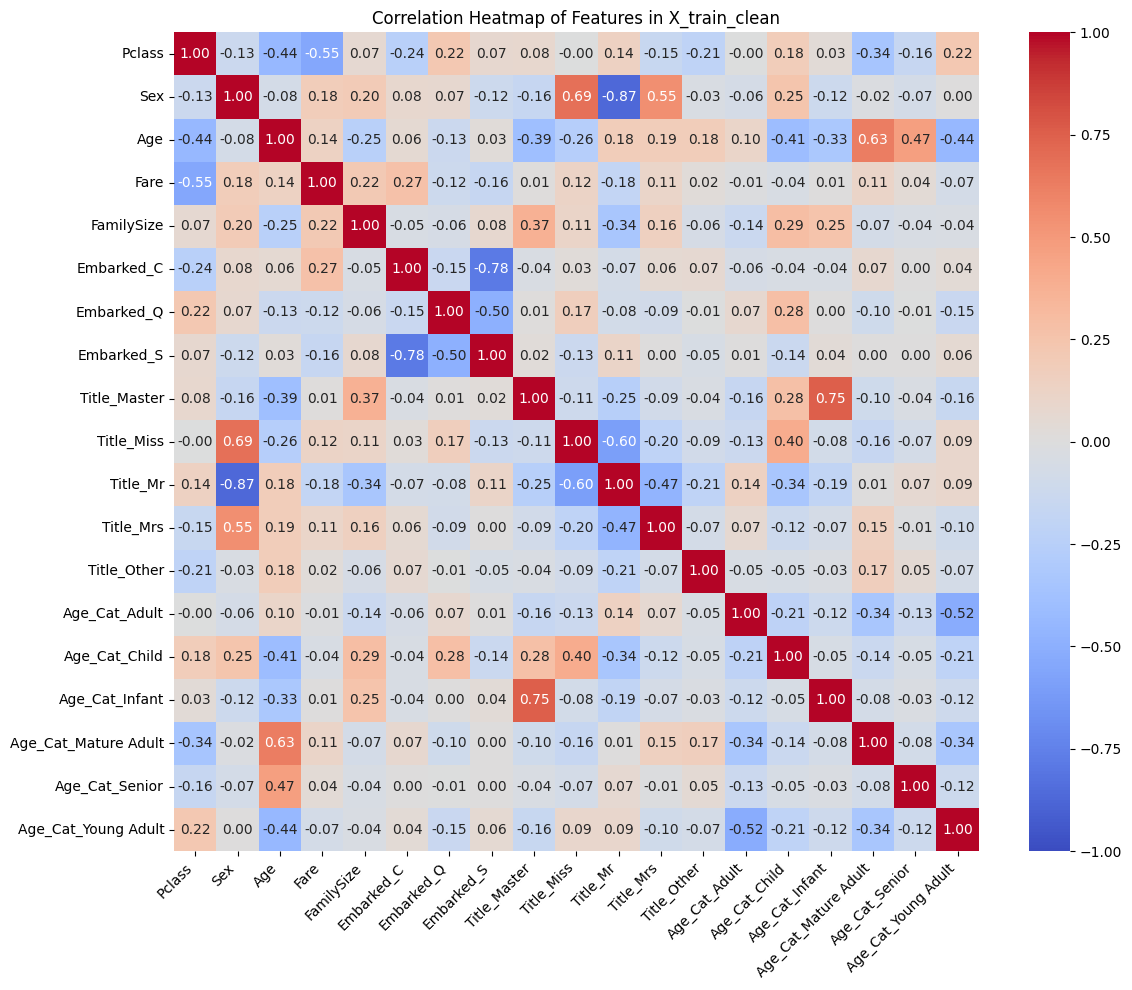


Highly Correlated Feature Pairs (|corr| > 0.7):
Sex and Title_Mr: -0.867
Embarked_C and Embarked_S: -0.783
Title_Master and Age_Cat_Infant: 0.751


In [107]:
# Ensure X_train_clean is the scaled dataset without the constant term
# Assuming X_train_clean is already scaled and contains all features
X_train_corr = X_train_clean.copy()

# Drop the target variable if accidentally included (e.g., 'Survived')
if 'Survived' in X_train_corr.columns:
    X_train_corr = X_train_corr.drop(columns=['Survived'])

# Calculate the correlation matrix
corr_matrix = X_train_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title("Correlation Heatmap of Features in X_train_clean")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optionally, print highly correlated pairs (|corr| > 0.7)
high_corr_pairs = np.where(np.abs(corr_matrix) > 0.7)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y])
                   for x, y in zip(*high_corr_pairs) if x != y and x < y]
print("\nHighly Correlated Feature Pairs (|corr| > 0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.3f}")

Through trial and error, the removal of Embarked_S and Age_Cat_Infant made the most sense.  Embarked_C with its 1st Class passengers is likely more predictive of survivors, and though Title_Master represents one sex, it also represents a larger age demographic than Age_Cat_Infant. Sex and Title_Mr seemed to depreciate the model quality with their absence.

C4. Create Logistic Regression model with L1 Regularization (Lasso) using 17 features (correlated features removed). Generate confusion matrix, classification report, utilized features, and optimize C.

In [108]:
# Reduce feature set based on heatmap
features_to_keep = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Title_Master',
                    'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Age_Cat_Adult', 'Age_Cat_Mature Adult',
                    'Age_Cat_Child', 'Age_Cat_Senior', 'Age_Cat_Young Adult']
X_train_reduced = X_train_clean[features_to_keep]

# L1 regularization (Lasso)
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight={0: 1.0, 1: 1.6},
                             penalty='l1', solver='liblinear', C=0.6)
log_reg.fit(X_train_reduced, y_train)

# Cross-validation predictions
y_train_pred = cross_val_predict(log_reg, X_train_reduced, y_train, cv=5)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Logistic Regression (Lasso) with Class Weights and Scaling):")
print(conf_matrix)
print("\nClassification Report (Logistic Regression with L1 Regularization):")
print(classification_report(y_train, y_train_pred))

# Cross-validation scores
cv_scores = cross_val_score(log_reg, X_train_reduced, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(log_reg, X_train_reduced, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores.mean(), cv_scores.std() * 2))
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")

# Check which coefficients were set to zero (feature selection)
print("\nCoefficients (Features with 0 are effectively dropped):")
for feature, coef in zip(features_to_keep, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Confusion Matrix (Logistic Regression (Lasso) with Class Weights and Scaling):
[[464  85]
 [ 73 269]]

Classification Report (Logistic Regression with L1 Regularization):
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       549
           1       0.76      0.79      0.77       342

    accuracy                           0.82       891
   macro avg       0.81      0.82      0.81       891
weighted avg       0.82      0.82      0.82       891


Cross-Validation Accuracy Scores: [0.82681564 0.80898876 0.8258427  0.81460674 0.83707865]
Mean CV Accuracy: 0.823 (+/- 0.020)
ROC-AUC: 0.871 (+/- 0.051)

Coefficients (Features with 0 are effectively dropped):
Pclass: -0.9457
Sex: 2.9503
Age: -0.2852
Fare: 0.1940
FamilySize: -0.6499
Embarked_C: 0.4187
Embarked_Q: 0.0000
Title_Master: 3.0529
Title_Miss: 0.0000
Title_Mr: -0.0457
Title_Mrs: 0.4787
Title_Other: 0.0000
Age_Cat_Adult: 0.3854
Age_Cat_Mature Adult: 0.0000
Age_Cat_Child: 0.0000
Age_Cat_

10 features were identified and used from the 17 features made available: Pclass, Sex, Age, Fare, FamilySize, Embarked_C, Title_Master, Title_Mr, Title_Mrs, Age_Cat_Adult
C was optimized to 0.6

C5. Create Logistic Regression model with L2 Regularization (Ridge) using 17 features (correlated features removed). Generate confusion matrix, classification report, and optimize C.

In [109]:
log_reg_l2 = LogisticRegression(random_state=42, max_iter=1000, class_weight={0: 1.0, 1: 1.6},
                                penalty='l2', solver='lbfgs', C=0.7)
log_reg_l2.fit(X_train_reduced, y_train)

# Cross-validation predictions
y_train_pred = cross_val_predict(log_reg, X_train_reduced, y_train, cv=5)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Logistic Regression (Ridge) with Class Weights and Scaling):")
print(conf_matrix)
print("\nClassification Report (Logistic Regression with L2 Regularization):")
print(classification_report(y_train, y_train_pred))

# Cross-validation scores
cv_scores_l2 = cross_val_score(log_reg_l2, X_train_reduced, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(log_reg_l2, X_train_reduced, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Accuracy Scores:", cv_scores_l2)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores_l2.mean(), cv_scores_l2.std() * 2))
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")


Confusion Matrix (Logistic Regression (Ridge) with Class Weights and Scaling):
[[464  85]
 [ 73 269]]

Classification Report (Logistic Regression with L2 Regularization):
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       549
           1       0.76      0.79      0.77       342

    accuracy                           0.82       891
   macro avg       0.81      0.82      0.81       891
weighted avg       0.82      0.82      0.82       891


Cross-Validation Accuracy Scores: [0.81005587 0.81460674 0.8258427  0.81460674 0.8258427 ]
Mean CV Accuracy: 0.818 (+/- 0.013)
ROC-AUC: 0.868 (+/- 0.050)


C was optimized to 0.7

C6. Create Logistic Regression model with porportional regularization (ElasticNet) using 17 features (correlated features removed). Generate confusion matrix, classification report, and optimize l1-ratio and C.

In [110]:
# Feature set (same as used previously)
features_to_keep = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q',
                    'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
                    'Age_Cat_Adult', 'Age_Cat_Mature Adult', 'Age_Cat_Child', 'Age_Cat_Senior', 'Age_Cat_Young Adult']
X_train_reduced = X_train_clean[features_to_keep]

# Elastic Net regularization (C=0.6, l1_ratio=1.0)
log_reg_en = LogisticRegression(random_state=42, max_iter=1000, class_weight={0: 1.0, 1: 1.6},
                                penalty='elasticnet', solver='saga', l1_ratio=1.0, C=0.6)
log_reg_en.fit(X_train_reduced, y_train)

# Cross-validation predictions
y_train_pred = cross_val_predict(log_reg_en, X_train_reduced, y_train, cv=5)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Logistic Regression with Class Weights and Scaling):")
print(conf_matrix)
print("\nClassification Report (Elastic Net, l1_ratio=1.0):")
print(classification_report(y_train, y_train_pred))

# Cross-validation scores
cv_scores_en = cross_val_score(log_reg_en, X_train_reduced, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(log_reg_en, X_train_reduced, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Accuracy Scores:", cv_scores_en)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores_en.mean(), cv_scores_en.std() * 2))
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")

# Check coefficients
print("\nCoefficients (Elastic Net):")
for feature, coef in zip(features_to_keep, log_reg_en.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Confusion Matrix (Logistic Regression with Class Weights and Scaling):
[[461  88]
 [ 73 269]]

Classification Report (Elastic Net, l1_ratio=1.0):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       549
           1       0.75      0.79      0.77       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891


Cross-Validation Accuracy Scores: [0.82122905 0.80898876 0.8258427  0.81460674 0.8258427 ]
Mean CV Accuracy: 0.819 (+/- 0.013)
ROC-AUC: 0.869 (+/- 0.049)

Coefficients (Elastic Net):
Pclass: -1.0078
Sex: 2.5642
Age: -0.3143
Fare: 0.1719
FamilySize: -0.6441
Embarked_C: 0.3872
Embarked_Q: 0.0000
Title_Master: 2.6085
Title_Miss: 0.0000
Title_Mr: -0.4012
Title_Mrs: 0.5323
Title_Other: 0.0000
Age_Cat_Adult: 0.3259
Age_Cat_Mature Adult: -0.0926
Age_Cat_Child: 0.0000
Age_Cat_Senior: 0.0000
Age_Cat_Young Adult: -0.0275


12 features were identified and used from the 17 features made available: Pclass, Sex, Age, Fare, FamilySize, Embarked_C, Title_Master, Title_Mr, Title_Mrs, Age_Cat_Adult, Age_Cat_Mature Adult, Age_Cat_Young Adult
l1_ratio was optimized to 1.0, indicating full L1 regularization, and C was optimized 0.6, same as Lasso.  Results differed because Lasso used the 'liblinear' solver and ElasticNet used the 'saga' solver. 

D1. Create a Linear SVM model from L1 Regularization (Lasso) reduction 10 features. Generate confusion matrix, classification report, and optimize C.

In [111]:
# Linear SVM model features from L1 Regularization (Lasso) reduction. 
final_features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_C',
                  'Title_Master', 'Title_Mr', 'Title_Mrs', 'Age_Cat_Adult']
X_train_final = X_train_clean[final_features]
# X_test_final = X_test_clean[final_features]

In [112]:
# Linear SVM with class weights
svm_linear = SVC(kernel='linear', class_weight={0: 1.0, 1: 1.6}, random_state=42, probability=True, C=2.0)
svm_linear.fit(X_train_final, y_train)

# Cross-validation predictions
y_train_pred = cross_val_predict(svm_linear, X_train_final, y_train, cv=5)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Linear SVM with Class Weights and Scaling):")
print(conf_matrix)
print("\nClassification Report (Linear SVM, C=2.0):")
print(classification_report(y_train, y_train_pred))

# Cross-validation scores
cv_scores_linear = cross_val_score(svm_linear, X_train_final, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(svm_linear, X_train_final, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Accuracy Scores:", cv_scores_linear)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores_linear.mean(), cv_scores_linear.std() * 2))
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")


Confusion Matrix (Linear SVM with Class Weights and Scaling):
[[470  79]
 [ 87 255]]

Classification Report (Linear SVM, C=2.0):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       549
           1       0.76      0.75      0.75       342

    accuracy                           0.81       891
   macro avg       0.80      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891


Cross-Validation Accuracy Scores: [0.81564246 0.82022472 0.80337079 0.78651685 0.84269663]
Mean CV Accuracy: 0.814 (+/- 0.037)
ROC-AUC: 0.859 (+/- 0.068)


C was optimized to 2.0 

D2. Create a RBF SVM model from L1 Regularization (Lasso) reduction 10 features. Generate confusion matrix, classification report, and optimize C and gamma.

In [113]:
# RBF SVM with class weights
svm_rbf = SVC(kernel='rbf', class_weight={0: 1.0, 1: 1.6}, random_state=42, probability=True, C=2.3, gamma='scale')
svm_rbf.fit(X_train_final, y_train)

# Cross-validation predictions
y_train_pred_rbf = cross_val_predict(svm_rbf, X_train_final, y_train, cv=5)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (RBF SVM with Class Weights and Scaling):")
print(conf_matrix)
print("\nClassification Report (RBF SVM, C=2.3, gamma='scale'):")
print(classification_report(y_train, y_train_pred_rbf))

# Cross-validation scores
cv_scores_rbf = cross_val_score(svm_rbf, X_train_final, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(svm_rbf, X_train_final, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Accuracy Scores:", cv_scores_rbf)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores_rbf.mean(), cv_scores_rbf.std() * 2))
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")


Confusion Matrix (RBF SVM with Class Weights and Scaling):
[[470  79]
 [ 87 255]]

Classification Report (RBF SVM, C=2.3, gamma='scale'):
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       549
           1       0.77      0.77      0.77       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891


Cross-Validation Accuracy Scores: [0.82681564 0.82022472 0.83707865 0.78651685 0.84269663]
Mean CV Accuracy: 0.823 (+/- 0.039)
ROC-AUC: 0.854 (+/- 0.064)


In [114]:
# Define parameter grid
param_grid = {
    'C': [2.2, 2.3, 2.4],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1.0]
}

# Grid search for RBF SVM
svm_rbf_grid = SVC(kernel='rbf', class_weight={0: 1.0, 1: 1.6}, random_state=42, probability=True)
grid_search = GridSearchCV(svm_rbf_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_final, y_train)

# Best parameters and performance
print("\nBest Parameters (RBF SVM):", grid_search.best_params_)
print("Best Mean CV Accuracy (RBF SVM): {:.3f}".format(grid_search.best_score_))

# Evaluate best model
best_svm = grid_search.best_estimator_
y_train_pred_best = cross_val_predict(best_svm, X_train_final, y_train, cv=5)
print("\nClassification Report (Tuned RBF SVM):")
print(classification_report(y_train, y_train_pred_best))


Best Parameters (RBF SVM): {'C': 2.3, 'gamma': 'scale'}
Best Mean CV Accuracy (RBF SVM): 0.823

Classification Report (Tuned RBF SVM):
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       549
           1       0.77      0.77      0.77       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



C was optimized at 2.3, and gamma was optimized at 'scale'.

D3. Use SHAP feature importance with all 19 features to find an optimal feature set. Create a RBF SVM model from those features. Generate confusion matrix, classification report, and optimize C and gamma.

In [115]:
# Step 1: Verify shapes to catch potential mismatches
print(f"X_train_clean shape: {X_train_clean.shape}")
print(f"y_train shape: {y_train.shape}")

# Ensure shapes match
if X_train_clean.shape[0] != y_train.shape[0]:
    raise ValueError(f"Shape mismatch: X_train_clean has {X_train_clean.shape[0]} samples, but y_train has {y_train.shape[0]} samples")

# Step 2: Ensure X_train_clean is a DataFrame
if not isinstance(X_train_clean, pd.DataFrame):
    X_train_clean = pd.DataFrame(X_train_clean, columns=[f'Feature_{i}' for i in range(X_train_clean.shape[1])])

# Step 3: Check for non-numeric data and NaNs
non_numeric_cols = X_train_clean.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    raise ValueError(f"Non-numeric columns found in X_train_clean: {non_numeric_cols}")

if X_train_clean.isna().sum().sum() > 0:
    print("NaNs found in X_train_clean. Imputing with mean...")
    X_train_clean = X_train_clean.fillna(X_train_clean.mean())

# Verify the number of features in X_train_clean
print(f"Number of features in X_train_clean: {X_train_clean.shape[1]}")  # Should be 19

# Get feature names
feature_names = X_train_clean.columns.tolist()

# Step 4: Train Random Forest for SHAP
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_clean, y_train)

# Compute SHAP values and debug shape
explainer = shap.TreeExplainer(rf_base)
shap_values = explainer.shap_values(X_train_clean)

# Debug: Check the type and structure of shap_values
print("Type of shap_values:", type(shap_values))
if isinstance(shap_values, list):
    print(f"Number of elements in shap_values list: {len(shap_values)}")
    print(f"shap_values[0] shape: {np.array(shap_values[0]).shape}")  # Should be (891, 19)
    print(f"shap_values[1] shape: {np.array(shap_values[1]).shape}")  # Should be (891, 19)
else:
    print(f"shap_values shape: {np.array(shap_values).shape}")  # Should be (2, 891, 19) or (891, 19, 2)

# Calculate mean absolute SHAP values for the positive class (Survived)
# Handle both cases: shap_values as a list or as a 3D array
if isinstance(shap_values, list):
    # Case 1: shap_values is a list of arrays (binary classification)
    shap_values_pos = shap_values[1]  # SHAP values for class 1 (Survived)
else:
    # Case 2: shap_values is a 3D array (samples, features, classes)
    # If shape is (891, 19, 2), select the last dimension for class 1
    shap_values_pos = shap_values[:, :, 1]  # Should be (891, 19)

# Verify the shape of shap_values_pos
print(f"shap_values_pos shape: {shap_values_pos.shape}")  # Should be (891, 19)

# Compute mean absolute SHAP values across samples (axis=0)
shap_importance = np.abs(shap_values_pos).mean(axis=0)
print(f"shap_importance shape: {shap_importance.shape}")  # Should be (19,)
if len(shap_importance) != len(feature_names):
    raise ValueError(f"Mismatch: shap_importance has {len(shap_importance)} elements, but feature_names has {len(feature_names)} elements")

shap_importance_df = pd.DataFrame({'Feature': feature_names, 'SHAP Importance': shap_importance})
shap_importance_df = shap_importance_df.sort_values(by='SHAP Importance', ascending=False)

# Display the full feature importance list
print(f"\nFeature Importance by SHAP (All {X_train_clean.shape[1]} Features):")
print(shap_importance_df)

# Step 5: Select top features
top_n = 17  # Adjustable
top_features = shap_importance_df['Feature'].head(top_n).values

print(f"\nTop {top_n} Features by SHAP Importance for RBF SVM:")
print(shap_importance_df.head(top_n))

# Create reduced dataset
X_train_svm_df = X_train_clean[top_features]

# Step 6: Evaluate RBF SVM
svm_rbf = SVC(kernel='rbf', class_weight={0: 1.0, 1: 1.6}, random_state=42, probability=True, C=2.4, gamma='auto')
svm_rbf.fit(X_train_svm_df, y_train)

# Cross-validation predictions
y_train_pred_rbf = cross_val_predict(svm_rbf, X_train_svm_df, y_train, cv=5)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_train_pred_rbf)
print("\nConfusion Matrix (RBF SVM with Class Weights and SHAP Feature Selection):")
print(conf_matrix)
print("\nClassification Report (RBF SVM, C=2.4, gamma='auto'):")
print(classification_report(y_train, y_train_pred_rbf))

# Cross-validation scores
cv_scores_rbf = cross_val_score(svm_rbf, X_train_svm_df, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(svm_rbf, X_train_svm_df, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Accuracy Scores:", cv_scores_rbf)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores_rbf.mean(), cv_scores_rbf.std() * 2))
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")

# Fit the model on the full training set
#svm_rbf.fit(X_train_svm_df, y_train)

X_train_clean shape: (891, 19)
y_train shape: (891,)
Number of features in X_train_clean: 19
Type of shap_values: <class 'numpy.ndarray'>
shap_values shape: (891, 19, 2)
shap_values_pos shape: (891, 19)
shap_importance shape: (19,)

Feature Importance by SHAP (All 19 Features):
                 Feature  SHAP Importance
1                    Sex         0.103939
10              Title_Mr         0.082457
0                 Pclass         0.079975
3                   Fare         0.064846
2                    Age         0.039795
11             Title_Mrs         0.032820
4             FamilySize         0.031289
9             Title_Miss         0.030077
7             Embarked_S         0.017285
5             Embarked_C         0.013930
13         Age_Cat_Adult         0.013491
18   Age_Cat_Young Adult         0.009890
8           Title_Master         0.008604
16  Age_Cat_Mature Adult         0.007632
6             Embarked_Q         0.005871
14         Age_Cat_Child         0.004868
15     

After evaluating all feature group sizes, the top 17 SHAP features performed the best, excluding Age_Cat_Infant and Age_Cat_Child.

In [116]:
# Define parameter grid
param_grid = {
    'C': [2.3, 2.4, 2.5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1.0]
}

# Grid search for RBF SVM
svm_rbf_grid = SVC(kernel='rbf', class_weight={0: 1.0, 1: 1.6}, random_state=42, probability=True)
grid_search = GridSearchCV(svm_rbf_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_svm_df, y_train)

# Best parameters and performance
print("\nBest Parameters (RBF SVM):", grid_search.best_params_)
print("Best Mean CV Accuracy (RBF SVM): {:.3f}".format(grid_search.best_score_))

# Evaluate best model
best_svm = grid_search.best_estimator_
y_train_pred_best = cross_val_predict(best_svm, X_train_svm_df, y_train, cv=5)
print("\nClassification Report (Tuned RBF SVM):")
print(classification_report(y_train, y_train_pred_best))


Best Parameters (RBF SVM): {'C': 2.4, 'gamma': 'auto'}
Best Mean CV Accuracy (RBF SVM): 0.827

Classification Report (Tuned RBF SVM):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       549
           1       0.79      0.75      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



C was optimized at 2.4, and gamma was optimized at 'auto'.

E. Use XGBoost feature importance with 17 features (correlated features removed) to find an optimal feature set. Create a XGBoost model from those features. Generate confusion matrix, classification report, and optimize all potentially relevant hyperparameters.


XGBoost Permutation Feature Importance (17 features):
                 Feature  Importance       Std
9             Title_Miss    0.094164  0.005755
1                    Sex    0.076431  0.005275
0                 Pclass    0.071942  0.007452
2                    Age    0.055331  0.006128
3                   Fare    0.049495  0.007959
4             Embarked_C    0.040404  0.004318
11           Title_Other    0.008530  0.000898
12         Age_Cat_Adult    0.004489  0.003367
8              Title_Mrs    0.004265  0.001931
16        Age_Cat_Senior    0.003030  0.002357
5             Embarked_Q    0.003030  0.003055
13   Age_Cat_Young_Adult    0.001347  0.001571
14  Age_Cat_Mature_Adult    0.001122  0.001587
10          Title_Master    0.000561  0.000753
15         Age_Cat_Child    0.000224  0.000449
6             FamilySize   -0.000112  0.001908
7               Title_Mr   -0.000224  0.000673


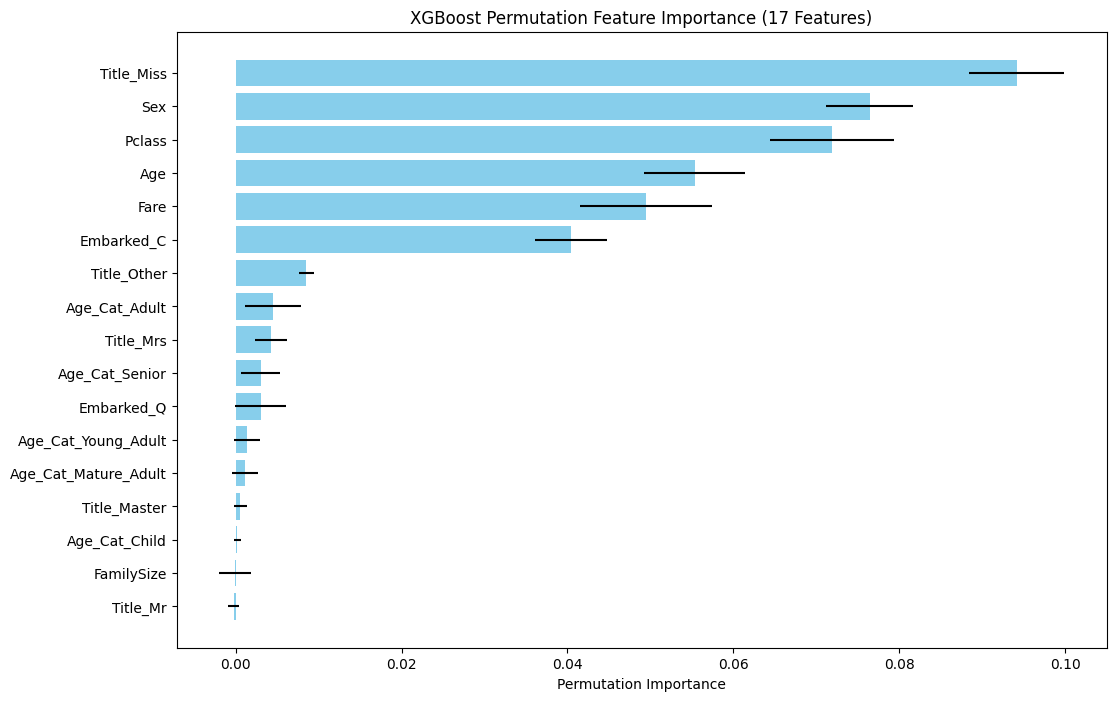


XGBoost Feature Importances (17 features):
                 Feature  Importance
1                    Sex    0.275807
9             Title_Miss    0.219355
7               Title_Mr    0.094512
11           Title_Other    0.068770
0                 Pclass    0.056463
4             Embarked_C    0.051230
3                   Fare    0.029573
14  Age_Cat_Mature_Adult    0.029109
15         Age_Cat_Child    0.027400
2                    Age    0.026226
12         Age_Cat_Adult    0.024870
5             Embarked_Q    0.022167
6             FamilySize    0.018061
16        Age_Cat_Senior    0.016090
13   Age_Cat_Young_Adult    0.014734
8              Title_Mrs    0.014564
10          Title_Master    0.011069

Top 15 XGBoost features: ['Sex', 'Title_Miss', 'Title_Mr', 'Title_Other', 'Pclass', 'Embarked_C', 'Fare', 'Age_Cat_Mature_Adult', 'Age_Cat_Child', 'Age', 'Age_Cat_Adult', 'Embarked_Q', 'FamilySize', 'Age_Cat_Senior', 'Age_Cat_Young_Adult']
X_train_xgb_reduced shape: (891, 15)


In [117]:
# Define the 17 features
reduced_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q',
                   'FamilySize', 'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_Other',
                   'Age_Cat_Adult', 'Age_Cat_Young_Adult', 'Age_Cat_Mature_Adult', 'Age_Cat_Child', 'Age_Cat_Senior']

# Initialize XGBoost with optimized parameters
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    max_depth=4,
    learning_rate=0.2,
    n_estimators=50,
    min_child_weight=3,
    reg_alpha=0.01,
    reg_lambda=0,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

# Fit with sample weights
sample_weights = np.array([1.0 if y == 0 else 1.6 for y in y_train])  # Custom weights
xgb.fit(X_train_reduced, y_train, sample_weight=sample_weights)

# After fitting gb.fit(X_train_reduced, y_train, sample_weight=sample_weights) in the Gradient Boosting code
perm_importance_xgb = permutation_importance(xgb, X_train_reduced, y_train, n_repeats=10, random_state=42, n_jobs=-1)
perm_importance_df_xgb = pd.DataFrame({
    'Feature': reduced_features,
    'Importance': perm_importance_xgb.importances_mean,
    'Std': perm_importance_xgb.importances_std
}).sort_values(by='Importance', ascending=False)
print("\nXGBoost Permutation Feature Importance (17 features):")
print(perm_importance_df_xgb)
plt.figure(figsize=(12, 8))
plt.barh(perm_importance_df_xgb['Feature'], perm_importance_df_xgb['Importance'], xerr=perm_importance_df_xgb['Std'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('XGBoost Permutation Feature Importance (17 Features)')
plt.gca().invert_yaxis()
plt.show()

# Extract feature importances
xgb_importances = pd.DataFrame({
    'Feature': reduced_features,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importances (17 features):")
print(xgb_importances)

# Select top unique features (15 yielded best results)
top_xgb_features = xgb_importances.nlargest(15, 'Importance')['Feature'].unique().tolist()
print(f"\nTop 15 XGBoost features: {top_xgb_features}")

# Create reduced dataset using iloc for DataFrame
top_xgb_indices = [reduced_features.index(f) for f in top_xgb_features]
X_train_xgb_reduced = X_train_reduced.iloc[:, top_xgb_indices].to_numpy()  # Use iloc and convert to NumPy
# X_test_xgb_reduced = X_test_reduced.iloc[:, top_xgb_indices].to_numpy()    # Use iloc and convert to NumPy

print(f"X_train_xgb_reduced shape: {X_train_xgb_reduced.shape}")
# print(f"X_test_xgb_reduced shape: {X_test_xgb_reduced.shape}")

After evaluating all feature group sizes, the top 15 XGBoost importance features performed the best, excluding Title_Mrs and Title_Master.

In [118]:
# Initial XGBoost model with class weighting
xgb_model = XGBClassifier(
    scale_pos_weight=1.6,  # Matches class_weight={0: 1.0, 1: 1.6}
    random_state=42,
    eval_metric='logloss',
    max_depth=4,
    learning_rate=0.2,
    n_estimators=50,
    min_child_weight=3,
    reg_alpha=0.01,
    reg_lambda=0,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_model.fit(X_train_xgb_reduced, y_train)

# Cross-validation scores
cv_scores_xgb = cross_val_score(xgb_model, X_train_xgb_reduced, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(xgb_model, X_train_xgb_reduced, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Accuracy Scores:", cv_scores_xgb)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores_xgb.mean(), cv_scores_xgb.std() * 2))
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")

# Cross-validation predictions
y_train_pred_xgb = cross_val_predict(xgb_model, X_train_xgb_reduced, y_train, cv=5)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_train_pred_xgb)
print("\nConfusion Matrix (XGBoost Classifier with Class Weights and Scaling):")
print(conf_matrix)
print("\nClassification Report (XGBoost):")
print(classification_report(y_train, y_train_pred_xgb))


Cross-Validation Accuracy Scores: [0.84357542 0.83707865 0.85393258 0.83146067 0.85393258]
Mean CV Accuracy: 0.844 (+/- 0.018)
ROC-AUC: 0.866 (+/- 0.056)

Confusion Matrix (XGBoost Classifier with Class Weights and Scaling):
[[479  70]
 [ 69 273]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       549
           1       0.80      0.80      0.80       342

    accuracy                           0.84       891
   macro avg       0.84      0.84      0.84       891
weighted avg       0.84      0.84      0.84       891



In [119]:
# Define parameter grid
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.2],
    'n_estimators': [50],
    'min_child_weight': [3],
    'reg_alpha': [0.01],
    'reg_lambda': [0],
    'gamma': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Initialize XGBoost model with class weighting
xgb_model = XGBClassifier(
    scale_pos_weight=1.6,  # Matches class_weight={0: 1.0, 1: 1.6}
    random_state=42,
    eval_metric='logloss'
)

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train_xgb_reduced, y_train)

# Best parameters and performance
print("\nBest Parameters:", grid_search.best_params_)
print(f"Best Mean CV Accuracy: {grid_search.best_score_:.3f}")

# Evaluate best model
best_xgb = grid_search.best_estimator_
y_train_pred_best = cross_val_predict(best_xgb, X_train_xgb_reduced, y_train, cv=5)
print("\nClassification Report (Optimized XGBoost):")
print(classification_report(y_train, y_train_pred_best))

# Cross-validation scores for the best model
cv_scores_best = cross_val_score(best_xgb, X_train_xgb_reduced, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores (Optimized XGBoost): {cv_scores_best}")
print(f"Mean CV Accuracy (Optimized XGBoost): {cv_scores_best.mean():.3f} (+/- {cv_scores_best.std() * 2:.3f})")

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50, 'reg_alpha': 0.01, 'reg_lambda': 0, 'subsample': 0.8}
Best Mean CV Accuracy: 0.829

Classification Report (Optimized XGBoost):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       549
           1       0.80      0.80      0.80       342

    accuracy                           0.84       891
   macro avg       0.84      0.84      0.84       891
weighted avg       0.84      0.84      0.84       891


Cross-Validation Accuracy Scores (Optimized XGBoost): [0.84357542 0.83707865 0.85393258 0.83146067 0.85393258]
Mean CV Accuracy (Optimized XGBoost): 0.844 (+/- 0.018)


XGBoost hyperparameters were optimized.

F. Use GradientBoosting feature importance with 17 features (correlated features removed) to find an optimal feature set. Create a GradientBoosting model from those features. Generate confusion matrix, classification report, and optimize all potentially relevant hyperparameters.


Gradient Boosting Permutation Feature Importance (17 features):
                 Feature  Importance       Std
9             Title_Miss    0.111111  0.006602
1                    Sex    0.046914  0.004964
0                 Pclass    0.046689  0.004846
4             Embarked_C    0.045342  0.002935
3                   Fare    0.033446  0.007322
2                    Age    0.023120  0.003222
11           Title_Other    0.010101  0.000869
5             Embarked_Q    0.002245  0.001587
13   Age_Cat_Young_Adult    0.002245  0.002188
16        Age_Cat_Senior    0.001235  0.001275
10          Title_Master    0.000449  0.000744
7               Title_Mr    0.000224  0.000978
14  Age_Cat_Mature_Adult    0.000000  0.000000
15         Age_Cat_Child    0.000000  0.000000
8              Title_Mrs    0.000000  0.000000
6             FamilySize   -0.000112  0.000337
12         Age_Cat_Adult   -0.000561  0.002668


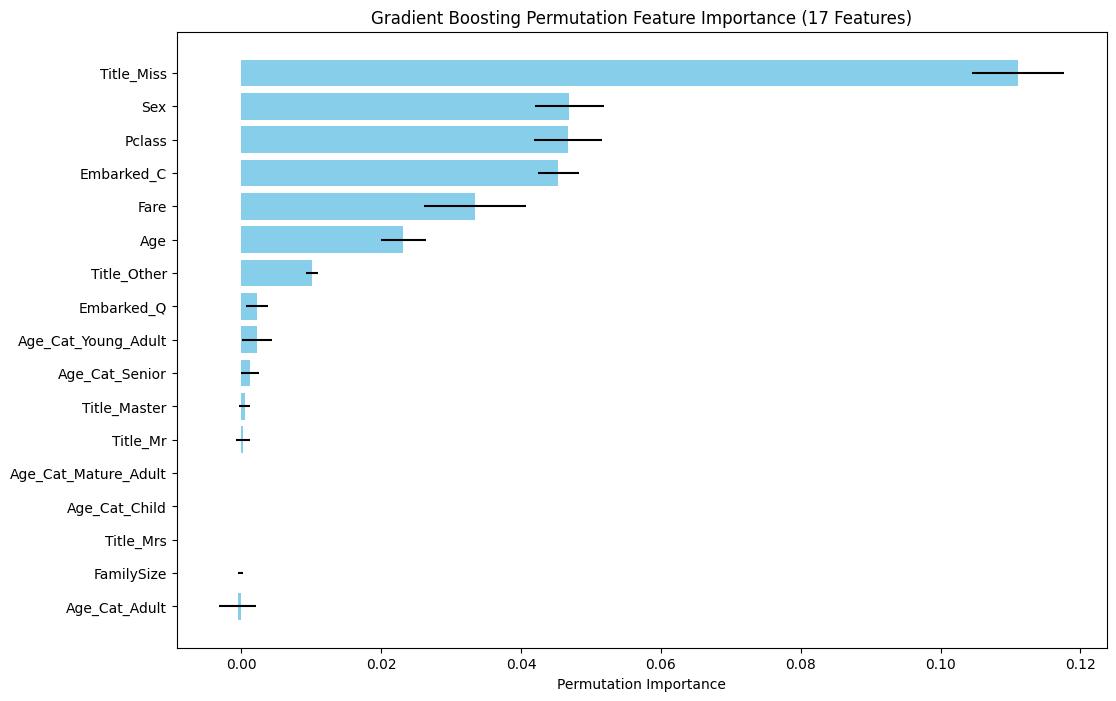

Cross-Validated Training Accuracy (17 features): 0.840

Cross-Validated Training Classification Report (17 features):
              precision    recall  f1-score   support

Not Survived       0.85      0.89      0.87       549
    Survived       0.82      0.75      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891


Gradient Boosting Feature Importance (All 17 features):
                 Feature  Importance
9             Title_Miss    0.325720
1                    Sex    0.171302
3                   Fare    0.168732
4             Embarked_C    0.099521
0                 Pclass    0.098934
2                    Age    0.077405
11           Title_Other    0.015908
12         Age_Cat_Adult    0.009340
7               Title_Mr    0.008777
5             Embarked_Q    0.007922
13   Age_Cat_Young_Adult    0.007160
16        Age_Cat_Senior    0.003364
6             Fam

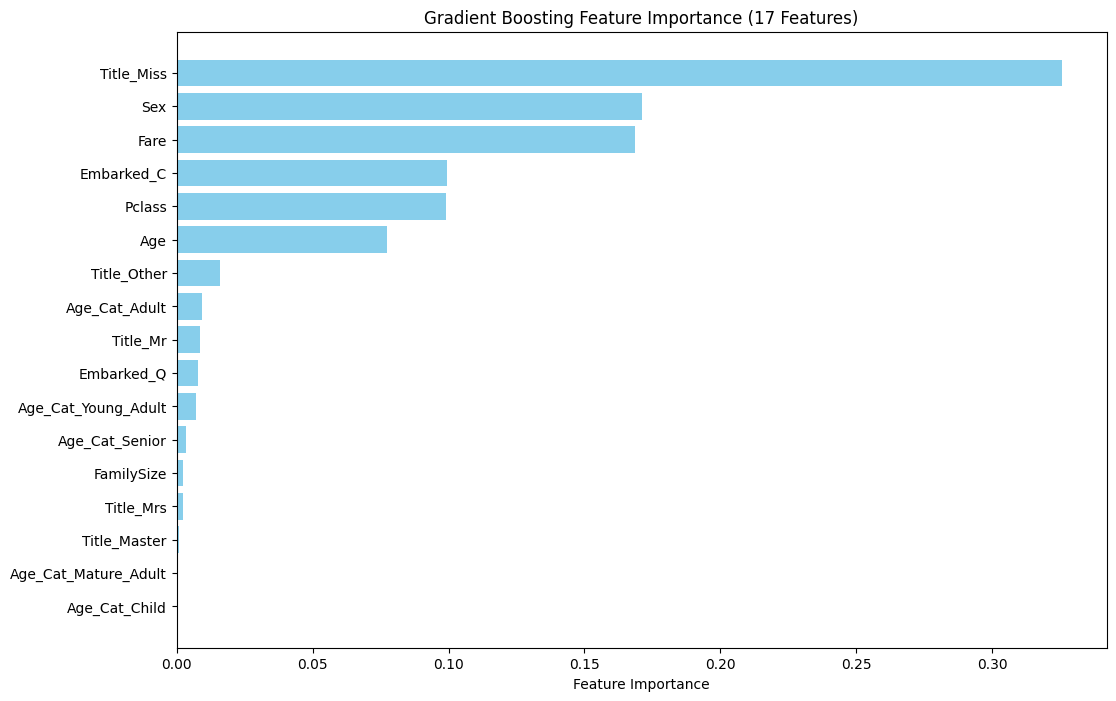


Top 17 Features from Gradient Boosting:
1. Title_Miss
2. Sex
3. Fare
4. Embarked_C
5. Pclass
6. Age
7. Title_Other
8. Age_Cat_Adult
9. Title_Mr
10. Embarked_Q
11. Age_Cat_Young_Adult
12. Age_Cat_Senior
13. FamilySize
14. Title_Mrs
15. Title_Master
16. Age_Cat_Mature_Adult
17. Age_Cat_Child

Gradient Boosting Feature Importance (Top 17 features):
                 Feature  Importance
9             Title_Miss    0.325720
1                    Sex    0.171302
3                   Fare    0.168732
4             Embarked_C    0.099521
0                 Pclass    0.098934
2                    Age    0.077405
11           Title_Other    0.015908
12         Age_Cat_Adult    0.009340
7               Title_Mr    0.008777
5             Embarked_Q    0.007922
13   Age_Cat_Young_Adult    0.007160
16        Age_Cat_Senior    0.003364
6             FamilySize    0.002256
8              Title_Mrs    0.002218
10          Title_Master    0.000963
14  Age_Cat_Mature_Adult    0.000480
15         Age_Cat_Chi

In [120]:
# Initialize Gradient Boosting with optimized parameters
gb = GradientBoostingClassifier(
    max_depth=3,
    learning_rate=0.05,
    n_estimators=100,
    min_samples_split=5,
    subsample=0.8,
    random_state=42
)

# Define sample weights
sample_weights = np.array([1.0 if y == 0 else 1.6 for y in y_train])

# Fit the model on the full training data to extract feature importance later
gb.fit(X_train_reduced, y_train, sample_weight=sample_weights)

# After fitting gb.fit(X_train_reduced, y_train, sample_weight=sample_weights) in the Gradient Boosting code
perm_importance_gb = permutation_importance(gb, X_train_reduced, y_train, n_repeats=10, random_state=42, n_jobs=-1)
perm_importance_df_gb = pd.DataFrame({
    'Feature': reduced_features,
    'Importance': perm_importance_gb.importances_mean,
    'Std': perm_importance_gb.importances_std
}).sort_values(by='Importance', ascending=False)
print("\nGradient Boosting Permutation Feature Importance (17 features):")
print(perm_importance_df_gb)
plt.figure(figsize=(12, 8))
plt.barh(perm_importance_df_gb['Feature'], perm_importance_df_gb['Importance'], xerr=perm_importance_df_gb['Std'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Gradient Boosting Permutation Feature Importance (17 Features)')
plt.gca().invert_yaxis()
plt.show()

# Use cross_val_predict to get cross-validated predictions
y_pred_cv = cross_val_predict(gb, X_train_reduced, y_train, cv=5, method='predict', n_jobs=-1)

# Evaluate performance using cross-validated predictions
accuracy = accuracy_score(y_train, y_pred_cv)
print(f"Cross-Validated Training Accuracy (17 features): {accuracy:.3f}")
print("\nCross-Validated Training Classification Report (17 features):")
print(classification_report(y_train, y_pred_cv, target_names=['Not Survived', 'Survived']))

# Extract feature importance (from the model fitted on the full data)
feature_importance = gb.feature_importances_
feature_names = reduced_features  # All 17 features: ['Sex', 'Title_Miss', 'Title_Mr', 'Title_Other', 'Pclass', 'Embarked_C', 'Fare', 'Age_Cat_Mature_Adult', 'Age_Cat_Child', 'Age', 'Age_Cat_Adult', 'Embarked_Q', 'FamilySize', 'Age_Cat_Senior', 'Age_Cat_Young_Adult', 'Title_Mrs', 'Title_Master']

# Create a DataFrame with all feature importances
importance_df_all = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nGradient Boosting Feature Importance (All 17 features):")
print(importance_df_all)

# Plot feature importance for all 17 features
plt.figure(figsize=(12, 8))
plt.barh(importance_df_all['Feature'], importance_df_all['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importance (17 Features)')
plt.gca().invert_yaxis()
plt.show()

# Specify the number of top features to select
n_features = 17  # Change this to any number between 1 and 17 (e.g., 8, 10, 15)

# Select the top N features and create a DataFrame
gb_importance_df = importance_df_all.head(n_features).copy()

# List the top N features
top_features_list = gb_importance_df['Feature'].tolist()
print(f"\nTop {n_features} Features from Gradient Boosting:")
for i, feature in enumerate(top_features_list, 1):
    print(f"{i}. {feature}")

# Display the DataFrame with the top N features
print(f"\nGradient Boosting Feature Importance (Top {n_features} features):")
print(gb_importance_df)

# Extract indices of top features for subsetting the dataset
top_feature_indices = [reduced_features.index(f) for f in top_features_list]
X_train_top = X_train_reduced.iloc[:, top_feature_indices].to_numpy()
# X_test_top = X_test_reduced.iloc[:, top_feature_indices].to_numpy()

print(f"\nX_train_top shape: {X_train_top.shape}")  # Expected: (891, n_features)
# print(f"X_test_top shape: {X_test_top.shape}")    # Expected: (418, n_features)

# Retrain the model with the top N features
gb.fit(X_train_top, y_train, sample_weight=sample_weights)

# Use cross_val_predict again for the top N features
y_pred_cv_top = cross_val_predict(gb, X_train_top, y_train, cv=5, method='predict', n_jobs=-1)

# Evaluate performance using cross-validated predictions for top N features
accuracy_top = accuracy_score(y_train, y_pred_cv_top)
print(f"Cross-Validated Training Accuracy (Top {n_features} features): {accuracy_top:.3f}")
print("\nCross-Validated Training Classification Report (Top {n_features} features):")
print(classification_report(y_train, y_pred_cv_top, target_names=['Not Survived', 'Survived']))

After evaluating all feature group sizes, all 17 GradientBoosting importance features performed the best.

In [121]:
# Initial Gradient Boosting model
gb_model = GradientBoostingClassifier(
    max_depth=3,
    learning_rate=0.05,
    n_estimators=100,
    min_samples_split=5,
    subsample=0.8,
    random_state=42
)

# Apply class weights manually via sample weights
sample_weights = y_train.map({0: 1.0, 1: 1.6})
gb_model.fit(X_train_reduced, y_train, sample_weight=sample_weights)

# Cross-validation scores
cv_scores_gb = cross_val_score(gb_model, X_train_reduced, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(gb_model, X_train_reduced, y_train, cv=5, scoring='roc_auc')
print("\nCross-Validation Accuracy Scores (Gradient Boosting):", cv_scores_gb)
print(f"Mean CV Accuracy (Gradient Boosting): {cv_scores_gb.mean():.3f} (+/- {cv_scores_gb.std() * 2:.3f})")
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")

# Cross-validation predictions
y_train_pred_gb = cross_val_predict(gb_model, X_train_reduced, y_train, cv=5)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_train_pred_gb)
print("\nConfusion Matrix (Gradient Boosting Classifier with Class Weights and Scaling):")
print(conf_matrix)
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_train, y_train_pred_gb))


Cross-Validation Accuracy Scores (Gradient Boosting): [0.83240223 0.84269663 0.85393258 0.82022472 0.84831461]
Mean CV Accuracy (Gradient Boosting): 0.840 (+/- 0.024)
ROC-AUC: 0.879 (+/- 0.060)

Confusion Matrix (Gradient Boosting Classifier with Class Weights and Scaling):
[[491  58]
 [ 85 257]]

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       549
           1       0.82      0.75      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



In [122]:
# Ensure y_train is a pandas Series or numpy array
print("y_train shape:", y_train.shape)

# Define sample weights and convert to numpy array
sample_weights = y_train.map({0: 1.0, 1: 1.6}).to_numpy()  # Convert to numpy array
print("Sample weights shape:", sample_weights.shape)

# Verify lengths match
assert len(sample_weights) == len(y_train), "Mismatch between sample weights and y_train lengths"

# Define the parameter grid
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.05],
    'n_estimators': [100],
    'min_samples_split': [5],
    'subsample': [0.8]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Custom scoring to prioritize recall for Class 1
scorer = make_scorer(recall_score, average='binary', pos_label=1)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring=scorer,  # Optimize for recall
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search with sample weights
grid_search.fit(X_train_reduced, y_train, sample_weight=sample_weights)

# Print the best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print(f"Best Mean CV Recall (Class 1): {grid_search.best_score_:.3f}")

# Evaluate the best model on accuracy with manual cross-validation
best_gb = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
y_pred_all = np.zeros(len(y_train))

for train_idx, val_idx in kf.split(X_train_reduced):
    X_train_fold = X_train_reduced.iloc[train_idx] if hasattr(X_train_reduced, 'iloc') else X_train_reduced[train_idx]
    y_train_fold = y_train.iloc[train_idx] if hasattr(y_train, 'iloc') else y_train[train_idx]
    X_val_fold = X_train_reduced.iloc[val_idx] if hasattr(X_train_reduced, 'iloc') else X_train_reduced[val_idx]
    sample_weights_fold = sample_weights[train_idx]
   
    best_gb.fit(X_train_fold, y_train_fold, sample_weight=sample_weights_fold)
    y_pred_fold = best_gb.predict(X_val_fold)
    accuracy = (y_pred_fold == y_train.iloc[val_idx] if hasattr(y_train, 'iloc') else y_train[val_idx]).mean()
    accuracy_scores.append(accuracy)
    y_pred_all[val_idx] = y_pred_fold

accuracy_mean = np.mean(accuracy_scores)
accuracy_std = np.std(accuracy_scores) * 2
print(f"Mean CV Accuracy with Best Model: {accuracy_mean:.3f} (+/- {accuracy_std:.3f})")

# Classification report
print("\nClassification Report (Optimized Gradient Boosting):")
print(classification_report(y_train, y_pred_all))

y_train shape: (891,)
Sample weights shape: (891,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Mean CV Recall (Class 1): 0.804
Mean CV Accuracy with Best Model: 0.825 (+/- 0.042)

Classification Report (Optimized Gradient Boosting):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       549
           1       0.76      0.79      0.78       342

    accuracy                           0.82       891
   macro avg       0.81      0.82      0.82       891
weighted avg       0.83      0.82      0.83       891



GradientBoosting hyperparameters were optimized.

G1. Create a AdaBoost model from 17 features (correlated features removed). Generate confusion matrix, classification report, and optimize all potentially relevant hyperparameters.

Cross-Validated Training Accuracy (17 features, AdaBoost): 0.817
ROC-AUC: 0.864 (+/- 0.045)

Confusion Matrix (AdaBoost Classifier with Class Weights and Scaling):
[[472  77]
 [ 86 256]]

Cross-Validated Training Classification Report (17 features, AdaBoost):
              precision    recall  f1-score   support

Not Survived       0.85      0.86      0.85       549
    Survived       0.77      0.75      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891


AdaBoost Permutation Feature Importance (17 features):
                 Feature  Importance       Std
9             Title_Miss    0.195960  0.016603
4             Embarked_C    0.052076  0.004265
0                 Pclass    0.028395  0.006679
1                    Sex    0.024691  0.004969
2                    Age    0.018182  0.002449
3                   Fare    0.012682  0.004574
11           Title_Other    

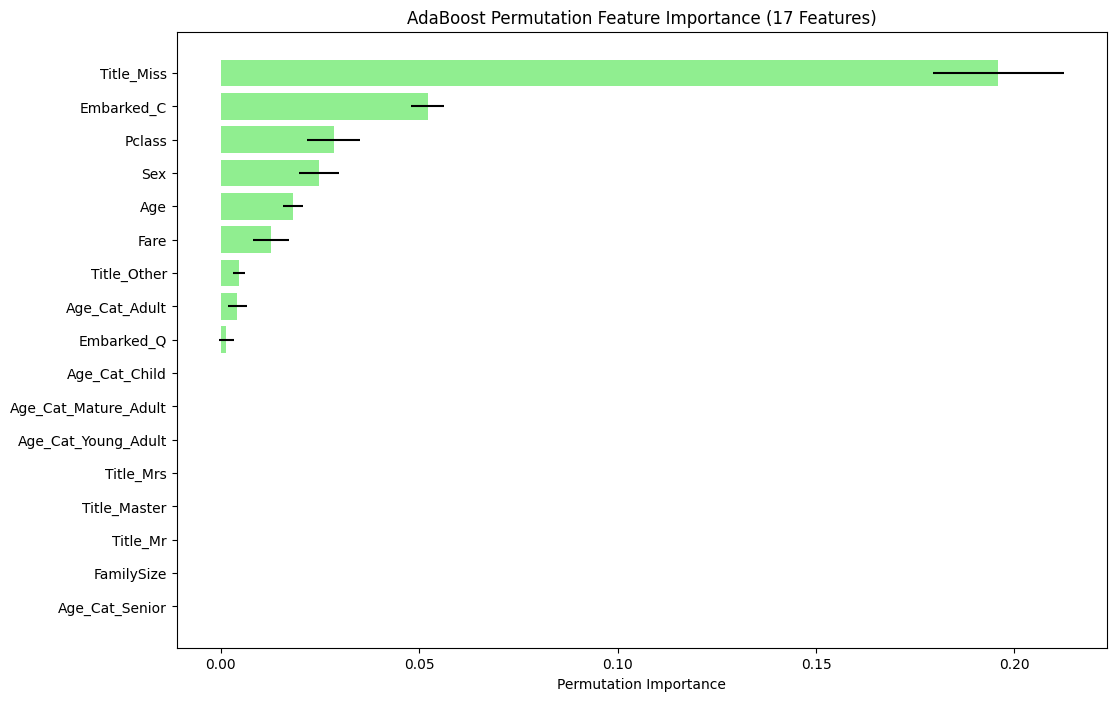

In [123]:
# Use optimized parameters (adjust these based on your results)
# Example: n_estimators=100, learning_rate=0.5, max_depth=1
# Replace with your actual optimized parameters
optimized_params = {
    'n_estimators': 100,  # Replace with your optimized value
    'learning_rate': 1.0,  # Replace with your optimized value
    'estimator__max_depth': 1  # Replace with your optimized value
}

# Initialize AdaBoost with the optimized parameters
best_ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=optimized_params['estimator__max_depth']),
    n_estimators=optimized_params['n_estimators'],
    learning_rate=optimized_params['learning_rate'],
    random_state=42
)

# Define sample weights
sample_weights = np.array([1.0 if y == 0 else 1.6 for y in y_train])

# Fit the model on the full training data
best_ada.fit(X_train_reduced, y_train, sample_weight=sample_weights)

# Use cross_val_predict to get cross-validated predictions
y_pred_cv_ada = cross_val_predict(best_ada, X_train_reduced, y_train, cv=5, method='predict', n_jobs=-1)

# Evaluate performance using cross-validated predictions
accuracy_ada = accuracy_score(y_train, y_pred_cv_ada)
cv_roc_auc = cross_val_score(best_ada, X_train_reduced, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validated Training Accuracy (17 features, AdaBoost): {accuracy_ada:.3f}")
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")


# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_pred_cv_ada)
print("\nConfusion Matrix (AdaBoost Classifier with Class Weights and Scaling):")
print(conf_matrix)
print("\nCross-Validated Training Classification Report (17 features, AdaBoost):")
print(classification_report(y_train, y_pred_cv_ada, target_names=['Not Survived', 'Survived']))

# Compute permutation importance for all 17 features
perm_importance_ada = permutation_importance(best_ada, X_train_reduced, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame with permutation importance results
perm_importance_df_ada = pd.DataFrame({
    'Feature': reduced_features,
    'Importance': perm_importance_ada.importances_mean,
    'Std': perm_importance_ada.importances_std
}).sort_values(by='Importance', ascending=False)

print("\nAdaBoost Permutation Feature Importance (17 features):")
print(perm_importance_df_ada)

# Plot permutation feature importance for all 17 features
plt.figure(figsize=(12, 8))
plt.barh(perm_importance_df_ada['Feature'], perm_importance_df_ada['Importance'], xerr=perm_importance_df_ada['Std'], color='lightgreen')
plt.xlabel('Permutation Importance')
plt.title('AdaBoost Permutation Feature Importance (17 Features)')
plt.gca().invert_yaxis()
plt.show()

G2. Create a AdaBoost model from 9 features from Permutation Importance. Generate confusion matrix, classification report, and optimize all potentially relevant hyperparameters.

In [124]:
# Use optimized parameters (replace with your actual optimized values)
optimized_params = {
    'n_estimators': 100,  # Replace with your optimized value
    'learning_rate': 1.0,  # Replace with your optimized value
    'estimator__max_depth': 1  # Replace with your optimized value
}

# Initialize AdaBoost with the optimized parameters
best_ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=optimized_params['estimator__max_depth']),
    n_estimators=optimized_params['n_estimators'],
    learning_rate=optimized_params['learning_rate'],
    random_state=42
)

# Define sample weights
sample_weights = np.array([1.0 if y == 0 else 1.6 for y in y_train])

# Select top 9 features based on AdaBoost permutation importance
top_features_ada = ['Title_Miss', 'Embarked_C', 'Pclass', 'Sex', 'Age', 'Fare', 'Title_Other', 'Age_Cat_Adult', 'Embarked_Q']
# Optionally add 'Age_Cat_Child' to make it 9 features if its importance > 0.01
# top_features_ada = ['Title_Miss', 'Embarked_C', 'Pclass', 'Sex', 'Age', 'Fare', 'Title_Other', 'Age_Cat_Adult', 'Age_Cat_Child']

# Extract indices of top features
top_feature_indices = [reduced_features.index(f) for f in top_features_ada]
X_train_top_ada = X_train_reduced.iloc[:, top_feature_indices].to_numpy()
# X_test_top_ada = X_test_reduced.iloc[:, top_feature_indices].to_numpy()

print(f"\nX_train_top_ada shape: {X_train_top_ada.shape}")  # Expected: (891, 9)
# print(f"X_test_top_ada shape: {X_test_top_ada.shape}")    # Expected: (418, 9)

# Fit the model on the top 9 features
best_ada.fit(X_train_top_ada, y_train, sample_weight=sample_weights)

# Use cross_val_predict to get cross-validated predictions
y_pred_cv_ada_top = cross_val_predict(best_ada, X_train_top_ada, y_train, cv=5, method='predict', n_jobs=-1)

# Evaluate performance using cross-validated predictions
accuracy_ada_top = accuracy_score(y_train, y_pred_cv_ada_top)
print(f"Cross-Validated Training Accuracy (9 features, AdaBoost): {accuracy_ada_top:.3f}")

# Cross-validation scores
cv_scores_ada = cross_val_score(best_ada, X_train_top_ada, y_train, cv=5, scoring='accuracy')
cv_roc_auc = cross_val_score(best_ada, X_train_top_ada, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Accuracy Scores:", cv_scores_ada)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(cv_scores_ada.mean(), cv_scores_ada.std() * 2))
print(f"ROC-AUC: {cv_roc_auc.mean():.3f} (+/- {cv_roc_auc.std() * 2:.3f})")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_pred_cv_ada_top)
print("\nConfusion Matrix (AdaBoost Classifier with Class Weights and Scaling):")
print(conf_matrix)
print("\nCross-Validated Training Classification Report (9 features, AdaBoost):")
print(classification_report(y_train, y_pred_cv_ada_top, target_names=['Not Survived', 'Survived']))


X_train_top_ada shape: (891, 9)
Cross-Validated Training Accuracy (9 features, AdaBoost): 0.820

Cross-Validation Accuracy Scores: [0.82122905 0.82022472 0.82022472 0.80898876 0.83146067]
Mean CV Accuracy: 0.820 (+/- 0.014)
ROC-AUC: 0.865 (+/- 0.042)

Confusion Matrix (AdaBoost Classifier with Class Weights and Scaling):
[[473  76]
 [ 84 258]]

Cross-Validated Training Classification Report (9 features, AdaBoost):
              precision    recall  f1-score   support

Not Survived       0.85      0.86      0.86       549
    Survived       0.77      0.75      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



In [125]:
# Convert inputs to numpy arrays
X_train_np = X_train_reduced.to_numpy() if hasattr(X_train_reduced, 'to_numpy') else X_train_reduced
y_train_np = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train
sample_weights = np.array([1.0 if y == 0 else 1.6 for y in y_train_np])

# Verify shapes
print("X_train_np shape:", X_train_np.shape)
print("y_train_np shape:", y_train_np.shape)
print("sample_weights shape:", sample_weights.shape)
assert len(sample_weights) == len(y_train_np), "Sample weights length does not match y_train length"

# Define the base estimator
estimator = DecisionTreeClassifier()

# Initialize AdaBoost
ada_model = AdaBoostClassifier(estimator=estimator, random_state=42)

# Define the refined parameter grid.
param_grid = {
    'estimator__max_depth': [1], 
    'n_estimators': [150],  
    'learning_rate': [1.0] 
} 

# Custom scoring for recall
scorer = make_scorer(recall_score, average='binary', pos_label=1)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=ada_model,
    param_grid=param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    verbose=1
)

# Fit with sample weights
grid_search.fit(X_train_np, y_train_np, sample_weight=sample_weights)

# Print best parameters and recall
print("\nOptimized AdaBoost - Best Parameters:", grid_search.best_params_)
print(f"Optimized AdaBoost - Best Mean CV Recall (Class 1): {grid_search.best_score_:.3f}")

# Manual cross-validation for accuracy
best_ada = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
recall_scores = []
y_pred_all = np.zeros(len(y_train_np))

for train_idx, val_idx in kf.split(X_train_np):
    X_train_fold = X_train_np[train_idx]
    y_train_fold = y_train_np[train_idx]
    X_val_fold = X_train_np[val_idx]
    y_val_fold = y_train_np[val_idx]
    sample_weights_fold = sample_weights[train_idx]
   
    best_ada.fit(X_train_fold, y_train_fold, sample_weight=sample_weights_fold)
    y_pred_fold = best_ada.predict(X_val_fold)
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
    recall_scores.append(recall_score(y_val_fold, y_pred_fold, pos_label=1))
    y_pred_all[val_idx] = y_pred_fold

accuracy_mean = np.mean(accuracy_scores)
accuracy_std = np.std(accuracy_scores) * 2
recall_mean = np.mean(recall_scores)
recall_std = np.std(recall_scores) * 2

print(f"Optimized AdaBoost - Mean CV Accuracy with Best Model: {accuracy_mean:.3f} (+/- {accuracy_std:.3f})")
print(f"Optimized AdaBoost - Mean CV Recall (Class 1): {recall_mean:.3f} (+/- {recall_std:.3f})")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_train, y_pred_all)
print("\nConfusion Matrix (Ada Boosting Classifier with Class Weights and Scaling):")
print(conf_matrix)
print("\nOptimized AdaBoost - Classification Report:")
print(classification_report(y_train_np, y_pred_all))

X_train_np shape: (891, 17)
y_train_np shape: (891,)
sample_weights shape: (891,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Optimized AdaBoost - Best Parameters: {'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 150}
Optimized AdaBoost - Best Mean CV Recall (Class 1): 0.807
Optimized AdaBoost - Mean CV Accuracy with Best Model: 0.807 (+/- 0.034)
Optimized AdaBoost - Mean CV Recall (Class 1): 0.795 (+/- 0.105)

Confusion Matrix (Ada Boosting Classifier with Class Weights and Scaling):
[[447 102]
 [ 70 272]]

Optimized AdaBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       549
           1       0.73      0.80      0.76       342

    accuracy                           0.81       891
   macro avg       0.80      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891



AdaBoost hyperparameters optimized.

H. Create a Tensorflow/Keras machine learning model with all 19 features.  Generate confusion matrix, classification report, and try to optimize relevant parameters.

In [126]:
# Step 1: Verify TensorFlow and Keras integration
print(f"TensorFlow version: {tf.__version__}")
print("Keras version (via tf.keras):", tf.keras.__version__)

# Step 2: Verify shapes
print(f"X_train_clean shape: {X_train_clean.shape}")
print(f"y_train shape: {y_train.shape}")

if X_train_clean.shape[0] != y_train.shape[0]:
    raise ValueError(f"Shape mismatch: X_train_clean has {X_train_clean.shape[0]} samples, but y_train has {y_train.shape[0]} samples")

# Step 3: Ensure X_train_clean is a DataFrame
if not isinstance(X_train_clean, pd.DataFrame):
    X_train_clean = pd.DataFrame(X_train_clean, columns=[f'Feature_{i}' for i in range(X_train_clean.shape[1])])

# Step 4: Check for non-numeric data and NaNs
non_numeric_cols = X_train_clean.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    raise ValueError(f"Non-numeric columns found in X_train_clean: {non_numeric_cols}")

if X_train_clean.isna().sum().sum() > 0:
    print("NaNs found in X_train_clean. Imputing with mean...")
    X_train_clean = X_train_clean.fillna(X_train_clean.mean())

# Verify the number of features
print(f"Number of features in X_train_clean: {X_train_clean.shape[1]}")  # Should be 19

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_clean.columns)

# Convert y_train to numpy array
y_train = np.array(y_train)

# Step 6: Compute class weights
class_weights = {0: 1.0, 1: 1.6}  # Same as previous models

# Step 7: Define function to create Keras model with final tweaks
def create_keras_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(30, activation='relu', input_dim=input_dim),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0006)  # Reduced further
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 8: Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
y_pred_all = np.zeros_like(y_train)
cv_scores = []
cv_roc_scores = []

for train_idx, val_idx in kf.split(X_train_scaled):
    print(f"\nTraining fold {fold}...")
    X_train_fold = X_train_scaled.iloc[train_idx]
    y_train_fold = y_train[train_idx]
    X_val_fold = X_train_scaled.iloc[val_idx]
    y_val_fold = y_train[val_idx]

    # Create and train the model
    model = create_keras_model(input_dim=X_train_scaled.shape[1])
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(
        X_train_fold, y_train_fold,
        epochs=90,  # Increased to allow more training
        batch_size=30,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping],
        class_weight=class_weights,
        verbose=0
    )

    # Predict probabilities and convert to classes
    y_pred_prob = model.predict(X_val_fold, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    y_pred_all[val_idx] = y_pred

    # Compute fold accuracy
    fold_accuracy = np.mean(y_pred == y_val_fold)
    cv_scores.append(fold_accuracy)

    # Compute fold ROC-AUC
    fold_roc_auc = tf.keras.metrics.AUC()(y_val_fold, y_pred_prob).numpy()
    cv_roc_scores.append(fold_roc_auc)

    fold += 1

# Step 9: Evaluate overall performance
conf_matrix = confusion_matrix(y_train, y_pred_all)
print("\nConfusion Matrix (Keras MLP with Final Parameters):")
print(conf_matrix)
print("\nClassification Report (Keras MLP):")
print(classification_report(y_train, y_pred_all))

# Cross-validation scores
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.3f} (+/- {:.3f})".format(np.mean(cv_scores), np.std(cv_scores) * 2))
print(f"ROC-AUC: {np.mean(cv_roc_scores):.3f} (+/- {np.std(cv_roc_scores) * 2:.3f})")

# Step 10: Train final model on full training set for submission
final_model = create_keras_model(input_dim=X_train_scaled.shape[1])
final_model.fit(
    X_train_scaled, y_train,
    epochs=90,
    batch_size=30,
    class_weight=class_weights,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)],
    verbose=0
)

TensorFlow version: 2.19.0
Keras version (via tf.keras): 3.10.0
X_train_clean shape: (891, 19)
y_train shape: (891,)
Number of features in X_train_clean: 19

Training fold 1...


c:\Users\rcc_0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training fold 2...


c:\Users\rcc_0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training fold 3...


c:\Users\rcc_0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training fold 4...


c:\Users\rcc_0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training fold 5...


c:\Users\rcc_0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Confusion Matrix (Keras MLP with Final Parameters):
[[471  78]
 [ 79 263]]

Classification Report (Keras MLP):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       549
           1       0.77      0.77      0.77       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891


Cross-Validation Accuracy Scores: [0.8044692737430168, 0.8033707865168539, 0.8595505617977528, 0.8089887640449438, 0.8426966292134831]
Mean CV Accuracy: 0.824 (+/- 0.046)
ROC-AUC: 0.874 (+/- 0.059)


c:\Users\rcc_0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


I. Use Boruta Feature reduction technique to see what features it deems important out of curiosity.

In [127]:
# Convert X_train to a NumPy array if it's a DataFrame
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
    X_train_np = X_train.to_numpy()
else:
    X_train_np = np.array(X_train)
    feature_names = [f'feature_{i}' for i in range(X_train_np.shape[1])]

# Convert y_train to a NumPy array
y_train_np = y_train.to_numpy() if isinstance(y_train, (pd.Series, pd.DataFrame)) else np.array(y_train)

# Verify shapes after conversion
print(f"X_train_np shape: {X_train_np.shape}")
print(f"y_train_np shape: {y_train_np.shape}")

# Convert to DataFrame for Boruta compatibility
X_train_df = pd.DataFrame(X_train_np, columns=feature_names)

# Define the Random Forest base estimator for Boruta
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Initialize Boruta
boruta = BorutaPy(
    estimator=rf,
    n_estimators='auto',
    max_iter=100,
    perc=100,
    random_state=42
)

# Fit Boruta
boruta.fit(X_train_np, y_train_np)

# Get selected features
selected_features = X_train_df.columns[boruta.support_].tolist()
print(f"\nSelected features: {selected_features}")

# Get importance rankings (1 = confirmed, 2 = tentative, higher = rejected)
feature_ranking = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': boruta.ranking_
})
print("\nFeature Importance Rankings:")
print(feature_ranking.sort_values(by='Ranking'))

# Reduce X_train_np to selected features
X_train_boruta = X_train_np[:, boruta.support_]
print(f"Reduced X_train_reduced shape: {X_train_boruta.shape}")

# Apply the same reduction to X_test (assuming X_test has the same features)
if 'X_test' in globals():
    X_test_np = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else np.array(X_test)
    X_test_boruta = X_test_np[:, boruta.support_]
    print(f"Reduced X_test_reduced shape: {X_test_boruta.shape}")
else:
    print("Please provide X_test to reduce it accordingly.")

# Save the reduced datasets
np.save('X_train_reduced.npy', X_train_boruta)
if 'X_test_reduced' in locals():
    np.save('X_test_reduced.npy', X_test_boruta)
    print("\nReduced datasets saved as 'X_train_reduced.npy' and 'X_test_reduced.npy'.")
else:
    print("\nReduced training dataset saved as 'X_train_reduced.npy'. Provide X_test to save the reduced test set.")

X_train_np shape: (891, 19)
y_train_np shape: (891,)

Selected features: ['Sex', 'Fare', 'Title_Mr']

Feature Importance Rankings:
                 Feature  Ranking
1                    Sex        1
3                   Fare        1
10              Title_Mr        1
2                    Age        2
0                 Pclass        3
4             FamilySize        4
11             Title_Mrs        5
9             Title_Miss        6
5             Embarked_C        7
13         Age_Cat_Adult        8
7             Embarked_S        8
18   Age_Cat_Young Adult       10
16  Age_Cat_Mature Adult       11
6             Embarked_Q       12
14         Age_Cat_Child       12
8           Title_Master       14
12           Title_Other       15
15        Age_Cat_Infant       16
17        Age_Cat_Senior       17
Reduced X_train_reduced shape: (891, 3)
Reduced X_test_reduced shape: (418, 3)

Reduced training dataset saved as 'X_train_reduced.npy'. Provide X_test to save the reduced test set.


Interesting that Boruta found Sex, Fare, and Title_Mr as variables to keep, and Age as an alternate.

J. Generate and export model results into a table.

In [128]:
# Placeholder metrics (replace with your actual values)
models = [
    ('Logistic Regression (19 features)', 459, 90, 76, 266, 0.814, 0.75, 0.78, 0.81, 0.868),
    ('LR with Lasso (17 features -> 10 used)', 464, 85, 73, 269, 0.823, 0.76, 0.79, 0.82, 0.871), # Features Removed Due To Multicollinearity: Age_Cat_Infant and Embarked_S
    ('LR with Ridge (17 features)', 464, 85, 73, 269, 0.818, 0.76, 0.79, 0.82, 0.868),
    ('LR with ElasticNet (17 features -> 12 used)', 461, 88, 73, 269, 0.819, 0.75, 0.79, 0.82, 0.869),
    ('Random Forest (19 features)', 482, 67, 77, 265, 0.838, 0.80, 0.77, 0.84, 0.866),
    ('Random Forest (14 features - Title Features Removed)', 472, 77, 77, 265, 0.819, 0.77, 0.77, 0.83, 0.864), 
    ('Random Forest (8 features - Age_Cat Features Removed)', 478, 71, 84, 258, 0.818, 0.78, 0.75, 0.83, 0.872),
    ('Random Forest (5 features - Embarkment Features Removed)', 479, 70, 81, 261, 0.826, 0.79, 0.76, 0.83, 0.870),
    ('Random Forest (5 features - By RF Feature Importance)', 484, 65, 76, 266, 0.841, 0.8, 0.78, 0.84, 0.868),
    ('Linear SVM (10 features - Lasso Reduced)', 470, 79, 87, 255, 0.814, 0.76, 0.75, 0.81, 0.859),
    ('RBF SVM (10 features - Lasso Reduced)', 470, 79, 87, 255, 0.823, 0.77, 0.77, 0.82, 0.854),
    ('RBF SVM (17 features - By SHAP Feature Importance)', 481, 68, 86, 256, 0.827, 0.79, 0.75, 0.83, 0.854),
    ('XGBoost (15 features - By XGB Feature Importance)', 479, 69, 70, 273, 0.844, 0.80, 0.80, 0.84, 0.866),
    ('Gradient Boosting (17 features  - By GB Feature Importance)', 491, 58, 85, 257, 0.84, 0.82, 0.75, 0.84, 0.879),
    ('AdaBoost (17 features)', 472, 77, 86, 256, 0.817, 0.77, 0.75, 0.82, 0.864),
    ('AdaBoost (9 features - By Permutation Feature Importance)', 473, 76, 84, 258, 0.820, 0.77, 0.75, 0.82, 0.865),
    ('Keras (19 features)', 466, 83, 76, 266, 0.822, 0.76, 0.78, 0.82, 0.87)
]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(models, columns=['Model', 'TP', 'FN', 'FP', 'TN', 'Accuracy', 'Class 1 Precision', 'Class 1 Recall', 'Macro F1-Score', 'ROC-AUC'])

# Display the table
print("\nModel Performance Comparison:")
print(comparison_df)

# Optionally, save to CSV for reporting
# comparison_df.to_csv('model_comparison.csv', index=False)
# print("\nComparison table saved as 'model_comparison.csv'.")


Model Performance Comparison:
                                                Model   TP  FN  FP   TN  \
0                   Logistic Regression (19 features)  459  90  76  266   
1              LR with Lasso (17 features -> 10 used)  464  85  73  269   
2                         LR with Ridge (17 features)  464  85  73  269   
3         LR with ElasticNet (17 features -> 12 used)  461  88  73  269   
4                         Random Forest (19 features)  482  67  77  265   
5   Random Forest (14 features - Title Features Re...  472  77  77  265   
6   Random Forest (8 features - Age_Cat Features R...  478  71  84  258   
7   Random Forest (5 features - Embarkment Feature...  479  70  81  261   
8   Random Forest (5 features - By RF Feature Impo...  484  65  76  266   
9            Linear SVM (10 features - Lasso Reduced)  470  79  87  255   
10              RBF SVM (10 features - Lasso Reduced)  470  79  87  255   
11  RBF SVM (17 features - By SHAP Feature Importa...  481  68  86  2

Considered generating a ROC-AUC chart, but there did not seem to much difference in the model ROC-AUC values (0.85 to 0.879).  In additon, my final decision on a model did not rely on that statistic, but on Accuracy (0.844), Macro Average F1-Score (0.84), and general Confusion Matrix performance (752 Predicted and 139 Missed). XGBoost (15 features - by XGBoost Feature Importance) stood out from the rest.  Found the project rewarding in the sense of delving more deeply into imputation strategy and model use and testing. Not sure that anyone has approached this problem the way that I did regarding imputation, and the review of multiple classification models with the training dataset.

V. Use the XGBoost model and its top 15 features to generate predictions for the test dataset and save them as a .csv file.

In [132]:
# Define the top 15 features for alignment
xgboost_top_15 = [
    'Sex', 'Title_Miss', 'Title_Mr', 'Title_Other', 'Pclass',
    'Embarked_C', 'Fare', 'Age_Cat_Mature Adult', 'Age_Cat_Child',
    'Age', 'Age_Cat_Adult', 'Embarked_Q', 'FamilySize',
    'Age_Cat_Senior', 'Age_Cat_Young Adult'
]

# Step 1: Validate inputs
if 'titanic_imputed' not in globals() or not isinstance(titanic_imputed, pd.DataFrame):
    raise NameError("titanic_imputed DataFrame is missing or invalid.")
if 'PassengerId' not in titanic_imputed.columns:
    raise ValueError("PassengerId column not found in titanic_imputed.")

# Ensure X_test is a DataFrame
if not isinstance(X_test, pd.DataFrame):
    X_test_columns = [f'Feature_{i}' for i in range(X_test.shape[1])]
    X_test = pd.DataFrame(X_test, columns=X_test_columns)

# Ensure X_train_xgb_reduced is a DataFrame with correct columns
if not isinstance(X_train_xgb_reduced, pd.DataFrame):
    if X_train_xgb_reduced.shape[1] != len(xgboost_top_15):
        raise ValueError(f"Feature count mismatch: X_train_xgb_reduced has {X_train_xgb_reduced.shape[1]} features, expected {len(xgboost_top_15)}.")
    X_train_xgb_reduced = pd.DataFrame(X_train_xgb_reduced, columns=xgboost_top_15)

print(f"X_train_xgb_reduced shape: {X_train_xgb_reduced.shape}")
print(f"X_test shape: {X_test.shape}")

# Step 2: Retrieve PassengerId
# Assume X_test indices align with the test portion of titanic_imputed
train_size = X_train_xgb_reduced.shape[0]
test_size = X_test.shape[0]
if titanic_imputed.shape[0] != (train_size + test_size):
    raise ValueError(f"Size mismatch: titanic_imputed has {titanic_imputed.shape[0]} rows, expected {train_size + test_size}.")
passenger_ids = titanic_imputed['PassengerId'].iloc[-test_size:].reset_index(drop=True)
if len(passenger_ids) != test_size:
    raise ValueError(f"PassengerId length ({len(passenger_ids)}) does not match X_test length ({test_size}).")

# Step 3: Preprocess X_test
# Convert Boolean columns to integers
boolean_columns = X_test.select_dtypes(include=['bool']).columns
X_test[boolean_columns] = X_test[boolean_columns].astype(int)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = [col for col in ['Age', 'Fare', 'SibSp', 'Parch'] if col in X_test.columns]
if not numerical_cols:
    raise ValueError(f"No numerical columns found in X_test. Available columns: {list(X_test.columns)}.")
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

# Align X_test with xgboost_top_15
columns_to_keep = [col for col in X_test.columns if col in xgboost_top_15]
X_test_clean = X_test[columns_to_keep]
missing_features = [f for f in xgboost_top_15 if f not in X_test_clean.columns]
if missing_features:
    raise ValueError(f"Missing features in X_test_clean: {missing_features}.")
X_test_clean = X_test_clean[xgboost_top_15]
print(f"X_test_clean shape: {X_test_clean.shape}")
print(f"X_test_clean columns: {list(X_test_clean.columns)}")

# Step 4: Train or use xgb_model and generate predictions
print(f"XGBoost version: {xgb.__version__}")
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=1.6,
    random_state=42,
    eval_metric='logloss',
    max_depth=4,
    learning_rate=0.2,
    n_estimators=50,
    min_child_weight=3,
    reg_alpha=0.01,
    reg_lambda=0,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

# Ensure y_train is available
if 'y_train' not in globals():
    print("y_train not found. Recreating from titanic_imputed...")
    if 'Survived' not in titanic_imputed.columns:
        raise ValueError("Survived column not found in titanic_imputed to recreate y_train.")
    y_train = titanic_imputed['Survived'].iloc[:train_size]
    if len(y_train) != train_size:
        raise ValueError(f"y_train length ({len(y_train)}) does not match X_train_xgb_reduced rows ({train_size}).")

# Train the model
xgb_model.fit(X_train_xgb_reduced, y_train)
print("xgb_model trained successfully!")

# Generate predictions
y_test = xgb_model.predict(X_test_clean)
print(f"y_test shape: {y_test.shape}")
print(f"First few predictions: {y_test[:5]}")

# Step 5: Create and export submission
submission = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': y_test})
print(f"Submission shape: {submission.shape}")
print(submission.head())
submission.to_csv('submission_xgboost_15_features_importance.csv', index=False)
print("Submission file 'submission_xgboost_15_features_importance.csv' created successfully!")

X_train_xgb_reduced shape: (891, 15)
X_test shape: (418, 19)
X_test_clean shape: (418, 15)
X_test_clean columns: ['Sex', 'Title_Miss', 'Title_Mr', 'Title_Other', 'Pclass', 'Embarked_C', 'Fare', 'Age_Cat_Mature Adult', 'Age_Cat_Child', 'Age', 'Age_Cat_Adult', 'Embarked_Q', 'FamilySize', 'Age_Cat_Senior', 'Age_Cat_Young Adult']
XGBoost version: 3.0.2
xgb_model trained successfully!
y_test shape: (418,)
First few predictions: [0 0 1 1 1]
Submission shape: (418, 2)
   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         1
Submission file 'submission_xgboost_15_features_importance.csv' created successfully!
